<a href="https://colab.research.google.com/github/abarrie2/cs598-dlh-project/blob/main/DL4H_Team_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LICENSING NOTICE

Note that all users who use Vital DB, an open biosignal dataset, must agree to the Data Use Agreement below. If you do not agree, please close this window. The Data Use Agreement is available here:
https://vitaldb.net/dataset/#h.vcpgs1yemdb5

# This is the development version of the project code

For the Project Draft submission see the DL4H_Team_24_Project_Draft.ipynb notebook in the project repository.

## Project repository

The project repository can be found at: https://github.com/abarrie2/cs598-dlh-project

# Introduction

This project aims to reproduce findings from the paper titled "Predicting intraoperative hypotension using deep learning with waveforms of arterial blood pressure, electroencephalogram, and electrocardiogram: Retrospective study" by Jo Y-Y et al. (2022) [1]. This study introduces a deep learning model that predicts intraoperative hypotension (IOH) events before they occur, utilizing a combination of arterial blood pressure (ABP), electroencephalogram (EEG), and electrocardiogram (ECG) signals.


## Background of the Problem

Intraoperative hypotension (IOH) is a common and significant surgical complication defined by a mean arterial pressure drop below 65 mmHg. It is associated with increased risks of myocardial infarction, acute kidney injury, and heightened postoperative mortality. Effective prediction and timely intervention can substantially enhance patient outcomes.

### Evolution of IOH Prediction

Initial attempts to predict IOH primarily used arterial blood pressure (ABP) waveforms. A foundational study by Hatib F et al. (2018) titled "Machine-learning Algorithm to Predict Hypotension Based on High-fidelity Arterial Pressure Waveform Analysis" [2] showed that machine learning could forecast IOH events using ABP with reasonable accuracy. This finding spurred further research into utilizing various physiological signals for IOH prediction.

Subsequent advancements included the development of the Acumen™ hypotension prediction index, which was studied in "AcumenTM hypotension prediction index guidance for prevention and treatment of hypotension in noncardiac surgery: a prospective, single-arm, multicenter trial" by Bao X et al. (2024) [3]. This trial integrated a hypotension prediction index into blood pressure monitoring equipment, demonstrating its effectiveness in reducing the number and duration of IOH events during surgeries. Further study is needed to determine whether this resultant reduction in IOH events transalates into improved postoperative patient outcomes.


### Current Study

Building on these advancements, the paper by Jo Y-Y et al. (2022) proposes a deep learning approach that enhances prediction accuracy by incorporating EEG and ECG signals along with ABP. This multi-modal method, evaluated over prediction windows of 3, 5, 10, and 15 minutes, aims to provide a comprehensive physiological profile that could predict IOH more accurately and earlier. Their results indicate that the combination of ABP and EEG significantly improves performance metrics such as AUROC and AUPRC, outperforming models that use fewer signals or different combinations.

Our project seeks to reproduce and verify Jo Y-Y et al.'s results to assess whether this integrated approach can indeed improve IOH prediction accuracy, thereby potentially enhancing surgical safety and patient outcomes.

# Scope of Reproducibility:

The original paper investigated the following hypotheses:

1.   Hypothesis 1: A model using ABP and ECG will outperform a model using ABP alone in predicting IOH.
2.   Hypothesis 2: A model using ABP and EEG will outperform a model using ABP alone in predicting IOH.
3.   Hypothesis 3: A model using ABP, EEG, and ECG will outperform a model using ABP alone in predicting IOH.

Results were compared using AUROC and AUPRC scores. Based on the results described in the original paper, we expect that Hypothesis 2 will be confirmed, and that Hypotheses 1 and 3 will not be confirmed.

In order to perform the corresponding experiments, we will implement a CNN-based model that can be configured to train and infer using the following four model variations:

1.   ABP data alone
2.   ABP and ECG data
3.   ABP and EEG data
4.   ABP, ECG, and EEG data

We will measure the performance of these configurations using the same AUROC and AUPRC metrics as used in the original paper. To test hypothesis 1 we will compare the AUROC and AUPRC measures between model variation 1 and model variation 2. To test hypothesis 2 we will compare the AUROC and AUPRC measures between model variation 1 and model variation 3. To test hypothesis 3 we will compare the AUROC and AUPRC measures between model variation 1 and model variation 4. For all of the above measures and experiment combinations, we will operate multiple experiments where the time-to-IOH event prediction will use the following prediction windows:

1. 3 minutes before event
2. 5 minutes before event
3. 10 minutes before event
4. 15 minutes before event

In the event that we are compute-bound, we will prioritize the 3-minute prediction window experiments as they are the most relevant to the original paper's findings.

The predictive power of ABP, ECG and ABP + ECG models at 3-, 5-, 10- and 15-minute prediction windows:
![Predictive power of ABP, ECG and ABP + ECG models at 3-, 5-, 10- and 15-minute prediction windows](https://journals.plos.org/plosone/article/figure/image?download&size=large&id=10.1371/journal.pone.0272055.g004)

### Modifications made for demo mode

In order to demonstrate the functioning of the code in a short (ie, <8 minute limit) the following options and modifications were used:

1. `MAX_CASES` was set to 20. The total number of cases to be used in the full training set is 3296, but the smaller numbers allows demonstration of each section of the pipeline.
2. `vitaldb_cache` is prepopulated in Google Colab. The cache file is approx. 800MB and contains the raw and mini-fied copies of the source dataset and is downloaded from Google Drive. This is much faster than using the `vitaldb` API, but is again only a fraction of the data. The full dataset can be downloaded with the API or prepopulated by following the instructions in the "Bulk Data Download" section below.
3. `max_epochs` is set to 6. With the small dataset, training is fast and shows the decreasing training and validation losses. In the full model run, `max_epochs` will be set to 100. In both cases early stopping is enabled and will stop training if the validation losses stop decreasing for five consecutive epochs.
4. Only the "ABP + EEG" combination will be run. In the final report, additional combinations will be run, as discussed later.
5. Only the 3-minute prediction window will be run. In the final report, additional prediction windows (5, 10 and 15 minutes) will be run, as discussed later.
6. No ablations are run in the demo. These will be completed for the final report.

# Methodology

### Methodology from Final Rubrik
 * Environment
   * Python version
   * Dependencies/packages needed
 * Data
   * Data download instruction
   * Data descriptions with helpful charts and visualizations
   * Preprocessing code + command
 * Model
   * Citation to the original paper
   * Link to the original paper’s repo (if applicable)
   * Model descriptions
   * Implementation code
   * Pretrained model (if applicable)
 * Training
   * Hyperparams
     * Report at least 3 types of hyperparameters such as learning rate, batch size, hidden size, dropout
   * Computational requirements
     * Report at least 3 types of requirements such as type of hardware, average runtime for each epoch, total number of trials, GPU hrs used, # training epochs
     * Training code
 * Evaluation
   * Metrics descriptions
   * Evaluation code



The methodology section is composed of the following subsections: Environment, Data and Model.

- **Environment**: This section describes the setup of the environment, including the installation of necessary libraries and the configuration of the runtime environment.
- **Data**: This section describes the dataset used in the study, including its collection and preprocessing.
    - **Data Collection**: This section describes the process of downloading the dataset from VitalDB and populating the local data cache.
    - **Data Preprocessing**: This section describes the preprocessing steps applied to the dataset, including data selection, data cleaning, and feature extraction.
- **Model**: This section describes the deep learning model used in the study, including its implementation, training, and evaluation.
    - **Model Implementation**: This section describes the implementation of the deep learning model, including the architecture, loss function, and optimization algorithm.
    - **Model Training**: This section describes the training process, including the training loop, hyperparameters, and training strategy.
    - **Model Evaluation**: This section describes the evaluation process, including the metrics used, the evaluation strategy, and the results obtained.

## Environment

### Create environment

The environment setup differs based on whether you are running the code on a local machine or on Google Colab. The following sections provide instructions for setting up the environment in each case.

#### Local machine

Create `conda` environment for the project using the `environment.yml` file:

```bash
conda env create --prefix .envs/dlh-team24 -f environment.yml
```

Activate the environment with:
```bash
conda activate .envs/dlh-team24
```

#### Google Colab

The following code snippet installs the required packages and downloads the necessary files in a Google Colab environment:

In [ ]:
# Google Colab environments have a `/content` directory. Use this as a proxy for running Colab-only code
COLAB_ENV = "google.colab" in str(get_ipython())
if COLAB_ENV:
    #install vitaldb
    %pip install vitaldb

    # Executing in Colab therefore download cached preprocessed data.
    # TODO: Integrate this with the setup local cache data section below.
    # Check for file existence before overwriting.
    import gdown
    gdown.download(id="15b5Nfhgj3McSO2GmkVUKkhSSxQXX14hJ", output="vitaldb_cache.tgz")
    !tar -zxf vitaldb_cache.tgz

    # Download sqi_filter.csv from github repo
    !wget https://raw.githubusercontent.com/abarrie2/cs598-dlh-project/main/sqi_filter.csv

All other required packages are already installed in the Google Colab environment.

### Load environment

In [ ]:
# Import packages
import os
import random
import copy

from timeit import default_timer as timer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import torch
from torch.utils.data import Dataset
import vitaldb

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from datetime import datetime

Set random seeds to generate consistent results:

In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
#torch.use_deterministic_algorithms(False)
os.environ['PYTHONASHSEED'] = str(RANDOM_SEED)

##  Data

### Data Description

#### Source

Data for this project is sourced from the open biosignal VitalDB dataset as described in "VitalDB, a high-fidelity multi-parameter vital signs database in surgical patients" by Lee H-C et al. (2022) [4], which contains perioperative vital signs and numerical data from 6,388 cases of non-cardiac (general, thoracic, urological, and gynecological) surgery patients who underwent routine or emergency surgery at Seoul National University Hospital between 2016 and 2017. The dataset includes ABP, ECG, and EEG signals, as well as other physiological data. The dataset is available through an [API](https://vitaldb.net/dataset/?query=api) and [Python library](https://vitaldb.net/dataset/?query=lib), and at PhysioNet: https://physionet.org/content/vitaldb/1.0.0/

#### Statistics

Characteristics of the dataset:
| Characteristic        | Value                       | Details                |
|-----------------------|-----------------------------|------------------------|
| Total number of cases | 6,388                       |                        |
| Sex (male)            | 3,243 (50.8%)               |                        |
| Age (years)           | 59                          | Range: 48-68           |
| Height (cm)           | 162                         | Range: 156-169         |
| Weight (kg)           | 61                          | Range: 53-69           |
| Tram-Rac 4A tracks    | 6,355 (99.5%)               | Sampling rate: 500Hz   |
| BIS Vista tracks      | 5,566 (87.1%)               | Sampling rate: 128Hz   |
| Case duration (min)   | 189                         | Range: 27-1041         |

Labels are only known after processing the data. In the original paper, there were an average of 1.6 IOH events per case and 5.7 non-events per case so we expect approximately 10,221 IOH events and 364,116 non-events in the dataset.

#### Data Processing

Data will be processed as follows:
1. Load the dataset from VitalDB, or from a local cache if previously downloaded.
2. Apply the inclusion and exclusion selection criteria to filter the dataset according to surgery metadata.
3. Generate a minified dataset by discarding all tracks except ABP, ECG, and EEG.
4. Preprocess the data by applying band-pass and z-score normalization to the ECG and EEG signals, and filtering out ABP signals below a Signal Quality Index (SQI) threshold.
5. Generate event and non-event samples by extracting 60-second segments around IOH events and non-events.
6. Split the dataset into training, validation, and test sets with a 6:1:3 ratio, ensuring that samples from a single case are not split across different sets to avoid data leakage.

### Set Up Local Data Caches

VitalDB data is static, so local copies can be stored and reused to avoid expensive downloads and to speed up data processing.

The default directory defined below is in the project `.gitignore` file. If this is modified, the new directory should also be added to the project `.gitignore`.

In [ ]:
VITALDB_CACHE = './vitaldb_cache'
VITAL_ALL = f"{VITALDB_CACHE}/vital_all"
VITAL_MINI = f"{VITALDB_CACHE}/vital_mini"
VITAL_METADATA = f"{VITALDB_CACHE}/metadata"
VITAL_MODELS = f"{VITALDB_CACHE}/models"
VITAL_PREPROCESS_SCRATCH = f"{VITALDB_CACHE}/data_scratch"
VITAL_EXTRACTED_SEGMENTS = f"{VITALDB_CACHE}/segments"

In [ ]:
TRACK_CACHE = None
SEGMENT_CACHE = None

# when USE_DISK_CACHING is enabled, track and segment data will be flushed to disk
USE_DISK_CACHING = False
# when USE_MEMORY_CACHING is enabled, track data will be persisted in an in-memory cache. Not useful once we have already pre-extracted all event segments
USE_MEMORY_CACHING = True

# When RESET_CACHE is set to True, it will ensure the TRACK_CACHE is disposed and recreated when we do dataset initialization.
# Use as a shortcut to wiping cache rather than restarting kernel
RESET_CACHE = False
PREDICTION_WINDOW = 3
ALL_PREDICTION_WINDOWS = [3, 5, 10, 15]

# Maximum number of cases of interest for which to download data.
# Set to a small value (ex: 20) for demo purposes, else set to None to disable and download and process all.
MAX_CASES = None
#MAX_CASES = 20

# Preloading Cases: when true, all matched cases will have the _mini tracks extracted and put into in-mem dict
PRELOADING_CASES = False
PRELOADING_SEGMENTS = True
# Perform Data Preprocessing: do we want to take the raw vital file and extract segments of interest for training?
PERFORM_DATA_PREPROCESSING = True

In [ ]:
if not os.path.exists(VITALDB_CACHE):
  os.mkdir(VITALDB_CACHE)
if not os.path.exists(VITAL_ALL):
  os.mkdir(VITAL_ALL)
if not os.path.exists(VITAL_MINI):
  os.mkdir(VITAL_MINI)
if not os.path.exists(VITAL_METADATA):
  os.mkdir(VITAL_METADATA)
if not os.path.exists(VITAL_MODELS):
  os.mkdir(VITAL_MODELS)
if not os.path.exists(VITAL_PREPROCESS_SCRATCH):
  os.mkdir(VITAL_PREPROCESS_SCRATCH)
if not os.path.exists(VITAL_EXTRACTED_SEGMENTS):
  os.mkdir(VITAL_EXTRACTED_SEGMENTS)

print(os.listdir(VITALDB_CACHE))


### Bulk Data Download

**This step is not required, but will significantly speed up downstream processing and avoid a high volume of API requests to the VitalDB web site.**

The cache population code checks if the `.vital` files are locally available, and can be populated by calling the vitaldb API or by manually prepopulating the cache (recommended)

- Manually downloaded the dataset from the following site: https://physionet.org/content/vitaldb/1.0.0/
    - Download the [zip file](https://physionet.org/static/published-projects/vitaldb/vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0.zip) in a browser, or
    - Use `wget -r -N -c -np https://physionet.org/files/vitaldb/1.0.0/` to download the files in a terminal
- Move the contents of `vital_files` into the `${VITAL_ALL}` directory.

In [ ]:
# Returns the Pandas DataFrame for the specified dataset.
#   One of 'cases', 'labs', or 'trks'
# If the file exists locally, create and return the DataFrame.
# Else, download and cache the csv first, then return the DataFrame.
def vitaldb_dataframe_loader(dataset_name):
    if dataset_name not in ['cases', 'labs', 'trks']:
        raise ValueError(f'Invalid dataset name: {dataset_name}')
    file_path = f'{VITAL_METADATA}/{dataset_name}.csv'
    if os.path.isfile(file_path):
        print(f'{dataset_name}.csv exists locally.')
        df = pd.read_csv(file_path)
        return df
    else:
        print(f'downloading {dataset_name} and storing in the local cache for future reuse.')
        df = pd.read_csv(f'https://api.vitaldb.net/{dataset_name}')
        df.to_csv(file_path, index=False)
        return df

## Exploratory Data Analysis

#### Cases

In [ ]:
cases = vitaldb_dataframe_loader('cases')
cases = cases.set_index('caseid')
cases.shape

In [ ]:
cases.index.nunique()

In [ ]:
cases.head()

In [ ]:
cases['sex'].value_counts()

#### Tracks

In [ ]:
trks = vitaldb_dataframe_loader('trks')
trks = trks.set_index('caseid')
trks.shape

In [ ]:
trks.index.nunique()

In [ ]:
trks.groupby('caseid')[['tid']].count().plot();

In [ ]:
trks.groupby('caseid')[['tid']].count().hist();

In [ ]:
trks.groupby('tname').count().sort_values(by='tid', ascending=False)

## Parameters of Interest

### Hemodynamic Parameters Reference
https://vitaldb.net/dataset/?query=overview#h.f7d712ycdpk2

**SNUADC/ART**

arterial blood pressure waveform

Parameter, Description, Type/Hz, Unit

SNUADC/ART, Arterial pressure wave, W/500, mmHg

In [ ]:
trks[trks['tname'].str.contains('SNUADC/ART')].shape

**SNUADC/ECG_II**

electrocardiogram waveform

Parameter, Description, Type/Hz, Unit

SNUADC/ECG_II, ECG lead II wave, W/500, mV

In [ ]:
trks[trks['tname'].str.contains('SNUADC/ECG_II')].shape

**BIS/EEG1_WAV**

electroencephalogram waveform

Parameter, Description, Type/Hz, Unit

BIS/EEG1_WAV, EEG wave from channel 1, W/128, uV

In [ ]:
trks[trks['tname'].str.contains('BIS/EEG1_WAV')].shape

## Cases of Interest

These are the subset of case ids for which modelling and analysis will be performed based upon inclusion criteria and waveform data availability.

In [ ]:
TRACK_NAMES = ['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']
TRACK_SRATES = [500, 500, 128]

In [ ]:
# As in the paper, select cases which meet the following criteria:
#
# For patients, the inclusion criteria were as follows:
# (1) adults (age >= 18)
# (2) administered general anaesthesia
# (3) undergone non-cardiac surgery. 
#
# For waveform data, the inclusion criteria were as follows:
# (1) no missing monitoring for ABP, ECG, and EEG waveforms
# (2) no cases containing false events or non-events due to poor signal quality
#     (checked in second stage of data preprocessing)

# Adult
inclusion_1 = cases.loc[cases['age'] >= 18].index
print(f'{len(cases)-len(inclusion_1)} cases excluded, {len(inclusion_1)} remaining due to age criteria')

# General Anesthesia
inclusion_2 = cases.loc[cases['ane_type'] == 'General'].index
print(f'{len(cases)-len(inclusion_2)} cases excluded, {len(inclusion_2)} remaining due to anesthesia criteria')

# Non-cardiac surgery
inclusion_3 = cases.loc[
    ~cases['opname'].str.contains("cardiac", case=False)
    & ~cases['opname'].str.contains("aneurysmal", case=False)
].index
print(f'{len(cases)-len(inclusion_3)} cases excluded, {len(inclusion_3)} remaining due to non-cardiac surgery criteria')

# ABP, ECG, EEG waveforms
inclusion_4 = trks.loc[trks['tname'].isin(TRACK_NAMES)].index.value_counts()
inclusion_4 = inclusion_4[inclusion_4 == len(TRACK_NAMES)].index
print(f'{len(cases)-len(inclusion_4)} cases excluded, {len(inclusion_4)} remaining due to missing waveform data')

# SQI filter
# NOTE: this depends on a sqi_filter.csv generated by external processing
inclusion_5 = pd.read_csv('sqi_filter.csv', header=None, names=['caseid','sqi']).set_index('caseid').index
print(f'{len(cases)-len(inclusion_5)} cases excluded, {len(inclusion_5)} remaining due to SQI threshold not being met')

cases_of_interest_idx = inclusion_1 \
    .intersection(inclusion_2) \
    .intersection(inclusion_3) \
    .intersection(inclusion_4) \
    .intersection(inclusion_5)

cases_of_interest = cases.loc[cases_of_interest_idx]

print()
print(f'{cases_of_interest_idx.shape[0]} out of {cases.shape[0]} total cases remaining after exclusions applied')

# Trim cases of interest to MAX_CASES
if MAX_CASES:
    cases_of_interest_idx = cases_of_interest_idx[:MAX_CASES]
print(f'{cases_of_interest_idx.shape[0]} cases of interest selected')

In [ ]:
cases_of_interest.head(n=5)

## Tracks of Interest

These are the subset of tracks (waveforms) for the cases of interest identified above.

In [ ]:
# A single case maps to one or more waveform tracks. Select only the tracks required for analysis.
trks_of_interest = trks.loc[cases_of_interest_idx][trks.loc[cases_of_interest_idx]['tname'].isin(TRACK_NAMES)]
trks_of_interest.shape

In [ ]:
trks_of_interest.head(n=5)

In [ ]:
trks_of_interest_idx = trks_of_interest.set_index('tid').index
trks_of_interest_idx.shape

### Build Tracks Cache for Local Processing

Tracks data are large and therefore expensive to download every time used.
By default, the `.vital` file format stores all tracks for each case internally. Since only select tracks per case are required, each `.vital` file can be further reduced by discarding the unused tracks.

In [ ]:
# Ensure the full vital file dataset is available for cases of interest.
count_downloaded = 0
count_present = 0

#for i, idx in enumerate(cases.index):
for i, idx in enumerate(cases_of_interest_idx):
    full_path = f'{VITAL_ALL}/{idx:04d}.vital'
    if not os.path.isfile(full_path):
        print(f'Missing vital file: {full_path}')
        # Download and save the file.
        vf = vitaldb.VitalFile(idx)
        vf.to_vital(full_path)
        count_downloaded += 1
    else:
        count_present += 1

print()
print(f'Count of cases of interest:           {cases_of_interest_idx.shape[0]}')
print(f'Count of vital files downloaded:      {count_downloaded}')
print(f'Count of vital files already present: {count_present}')

In [ ]:
# Convert vital files to "mini" versions including only the subset of tracks defined in TRACK_NAMES above.
# Only perform conversion for the cases of interest.
# NOTE: If this cell is interrupted, it can be restarted and will continue where it left off.
count_minified = 0
count_present = 0

for i, idx in enumerate(cases_of_interest_idx):
    full_path = f'{VITAL_ALL}/{idx:04d}.vital'
    mini_path = f'{VITAL_MINI}/{idx:04d}_mini.vital'
    if not os.path.isfile(mini_path):
        print(f'Creating mini vital file: {idx}')
        vf = vitaldb.VitalFile(full_path, TRACK_NAMES)
        vf.to_vital(mini_path)
        count_minified += 1
    else:
        count_present += 1

print()
print(f'Count of cases of interest:           {cases_of_interest_idx.shape[0]}')
print(f'Count of vital files minified:        {count_minified}')
print(f'Count of vital files already present: {count_present}')

#### Filtering

Preprocessing characteristics are different for each of the three signal categories:
 * ABP: no preprocessing, use as-is
 * ECG: apply a 1-40Hz bandpass filter, then perform Z-score normalization
 * EEG: apply a 0.5-50Hz bandpass filter

`apply_bandpass_filter()` implements the bandpass filter using scipy.signal

`apply_zscore_normalization()` implements the Z-score normalization using numpy

In [ ]:
from scipy.signal import butter, lfilter, spectrogram

# define two methods for data preprocessing

def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter(order, [lowcut, highcut], fs=fs, btype='band')
    y = lfilter(b, a, np.nan_to_num(data))
    return y

def apply_zscore_normalization(signal):
    mean = np.nanmean(signal)
    std = np.nanstd(signal)
    return (signal - mean) / std


In [ ]:
# Filtering Demonstration

# temp experimental, code to be incorporated into overall preloader process
# for now it's just dumping example plots of the before/after filtered signal data
caseidx = 1
file_path = f"{VITAL_MINI}/{caseidx:04d}_mini.vital"
vf = vitaldb.VitalFile(file_path, TRACK_NAMES)

originalAbp = None
filteredAbp = None
originalEcg = None
filteredEcg = None
originalEeg = None
filteredEeg = None

ABP_TRACK_NAME = "SNUADC/ART"
ECG_TRACK_NAME = "SNUADC/ECG_II"
EEG_TRACK_NAME = "BIS/EEG1_WAV"

for i, (track_name, rate) in enumerate(zip(TRACK_NAMES, TRACK_SRATES)):
    # Get samples for this track
    track_samples = vf.get_track_samples(track_name, 1/rate)
    #track_samples, _ = vf.get_samples(track_name, 1/rate)
    print(f"Track {track_name} @ {rate}Hz shape {len(track_samples)}")

    if track_name == ABP_TRACK_NAME:
        # ABP waveforms are used without further pre-processing
        originalAbp = track_samples
        filteredAbp = track_samples
    elif track_name == ECG_TRACK_NAME:
        originalEcg = track_samples
        # ECG waveforms are band-pass filtered between 1 and 40 Hz, and Z-score normalized
        # first apply bandpass filter
        filteredEcg = apply_bandpass_filter(track_samples, 1, 40, rate)
        # then do z-score normalization
        filteredEcg = apply_zscore_normalization(filteredEcg)
    elif track_name == EEG_TRACK_NAME:
        # EEG waveforms are band-pass filtered between 0.5 and 50 Hz
        originalEeg = track_samples
        filteredEeg = apply_bandpass_filter(track_samples, 0.5, 50, rate, 2)

def plotSignal(data, title):
    plt.figure(figsize=(20, 5))
    plt.plot(data)
    plt.title(title)
    plt.show()

plotSignal(originalAbp, "Original ABP")
plotSignal(originalAbp, "Unfiltered ABP")
plotSignal(originalEcg, "Original ECG")
plotSignal(filteredEcg, "Filtered ECG")
plotSignal(originalEeg, "Original EEG")
plotSignal(filteredEeg, "Filtered EEG")


In [ ]:
# Preprocess data tracks
ABP_TRACK_NAME = "SNUADC/ART"
ECG_TRACK_NAME = "SNUADC/ECG_II"
EEG_TRACK_NAME = "BIS/EEG1_WAV"
MINI_FILE_FOLDER = VITAL_MINI
CACHE_FILE_FOLDER = VITAL_PREPROCESS_SCRATCH

if RESET_CACHE:
    TRACK_CACHE = None
    SEGMENT_CACHE = None

if TRACK_CACHE is None:
    TRACK_CACHE = {}
    SEGMENT_CACHE = {}

def get_track_data(case, print_when_file_loaded = False):
    parsedFile = None
    abp = None
    eeg = None
    ecg = None

    for i, (track_name, rate) in enumerate(zip(TRACK_NAMES, TRACK_SRATES)):
        # use integer case id and track name, delimited by pipe, as cache key
        cache_label = f"{case}|{track_name}"
        if cache_label not in TRACK_CACHE:
            if parsedFile is None:
                file_path = f"{MINI_FILE_FOLDER}/{case:04d}_mini.vital"
                if print_when_file_loaded:
                    print(f"[{datetime.now()}] Loading vital file {file_path}")
                parsedFile = vitaldb.VitalFile(file_path, TRACK_NAMES)
            dataset = np.array(parsedFile.get_track_samples(track_name, 1/rate))
            if track_name == ABP_TRACK_NAME:
                # no filtering for ABP
                abp = dataset
                abp = pd.DataFrame(abp).ffill(axis=0).bfill(axis=0)[0].values
                if USE_MEMORY_CACHING:
                    TRACK_CACHE[cache_label] = abp
            elif track_name == ECG_TRACK_NAME:
                ecg = dataset
                # apply ECG filtering: first bandpass then do z-score normalization
                ecg = pd.DataFrame(ecg).ffill(axis=0).bfill(axis=0)[0].values
                ecg = apply_bandpass_filter(ecg, 1, 40, rate, 2)
                ecg = apply_zscore_normalization(ecg)
                
                if USE_MEMORY_CACHING:
                    TRACK_CACHE[cache_label] = ecg
            elif track_name == EEG_TRACK_NAME:
                eeg = dataset
                eeg = pd.DataFrame(eeg).ffill(axis=0).bfill(axis=0)[0].values
                # apply EEG filtering: bandpass only
                eeg = apply_bandpass_filter(eeg, 0.5, 50, rate, 2)
                if USE_MEMORY_CACHING:
                    TRACK_CACHE[cache_label] = eeg
        else:
            # cache hit, pull from cache
            if track_name == ABP_TRACK_NAME:
                abp = TRACK_CACHE[cache_label]
            elif track_name == ECG_TRACK_NAME:
                ecg = TRACK_CACHE[cache_label]
            elif track_name == EEG_TRACK_NAME:
                eeg = TRACK_CACHE[cache_label]

    return (abp, ecg, eeg)

# ABP waveforms are used without further pre-processing
# ECG waveforms are band-pass filtered between 1 and 40 Hz, and Z-score normalized
# EEG waveforms are band-pass filtered between 0.5 and 50 Hz
if PRELOADING_CASES:
    # determine disk cache file label
    maxlabel = "ALL"
    if MAX_CASES is not None:
        maxlabel = str(MAX_CASES)
    picklefile = f"{CACHE_FILE_FOLDER}/{PREDICTION_WINDOW}_minutes_MAX{maxlabel}.trackcache"

    for track in tqdm(cases_of_interest_idx):
        # getting track data will cause a cache-check and fill when missing
        # will also apply appropriate filtering per track
        get_track_data(track, False)
    
    print(f"Generated track cache, {len(TRACK_CACHE)} records generated")


def get_segment_data(file_path):
    abp = None
    eeg = None
    ecg = None


    if USE_MEMORY_CACHING:
        if file_path in SEGMENT_CACHE:
            (abp, ecg, eeg) = SEGMENT_CACHE[file_path]
            return (abp, ecg, eeg)

    parsedFile = vitaldb.VitalFile(file_path, TRACK_NAMES)

    for i, (track_name, rate) in enumerate(zip(TRACK_NAMES, TRACK_SRATES)):
        dataset = np.array(parsedFile.get_track_samples(track_name, 1/rate))
        if track_name == ABP_TRACK_NAME:
            abp = dataset
        elif track_name == ECG_TRACK_NAME:
            ecg = dataset
        elif track_name == EEG_TRACK_NAME:
            eeg = dataset
    
    if USE_MEMORY_CACHING:
        SEGMENT_CACHE[file_path] = (abp, ecg, eeg)

    return (abp, ecg, eeg)

The following method is adapted from the preprocessing block of reference [6] (https://github.com/vitaldb/examples/blob/master/hypotension_art.ipynb)

The approach first finds an interoperative hypotensive event in the ABP waveform. It then backtracks to earlier in the waveform to extract a 60 second segment representing the waveform feature to use as model input. The figure below shows an example of this approach and is reproduced from the VitalDB example notebook referenced above.

![Feature segment extraction](<https://github.com/abarrie2/cs598-dlh-project/blob/main/img/segment_extraction.png?raw=true>)

In [ ]:
def areCaseSegmentsCached(caseid):
    seg_folder = f"{VITAL_EXTRACTED_SEGMENTS}/{caseid:04d}"
    return os.path.exists(seg_folder)

In [ ]:
def saveCaseSegments(caseid, positiveSegments, negativeSegments):
    if len(positiveSegments) == 0 and len(negativeSegments) == 0:
        # exit early if no events found
        return

    seg_folder = f"{VITAL_EXTRACTED_SEGMENTS}/{caseid:04d}"
    if not os.path.exists(seg_folder):
        os.mkdir(seg_folder)
    else:
        # exit early if folder already exists, case already produced
        return

    file_path = f"{MINI_FILE_FOLDER}/{caseid:04d}_mini.vital"
    vf = vitaldb.VitalFile(file_path, TRACK_NAMES)

    for i in range(0, len(positiveSegments)):
        event = positiveSegments[i]
        seg_filename = f"{caseid:04d}_{event[0]}_{event[2]:02d}_True.track"
        seg_fullpath = f"{seg_folder}/{seg_filename}"
        segmentvf = copy.deepcopy(vf)
        segmentvf.crop(event[0], event[1])
        segmentvf.to_vital(seg_fullpath)
    
    for i in range(0, len(negativeSegments)):
        event = negativeSegments[i]
        seg_filename = f"{caseid:04d}_{event[0]}_0_False.track"
        seg_fullpath = f"{seg_folder}/{seg_filename}"
        segmentvf = copy.deepcopy(vf)
        segmentvf.crop(event[0], event[1])
        segmentvf.to_vital(seg_fullpath)

In [ ]:
# Generate hypotensive events
# Hypotensive events are defined as a 1-minute interval with sustained ABP of less than 65 mmHg
# Note: Hypotensive events should be at least 20 minutes apart to minimize potential residual effects from previous events
# Generate hypotension non-events
# To sample non-events, 30-minute segments where the ABP was above 75 mmHG were selected, and then
# three one-minute samples of each waveform were obtained from the middle of the segment
# both occur in extract_segments
#VITAL_EXTRACTED_SEGMENTS
def extract_segments(cases_of_interest_idx, min_before_event=3, debug=False):
    # Sampling rate for ABP and ECG, Hz. These rates should be the same. Default = 500
    ABP_ECG_SRATE_HZ = 500

    # Sampling rate for EEG. Default = 128
    EEG_SRATE_HZ = 128

    # Length of feature segment, seconds.
    FEATURE_LENGTH_SEC = 60
    # Look ahead to predict hypotension, seconds.
    MIDDLE_LENGTH_SEC  = 60 * min_before_event
    # Length of label segment, seconds.
    LABEL_LENGTH_SEC   = 60

    # Length to move down the ABP track for starting a new analysis segment, seconds.
    NEW_SEGMENT_OFFSET_SEC = 10

    # Final dataset for training and testing the model.
    # inputs with shape of (segments, timepoints)
    samples = []
    invalid_samples = []

    # Process each case and extract segments. For each segment identify presence of an event in the label zone.
    time_start = timer()
    
    count_cases = len(cases_of_interest_idx)

    for case_count, caseid in tqdm(enumerate(cases_of_interest_idx), total=count_cases):
        if debug:
            print(f'Loading case: {caseid:04d}, ({case_count + 1} of {count_cases})')
        
        if areCaseSegmentsCached(caseid):
            # skip records we've already cached
            continue

        # read the arterial waveform
        (abp, ecg, eeg) = get_track_data(caseid)

        track_length_seconds = int(len(abp) / ABP_ECG_SRATE_HZ)
        print(f"Processing case {caseid} with length {track_length_seconds}s")

        iohEvents = []
        cleanEvents = []
        i = 0
        started = False
        eofReached = False
        trackStartIndex = None
        
        # FIRST PASS
        # FIRST PASS
        # FIRST PASS
        # in the first forward pass, we are going to identify the start/end boundaries of all IOH events within the case
        while i < track_length_seconds - 60:
            segmentStart = None
            segmentEnd = None
            segFound = False
            
            # look forward one minute
            abpSeg = abp[i * ABP_ECG_SRATE_HZ:(i + 60) * ABP_ECG_SRATE_HZ]
            
            # roll forward until we hit a one minute window where mean ABP >= 65 so we know leads are connected and it's tracking
            if not started:
                if np.nanmean(abpSeg) >= 65:
                    started = True
                    trackStartIndex = i
            # if we're started and mean abp for the window is <65, we are starting a new IOH event
            elif np.nanmean(abpSeg) < 65:
                segmentStart = i
                # now seek forward to find end of event, perpetually checking the lats minute of the IOH event
                for j in range(i + 60, track_length_seconds):
                    # look backward one minute
                    abpSegForward = abp[(j - 60) * ABP_ECG_SRATE_HZ:j * ABP_ECG_SRATE_HZ]
                    if np.nanmean(abpSegForward) >= 65:
                        segmentEnd = j - 1
                        break
                if segmentEnd is None:
                    eofReached = True
                else:
                    # otherwise, end of the IOH segment has been reached, record it
                    iohEvents.append((segmentStart, segmentEnd))
                    segFound = True
            
            i += 1
            if not started:
                continue
            elif eofReached:
                break
            elif segFound:
                i = segmentEnd + 1

        # SECOND PASS
        # SECOND PASS
        # SECOND PASS
        # in the second forward pass, we are going to identify the start/end boundaries of all non-overlapping 30 minute "clean" windows
        # reuse the 'start of signal' index from our first pass
        if trackStartIndex is None:
            trackStartIndex = 0
        i = trackStartIndex
        eofReached = False
        while i < track_length_seconds - 1800:
            segmentStart = None
            segmentEnd = None
            segFound = False
            
            startIndex = i
            endIndex = i + 1800

            # check to see if this 30 minute window overlaps any IOH events, if so ffwd to end of latest overlapping IOH
            overlapFound = False
            latestEnd = None
            for event in iohEvents:
                # case 1: starts during an event
                if startIndex >= event[0] and startIndex < event[1]:
                    latestEnd = event[1]
                    overlapFound = True
                # case 2: ends during an event
                elif endIndex >= event[0] and endIndex < event[1]:
                    latestEnd = event[1]
                    overlapFound = True
                # case 3: event occurs entirely inside of the window
                elif startIndex < event[0] and endIndex > event[1]:
                    latestEnd = event[1]
                    overlapFound = True
            
            # FFWD if we found an overlap
            if overlapFound:
                i = latestEnd + 1
                continue

            # look forward 30 minutes
            abpSeg = abp[startIndex * ABP_ECG_SRATE_HZ:endIndex * ABP_ECG_SRATE_HZ]

            # if we're started and mean abp for the window is >= 75, we are starting a new clean event
            if np.nanmean(abpSeg) >= 75:
                forwardStart = j - 1800
                forwardEnd = j

                overlapFound = False
                latestEnd = None
                for event in iohEvents:
                    # case 1: starts during an event
                    if forwardStart >= event[0] and forwardStart < event[1]:
                        latestEnd = event[1]
                        overlapFound = True
                    # case 2: ends during an event
                    elif forwardEnd >= event[0] and forwardEnd < event[1]:
                        latestEnd = event[1]
                        overlapFound = True
                    # case 3: event occurs entirely inside of the window
                    elif forwardStart < event[0] and forwardEnd > event[1]:
                        latestEnd = event[1]
                        overlapFound = True
                
                if not overlapFound:
                    segFound = True
                    segmentEnd = endIndex
                    cleanEvents.append((startIndex, endIndex))

            i += 10
            if segFound:
                i = segmentEnd + 1

        if debug:
            print(f"IOH Events for case {caseid}: {iohEvents}")
            print(f"Clean Events for case {caseid}: {cleanEvents}")

        positiveSegments = []
        negativeSegments = []

        # THIRD PASS
        # THIRD PASS
        # THIRD PASS
        # in the third pass, we will use the collections of ioh event windows to generate our actual extracted segments based on our prediction window (positive labels)
        for i in range(0, len(iohEvents)):
            # we want to review current event boundaries, as well as previous event boundaries if available
            event = iohEvents[i]
            previousEvent = None
            if i > 0:
                previousEvent = iohEvents[i - 1]
            
            for predWindow in ALL_PREDICTION_WINDOWS:
                predictiveSegmentStart = event[0] - (predWindow*60)
                predictiveSegmentEnd = predictiveSegmentStart + 60

                if (predictiveSegmentStart < 0):
                    # don't rewind before the beginning of the track
                    continue
                elif (predictiveSegmentStart < trackStartIndex):
                    # don't rewind before the beginning of signal in track
                    continue
                elif previousEvent is not None:
                    # does this event window come before or during the previous event?
                    overlapFound = False
                    # case 1: starts during an event
                    if predictiveSegmentStart >= previousEvent[0] and predictiveSegmentStart < previousEvent[1]:
                        overlapFound = True
                    # case 2: ends during an event
                    elif predictiveSegmentEnd >= previousEvent[0] and predictiveSegmentEnd < previousEvent[1]:
                        overlapFound = True
                    # case 3: event occurs entirely inside of the window
                    elif predictiveSegmentStart < previousEvent[0] and predictiveSegmentEnd > previousEvent[1]:
                        overlapFound = True
                    # do not extract a case if we overlap witha nother IOH
                    if overlapFound:
                        continue
                
                # track the positive segment
                positiveSegments.append((predictiveSegmentStart, predictiveSegmentEnd, predWindow))

        # FOURTH PASS
        # FOURTH PASS
        # FOURTH PASS
        # in the fourth and final pass, we will use the collections of clean event windows to generate our actual extracted segments based (negative labels)
        for i in range(0, len(cleanEvents)):
            # everything will be 30 minutes long at least
            event = cleanEvents[i]
            # choose sample 1 @ 10 minutes
            # choose sample 2 @ 15 minutes
            # choose sample 3 @ 20 minutes
            timeAtTen = event[0] + 600
            timeAtFifteen = event[0] + 900
            timeAtTwenty = event[0] + 1200

            negativeSegments.append((timeAtTen, timeAtTen + 60))
            negativeSegments.append((timeAtFifteen, timeAtFifteen + 60))
            negativeSegments.append((timeAtTwenty, timeAtTwenty + 60))

        saveCaseSegments(caseid, positiveSegments, negativeSegments)


    # total processing time
    time_end = timer()
    time_delta = np.round(time_end - time_start, 3)

    
    return pd.DataFrame(samples, columns=['segment_abp', 'segment_ecg', 'segment_eeg', 'segment_label', 'segment_valid', 'caseidx', 'segment_key'])

In [ ]:
# SHAUN WORKING COPY

# Generate hypotensive events
# Hypotensive events are defined as a 1-minute interval with sustained ABP of less than 65 mmHg
# Note: Hypotensive events should be at least 20 minutes apart to minimize potential residual effects from previous events
# Generate hypotension non-events
# To sample non-events, 30-minute segments where the ABP was above 75 mmHG were selected, and then
# three one-minute samples of each waveform were obtained from the middle of the segment
# both occur in extract_segments
#VITAL_EXTRACTED_SEGMENTS
def extract_segments_ALT(cases_of_interest_idx, min_before_event=3, debug=False):
    # Sampling rate for ABP and ECG, Hz. These rates should be the same. Default = 500
    ABP_ECG_SRATE_HZ = 500

    # Sampling rate for EEG. Default = 128
    EEG_SRATE_HZ = 128

    # Length of feature segment, seconds.
    FEATURE_LENGTH_SEC = 60
    # Look ahead to predict hypotension, seconds.
    MIDDLE_LENGTH_SEC  = 60 * min_before_event
    # Length of label segment, seconds.
    LABEL_LENGTH_SEC   = 60

    # Length to move down the ABP track for starting a new analysis segment, seconds.
    NEW_SEGMENT_OFFSET_SEC = 10

    # Final dataset for training and testing the model.
    # inputs with shape of (segments, timepoints)
    samples = []
    invalid_samples = []
    
    positiveSegmentsMap = {}
    negativeSegmentsMap = {}
    iohEventsMap = {}
    cleanEventsMap = {}

    # Process each case and extract segments. For each segment identify presence of an event in the label zone.
    time_start = timer()
    
    count_cases = len(cases_of_interest_idx)

    for case_count, caseid in tqdm(enumerate(cases_of_interest_idx), total=count_cases):
        if debug:
            print(f'Loading case: {caseid:04d}, ({case_count + 1} of {count_cases})')
        
        #if areCaseSegmentsCached(caseid):
            # skip records we've already cached
        #    continue

        # read the arterial waveform
        (abp, ecg, eeg) = get_track_data(caseid)
        if debug:
            print(f'Length of {TRACK_NAMES[0]}:       {abp.shape[0]}')
            print(f'Length of {TRACK_NAMES[1]}:    {ecg.shape[0]}')
            print(f'Length of {TRACK_NAMES[2]}:     {eeg.shape[0]}')

        track_length_seconds = int(len(abp) / ABP_ECG_SRATE_HZ)
        print(f"Processing case {caseid} with length {track_length_seconds}s")
        
        tmp_vf_path = f'{VITAL_MINI}/{caseid:04d}_mini.vital'
        tmp_vf = vitaldb.VitalFile(tmp_vf_path)
        time_check = datetime.fromtimestamp(tmp_vf.dtend) - datetime.fromtimestamp(tmp_vf.dtstart)
        print(f"Processing case {caseid} with length {time_check.total_seconds()}s")
        
        iohEvents = []
        cleanEvents = []
        i = 0
        started = False
        eofReached = False
        trackStartIndex = None
        
        # FIRST PASS
        # in the first forward pass, we are going to identify the start/end boundaries of all IOH events within the case
        while i < track_length_seconds - 60:
            segmentStart = None
            segmentEnd = None
            segFound = False
            
            # look forward one minute
            abpSeg = abp[i * ABP_ECG_SRATE_HZ:(i + 60) * ABP_ECG_SRATE_HZ]
            
            # roll forward until we hit a one minute window where mean ABP >= 65 so we know leads are connected and it's tracking
            if not started:
                if np.nanmean(abpSeg) >= 65:
                    started = True
                    trackStartIndex = i
            # if we're started and mean abp for the window is <65, we are starting a new IOH event
            elif np.nanmean(abpSeg) < 65:
                segmentStart = i
                # now seek forward to find end of event, perpetually checking the lats minute of the IOH event
                for j in range(i + 60, track_length_seconds):
                    # look backward one minute
                    abpSegForward = abp[(j - 60) * ABP_ECG_SRATE_HZ:j * ABP_ECG_SRATE_HZ]
                    if np.nanmean(abpSegForward) >= 65:
                        segmentEnd = j - 1
                        break
                if segmentEnd is None:
                    eofReached = True
                else:
                    # otherwise, end of the IOH segment has been reached, record it
                    iohEvents.append((segmentStart, segmentEnd))
                    segFound = True
            
            i += 1
            if not started:
                continue
            elif eofReached:
                break
            elif segFound:
                i = segmentEnd + 1
                
            iohEventsMap[caseid] = iohEvents

        # SECOND PASS
        # in the second forward pass, we are going to identify the start/end boundaries of all non-overlapping 30 minute "clean" windows
        # reuse the 'start of signal' index from our first pass
        if trackStartIndex is None:
            trackStartIndex = 0
        i = trackStartIndex
        eofReached = False
        while i < track_length_seconds - 1800:
            segmentStart = None
            segmentEnd = None
            segFound = False
            
            startIndex = i
            endIndex = i + 1800

            # check to see if this 30 minute window overlaps any IOH events, if so ffwd to end of latest overlapping IOH
            overlapFound = False
            latestEnd = None
            for event in iohEvents:
                # case 1: starts during an event
                if startIndex >= event[0] and startIndex < event[1]:
                    latestEnd = event[1]
                    overlapFound = True
                # case 2: ends during an event
                elif endIndex >= event[0] and endIndex < event[1]:
                    latestEnd = event[1]
                    overlapFound = True
                # case 3: event occurs entirely inside of the window
                elif startIndex < event[0] and endIndex > event[1]:
                    latestEnd = event[1]
                    overlapFound = True
            
            # FFWD if we found an overlap
            if overlapFound:
                i = latestEnd + 1
                continue

            # look forward 30 minutes
            abpSeg = abp[startIndex * ABP_ECG_SRATE_HZ:endIndex * ABP_ECG_SRATE_HZ]

            # if we're started and mean abp for the window is >= 75, we are starting a new clean event
            if np.nanmean(abpSeg) >= 75:
                forwardStart = j - 1800
                forwardEnd = j

                overlapFound = False
                latestEnd = None
                for event in iohEvents:
                    # case 1: starts during an event
                    if forwardStart >= event[0] and forwardStart < event[1]:
                        latestEnd = event[1]
                        overlapFound = True
                    # case 2: ends during an event
                    elif forwardEnd >= event[0] and forwardEnd < event[1]:
                        latestEnd = event[1]
                        overlapFound = True
                    # case 3: event occurs entirely inside of the window
                    elif forwardStart < event[0] and forwardEnd > event[1]:
                        latestEnd = event[1]
                        overlapFound = True
                
                if not overlapFound:
                    segFound = True
                    segmentEnd = endIndex
                    cleanEvents.append((startIndex, endIndex))

            i += 10
            if segFound:
                i = segmentEnd + 1

        cleanEventsMap[caseid] = cleanEvents
        
        if debug:
            print(f"IOH Events for case {caseid}: {iohEvents}")
            print(f"Clean Events for case {caseid}: {cleanEvents}")

        positiveSegments = []
        negativeSegments = []

        # THIRD PASS
        # in the third pass, we will use the collections of ioh event windows to generate our actual extracted segments based on our prediction window (positive labels)
        for i in range(0, len(iohEvents)):
            # we want to review current event boundaries, as well as previous event boundaries if available
            event = iohEvents[i]
            previousEvent = None
            if i > 0:
                previousEvent = iohEvents[i - 1]
            
            for predWindow in ALL_PREDICTION_WINDOWS:
                predictiveSegmentStart = event[0] - (predWindow*60)
                predictiveSegmentEnd = predictiveSegmentStart + 60

                if (predictiveSegmentStart < 0):
                    # don't rewind before the beginning of the track
                    continue
                elif (predictiveSegmentStart < trackStartIndex):
                    # don't rewind before the beginning of signal in track
                    continue
                elif previousEvent is not None:
                    # does this event window come before or during the previous event?
                    overlapFound = False
                    # case 1: starts during an event
                    if predictiveSegmentStart >= previousEvent[0] and predictiveSegmentStart < previousEvent[1]:
                        overlapFound = True
                    # case 2: ends during an event
                    elif predictiveSegmentEnd >= previousEvent[0] and predictiveSegmentEnd < previousEvent[1]:
                        overlapFound = True
                    # case 3: event occurs entirely inside of the window
                    elif predictiveSegmentStart < previousEvent[0] and predictiveSegmentEnd > previousEvent[1]:
                        overlapFound = True
                    # do not extract a case if we overlap witha nother IOH
                    if overlapFound:
                        continue
                
                # track the positive segment
                positiveSegments.append((predictiveSegmentStart, predictiveSegmentEnd, predWindow))

        # FOURTH PASS
        # in the fourth and final pass, we will use the collections of clean event windows to generate our actual extracted segments based (negative labels)
        for i in range(0, len(cleanEvents)):
            # everything will be 30 minutes long at least
            event = cleanEvents[i]
            # choose sample 1 @ 10 minutes
            # choose sample 2 @ 15 minutes
            # choose sample 3 @ 20 minutes
            timeAtTen = event[0] + 600
            timeAtFifteen = event[0] + 900
            timeAtTwenty = event[0] + 1200

            negativeSegments.append((timeAtTen, timeAtTen + 60))
            negativeSegments.append((timeAtFifteen, timeAtFifteen + 60))
            negativeSegments.append((timeAtTwenty, timeAtTwenty + 60))

        #saveCaseSegments(caseid, positiveSegments, negativeSegments)
        positiveSegmentsMap[caseid] = positiveSegments
        negativeSegmentsMap[caseid] = negativeSegments
        print(f'positiveSegments: {len(positiveSegments)}')
        print(f'negativeSegments: {len(negativeSegments)}')


    # total processing time
    time_end = timer()
    time_delta = np.round(time_end - time_start, 3)

    
    #return pd.DataFrame(samples, columns=['segment_abp', 'segment_ecg', 'segment_eeg', 'segment_label', 'segment_valid', 'caseidx', 'segment_key'])
    return positiveSegmentsMap, negativeSegmentsMap, iohEventsMap, cleanEventsMap

# Extract Segments Reality Check

In [97]:
tmp_vf_path = f'{VITAL_MINI}/0001_mini.vital'
tmp_vf_path

'./vitaldb_cache/vital_mini/0001_mini.vital'

In [98]:
tmp_vf = vitaldb.VitalFile(tmp_vf_path)

In [99]:
tmp_vf.get_track_names()

['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']

In [100]:
time_check = datetime.fromtimestamp(tmp_vf.dtend) - datetime.fromtimestamp(tmp_vf.dtstart)
time_check

datetime.timedelta(seconds=11541, microseconds=149763)

In [101]:
print(f'{time_check.total_seconds()}')

11541.149763


In [102]:
tmp_abp_01 = tmp_vf.to_numpy(TRACK_NAMES[0], 1/500)

In [103]:
tmp_abp_01.shape

(5770575, 1)

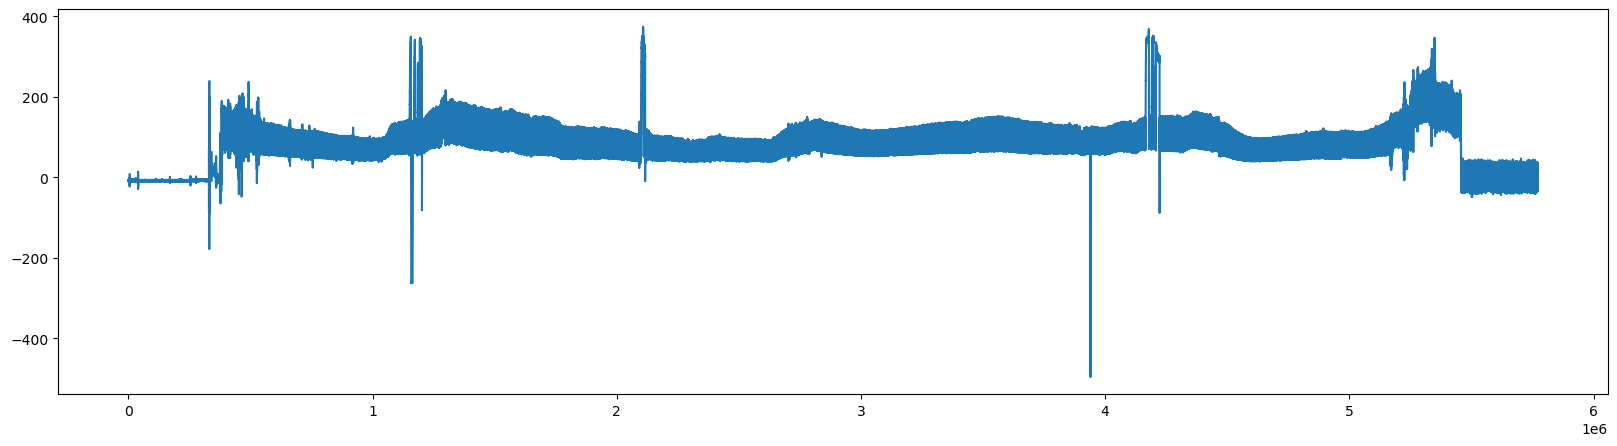

In [104]:
plt.figure(figsize=(20, 5))
plt.plot(tmp_abp_01)
plt.show()

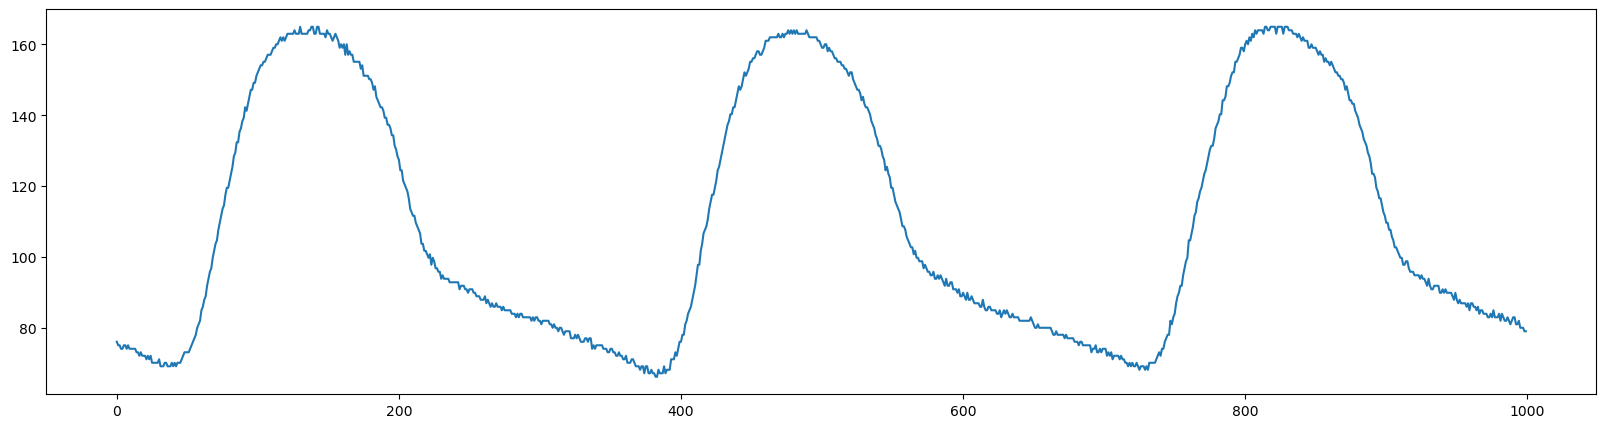

In [105]:
plt.figure(figsize=(20, 5))
plt.plot(tmp_abp_01[1500000:1501000])
plt.show()

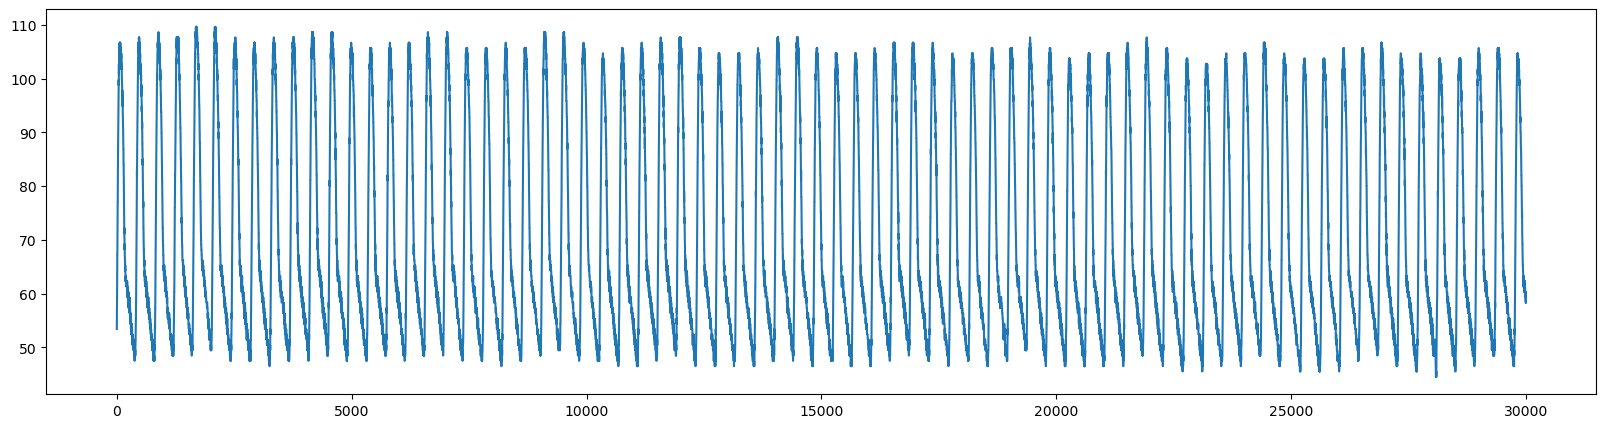

In [106]:
x1 = 1608 * 500
x2 = 1668 * 500

plt.figure(figsize=(20, 5))
plt.plot(tmp_abp_01[x1:x2])
plt.show()

In [107]:
positiveSegmentsMap, negativeSegmentsMap, iohEventsMap, cleanEventsMap \
    = extract_segments_ALT(cases_of_interest_idx[:1], min_before_event=3, debug=True)

  0%|                                                                                                                                      | 0/1 [00:00<?, ?it/s]

Loading case: 0001, (1 of 1)
Length of SNUADC/ART:       5770575
Length of SNUADC/ECG_II:    5770575
Length of BIS/EEG1_WAV:     1477268
Processing case 1 with length 11541s
Processing case 1 with length 11541.149763s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]

IOH Events for case 1: [(1788, 1849), (1850, 2113), (2314, 2375), (4113, 4199), (4261, 5350), (9096, 9156), (9157, 9503)]
Clean Events for case 1: [(5351, 7151), (7152, 8952), (9504, 11304)]
positiveSegments: 26
negativeSegments: 9


In [108]:
print((
    len(positiveSegmentsMap[1]),
    len(negativeSegmentsMap[1]),
    len(iohEventsMap[1]),
    len(cleanEventsMap[1])
))

(26, 9, 7, 3)


In [109]:
positiveSegmentsMap[1]

[(1608, 1668, 3),
 (1488, 1548, 5),
 (1188, 1248, 10),
 (888, 948, 15),
 (1670, 1730, 3),
 (1550, 1610, 5),
 (1250, 1310, 10),
 (950, 1010, 15),
 (2134, 2194, 3),
 (1714, 1774, 10),
 (1414, 1474, 15),
 (3933, 3993, 3),
 (3813, 3873, 5),
 (3513, 3573, 10),
 (3213, 3273, 15),
 (3961, 4021, 5),
 (3661, 3721, 10),
 (3361, 3421, 15),
 (8916, 8976, 3),
 (8796, 8856, 5),
 (8496, 8556, 10),
 (8196, 8256, 15),
 (8977, 9037, 3),
 (8857, 8917, 5),
 (8557, 8617, 10),
 (8257, 8317, 15)]

In [110]:
negativeSegmentsMap[1]

[(5951, 6011),
 (6251, 6311),
 (6551, 6611),
 (7752, 7812),
 (8052, 8112),
 (8352, 8412),
 (10104, 10164),
 (10404, 10464),
 (10704, 10764)]

In [111]:
tmp_vf_crop = copy.deepcopy(tmp_vf)
tmp_vf_crop.crop(1608, 1668)

VitalFile('./vitaldb_cache/vital_mini/0001_mini.vital', '['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']')

In [112]:
tmp_vf_crop.get_track_names()

['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']

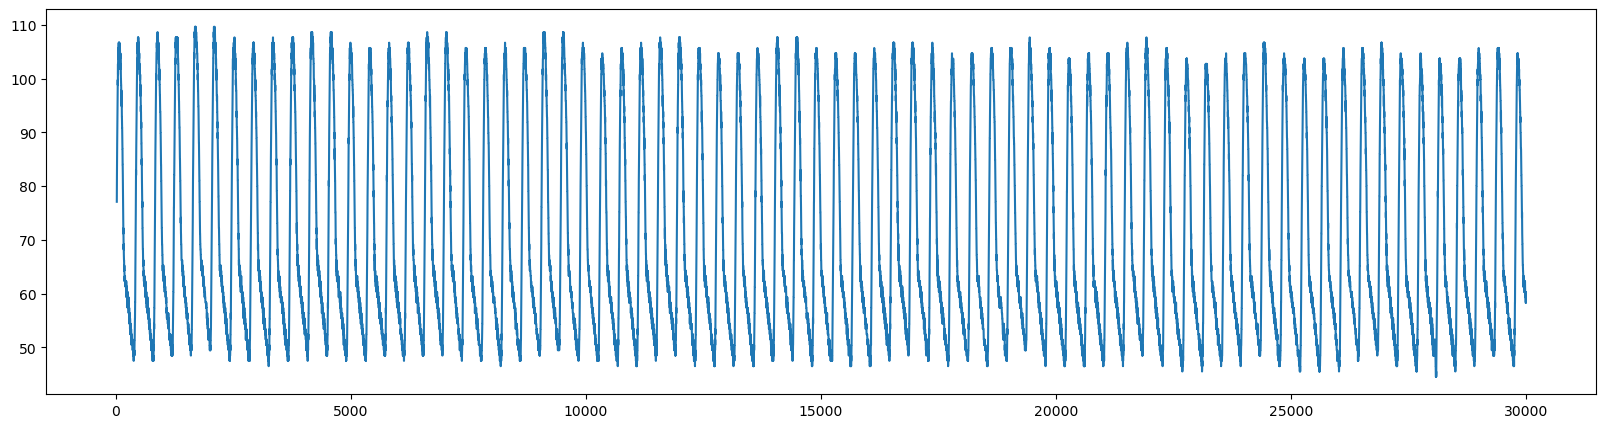

In [113]:
tmp_abp_01_crop = tmp_vf_crop.to_numpy(TRACK_NAMES[0], 1/500)

plt.figure(figsize=(20, 5))
plt.plot(tmp_abp_01_crop)
plt.show()

In [114]:
tmp_abp_01_crop.shape

(30000, 1)

In [115]:
tmp_abp_01[1608*500:1668*500].shape

(30000, 1)

In [116]:
tmp_abp_01[x1:x2].shape

(30000, 1)

In [117]:
np.mean(np.equal(tmp_abp_01[x1:x2], tmp_abp_01_crop))

0.9993333333333333

In [118]:
np.mean(tmp_abp_01[x1:x2])

70.27229

In [119]:
np.mean(tmp_abp_01_crop)

nan

In [120]:
np.nanmean(tmp_abp_01_crop)

70.27588

In [121]:
tmp_vf_crop.to_vital('./1c.vital')

True

In [122]:
# Vital files do not appear saved correctly
#sf = './vitaldb_cache/segments/0001/0001_1608_03_True.track'
sf = './1c.vital'
sf_vf = vitaldb.VitalFile(sf)
sf_vf

VitalFile('./1c.vital', '['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']')

In [123]:
sf_vf.get_track_names()

['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']

In [124]:
time_check = datetime.fromtimestamp(sf_vf.dtend) - datetime.fromtimestamp(sf_vf.dtstart)
time_check

datetime.timedelta(seconds=60, microseconds=125000)

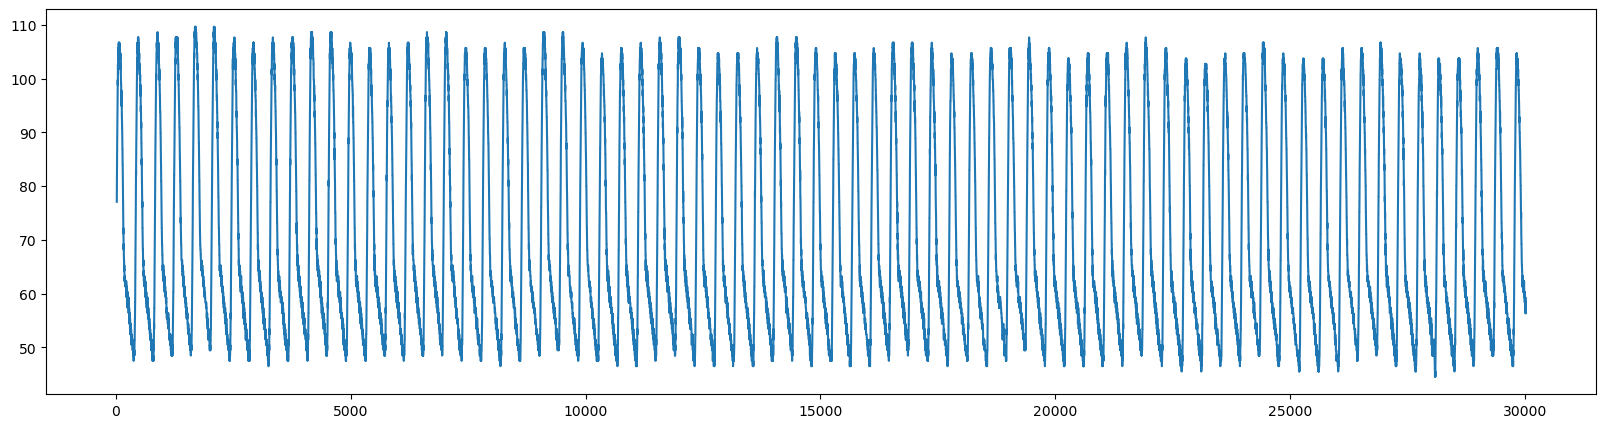

In [125]:
plt.figure(figsize=(20, 5))
plt.plot(sf_vf.to_numpy(TRACK_NAMES[0], 1/500))
plt.show()

In [126]:
np.mean(np.equal(tmp_vf_crop.to_numpy(TRACK_NAMES[0], 1/500), sf_vf.to_numpy(TRACK_NAMES[0], 1/500)))

ValueError: operands could not be broadcast together with shapes (30000,1) (30063,1) 

In [127]:
np.mean(np.equal(tmp_vf_crop.to_numpy(TRACK_NAMES[0], 1/500), sf_vf.to_numpy(TRACK_NAMES[0], 1/500)[:30000]))

0.9993333333333333

In [128]:
tmp_vf_crop.to_numpy(TRACK_NAMES[0], 1/500).shape

(30000, 1)

In [129]:
sf_vf.to_numpy(TRACK_NAMES[0], 1/500).shape

(30063, 1)

In [130]:
tmp_vf_crop.to_numpy(TRACK_NAMES[0], 1/500)[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [131]:
sf_vf.to_numpy(TRACK_NAMES[0], 1/500)[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [132]:
tmp_vf_path = f'{VITAL_MINI}/0001_mini.vital'
tmp_vf = vitaldb.VitalFile(tmp_vf_path)
tmp_abp_01 = tmp_vf.to_numpy(TRACK_NAMES[0], 1/500)
tmp_abp_01.shape

(5770575, 1)

## Positive Segments

(1608, 1668, 3)
60
(30000, 1)
70.27229


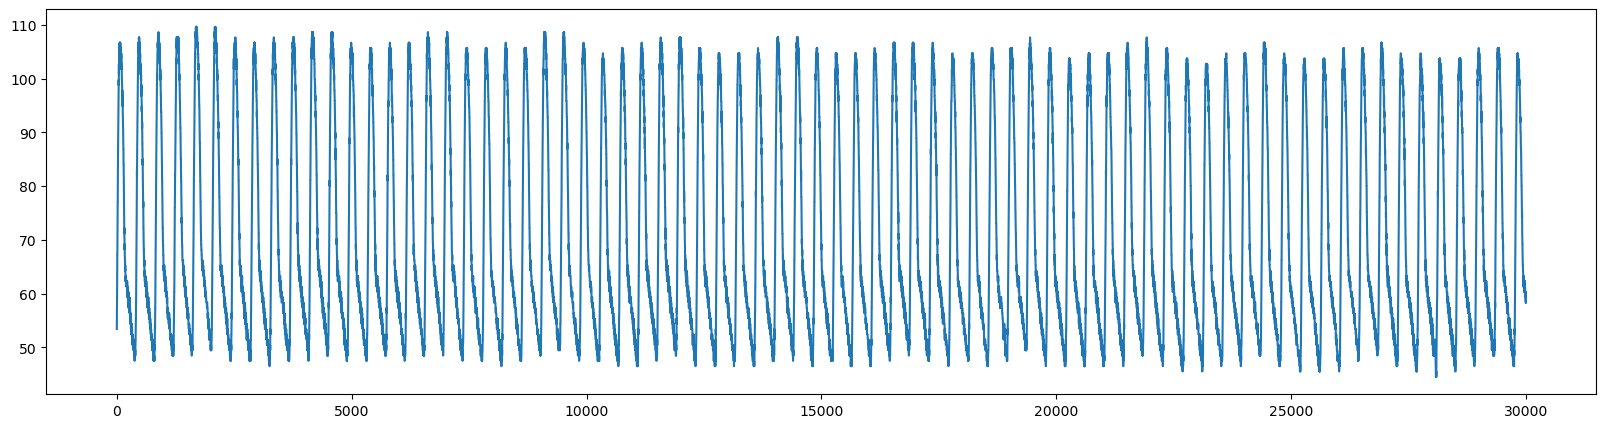


(1488, 1548, 5)
60
(30000, 1)
74.75686


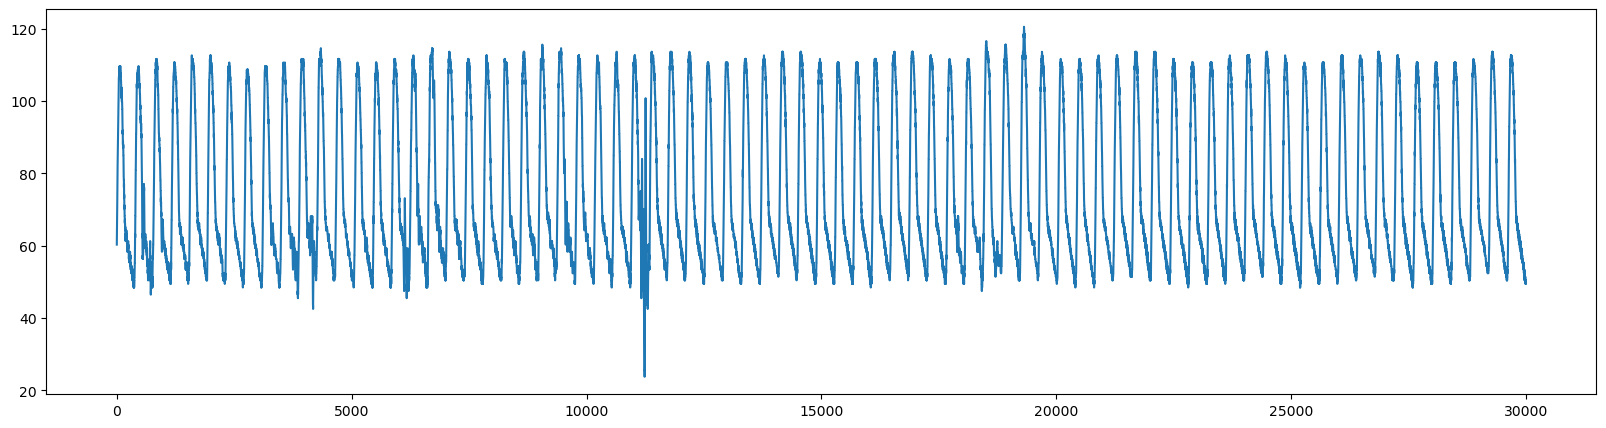


(1188, 1248, 10)
60
(30000, 1)
85.91541


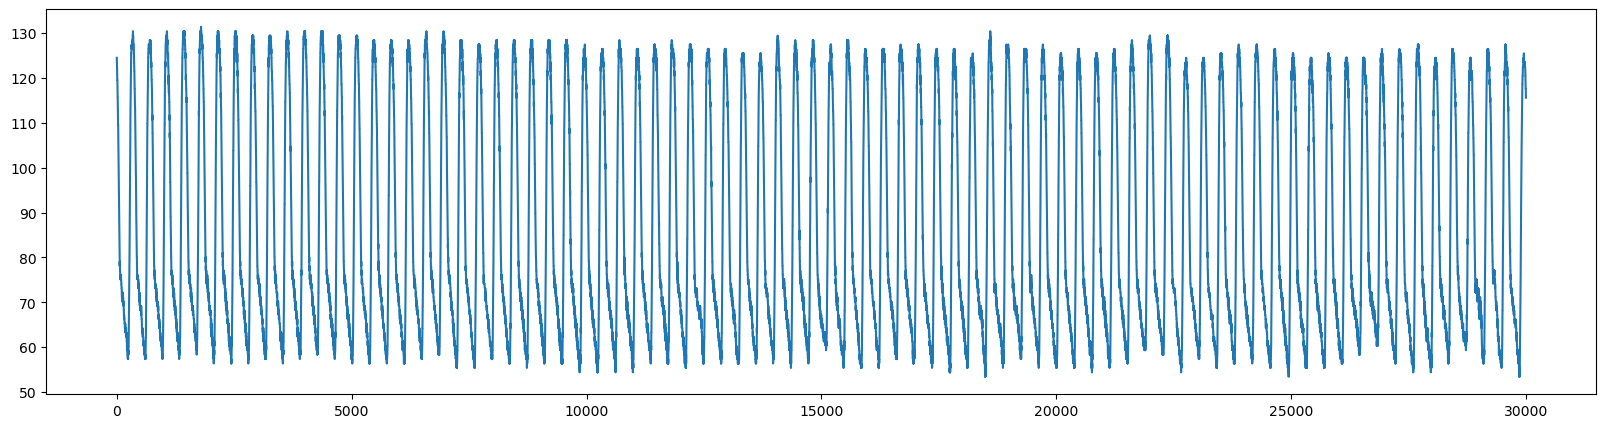


(888, 948, 15)
60
(30000, 1)
107.11688


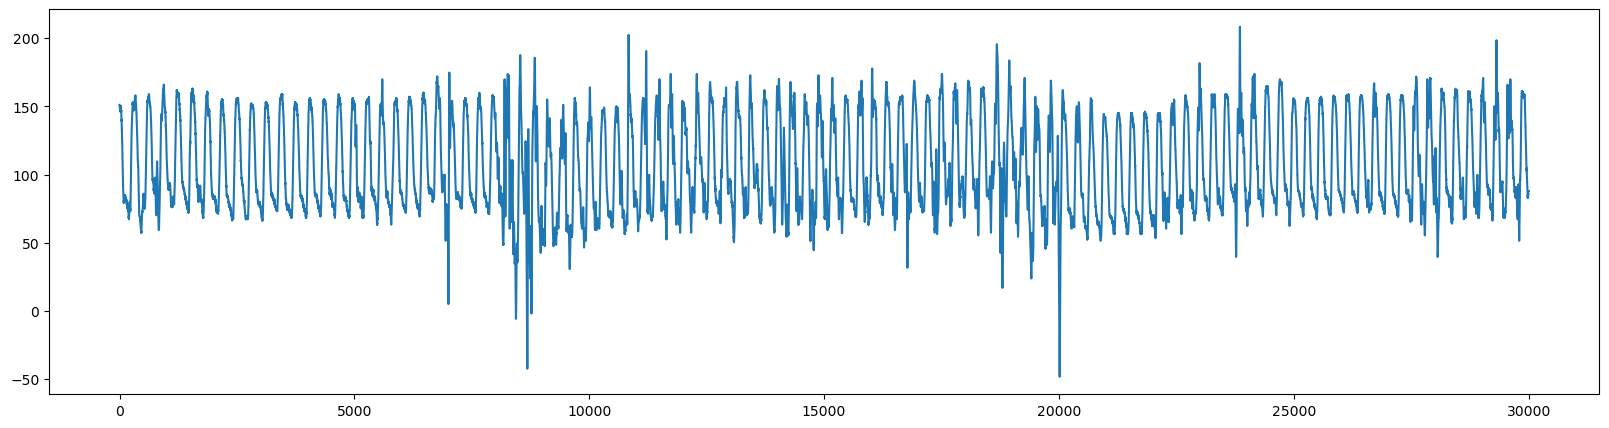


(1670, 1730, 3)
60
(30000, 1)
68.11111


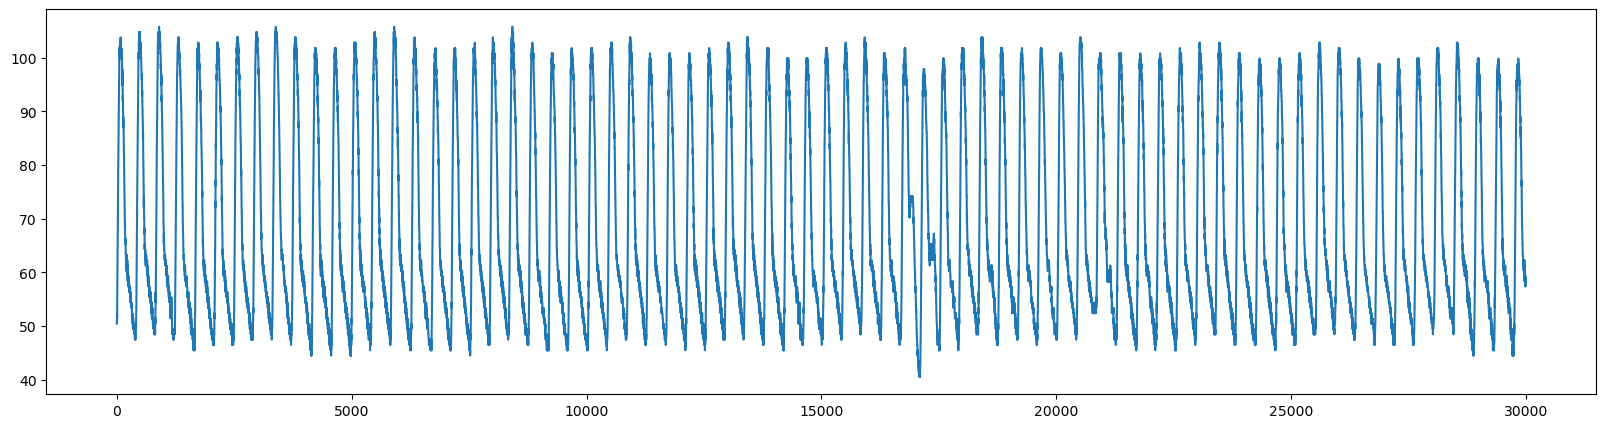


(1550, 1610, 5)
60
(30000, 1)
72.95258


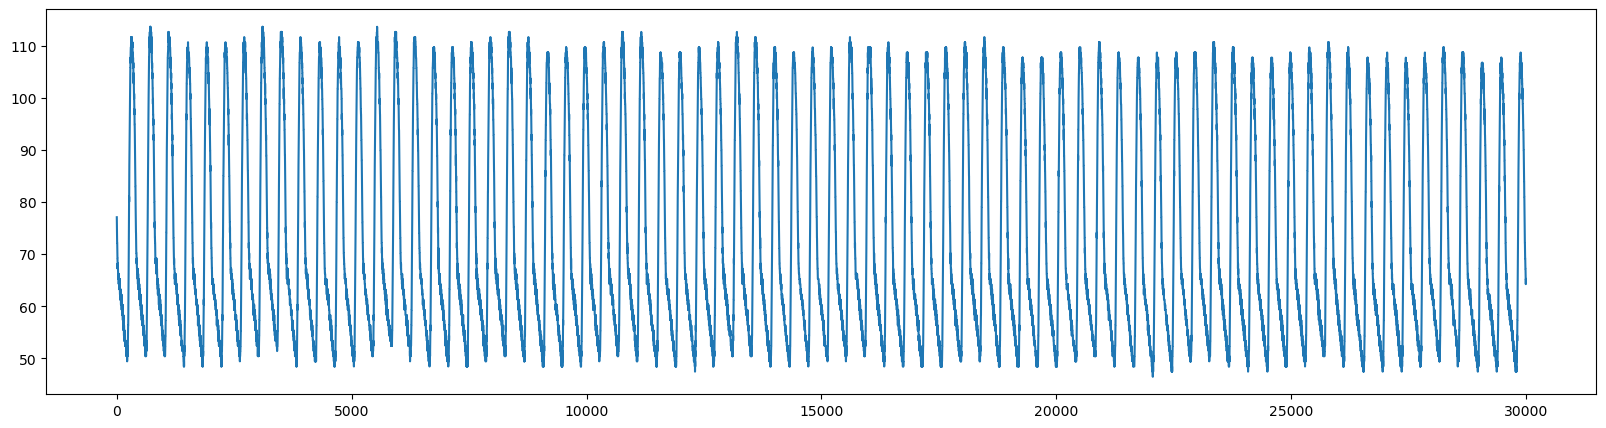


(1250, 1310, 10)
60
(30000, 1)
82.02875


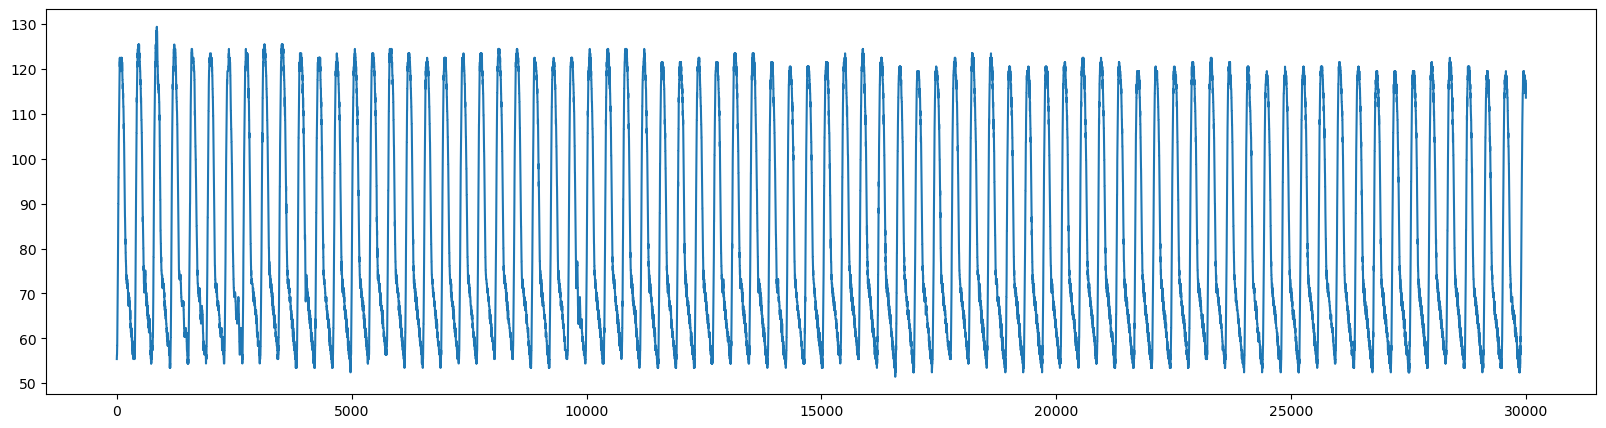


(950, 1010, 15)
60
(30000, 1)
110.77367


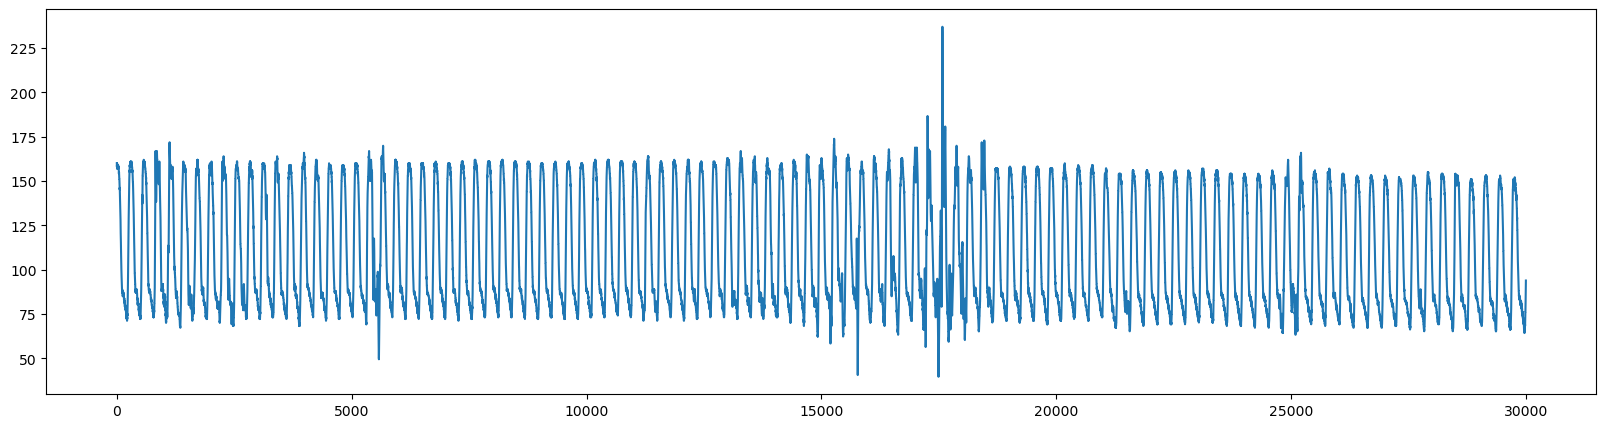


(2134, 2194, 3)
60
(30000, 1)
85.28487


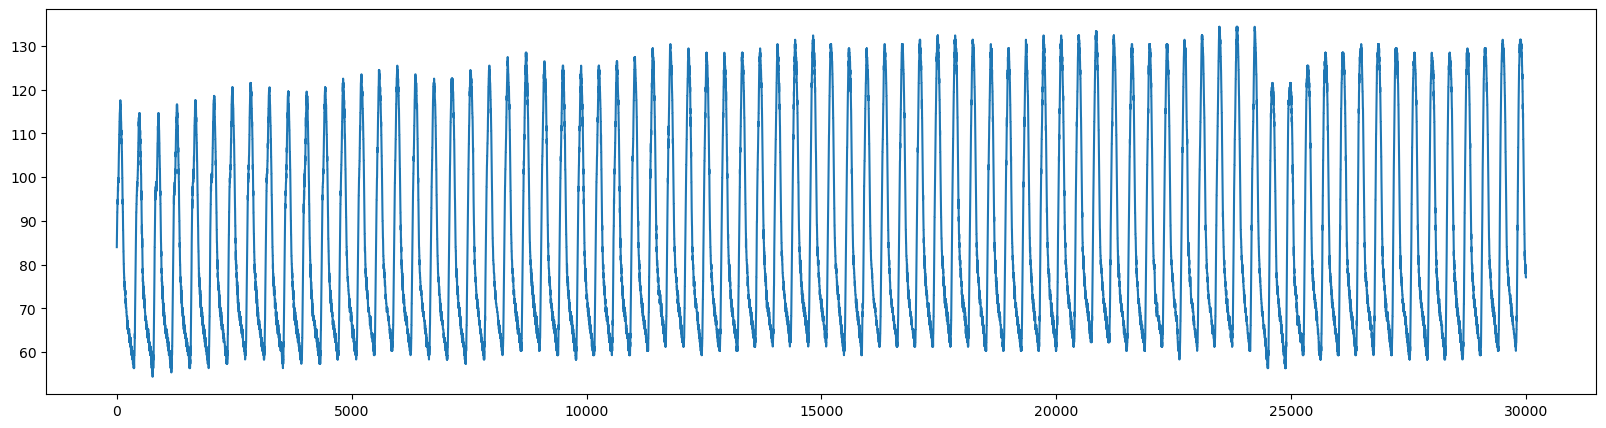


(1714, 1774, 10)
60
(30000, 1)
67.76616


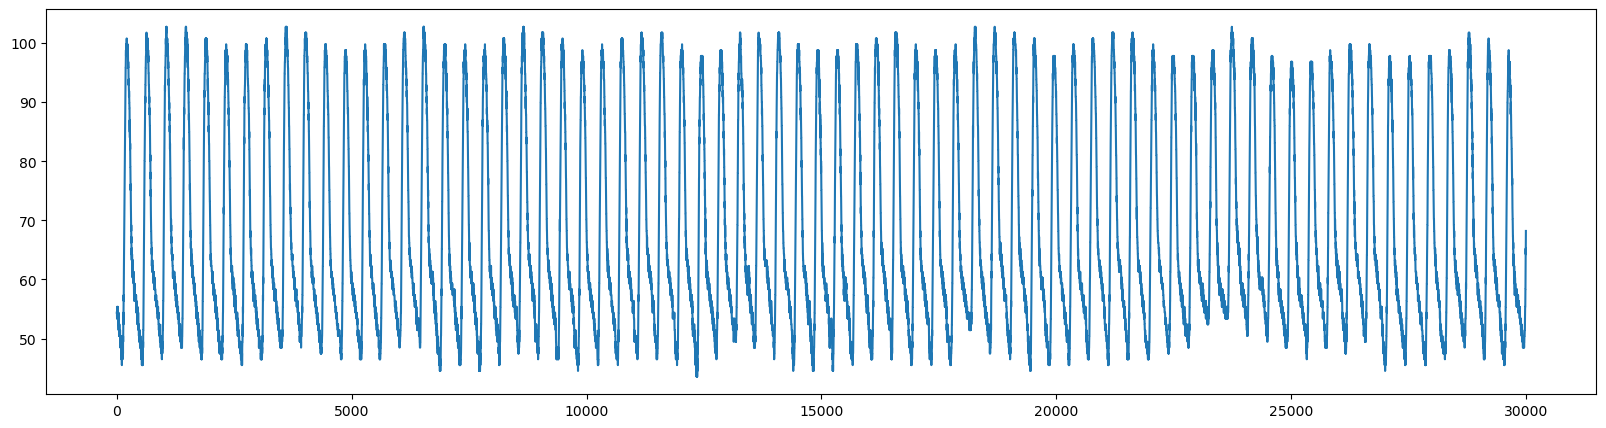


(1414, 1474, 15)
60
(30000, 1)
74.79514


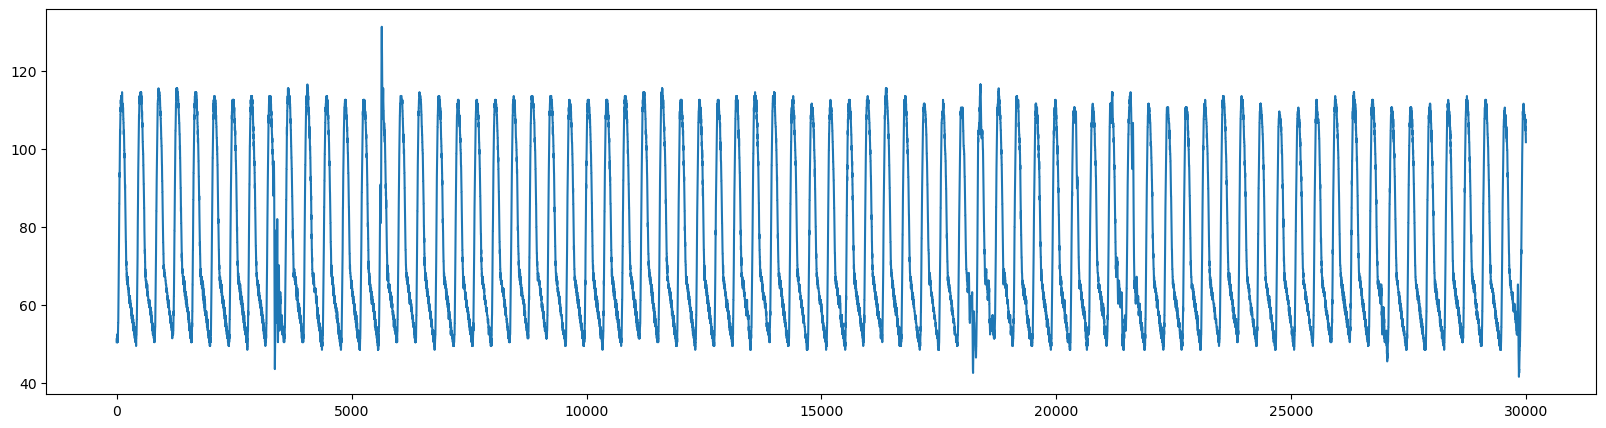


(3933, 3993, 3)
60
(30000, 1)
72.79419


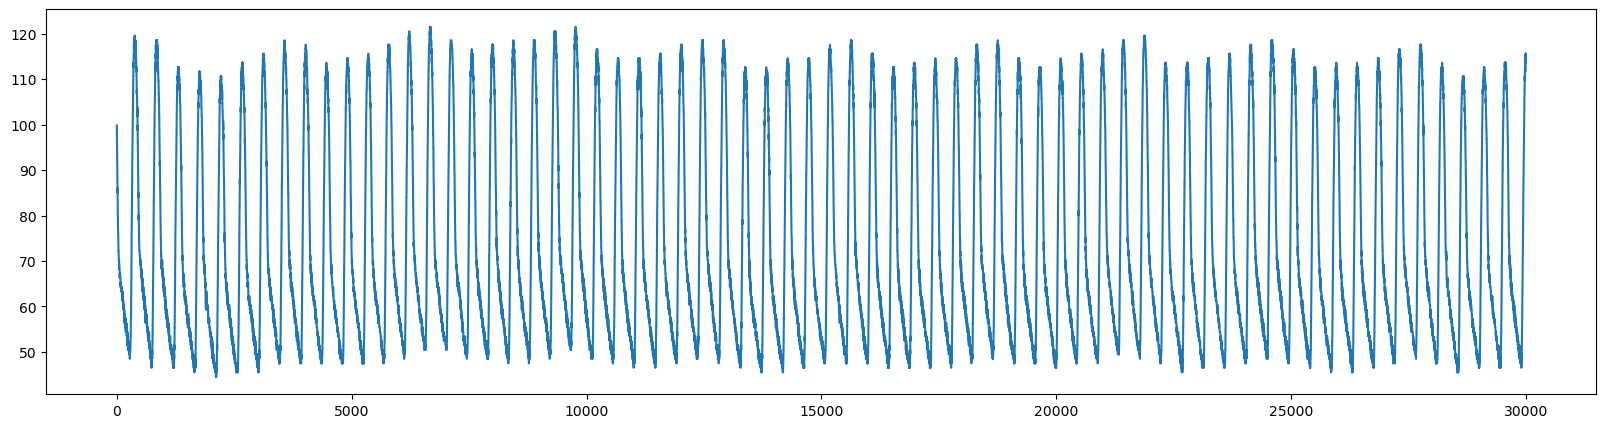


(3813, 3873, 5)
60
(30000, 1)
73.544


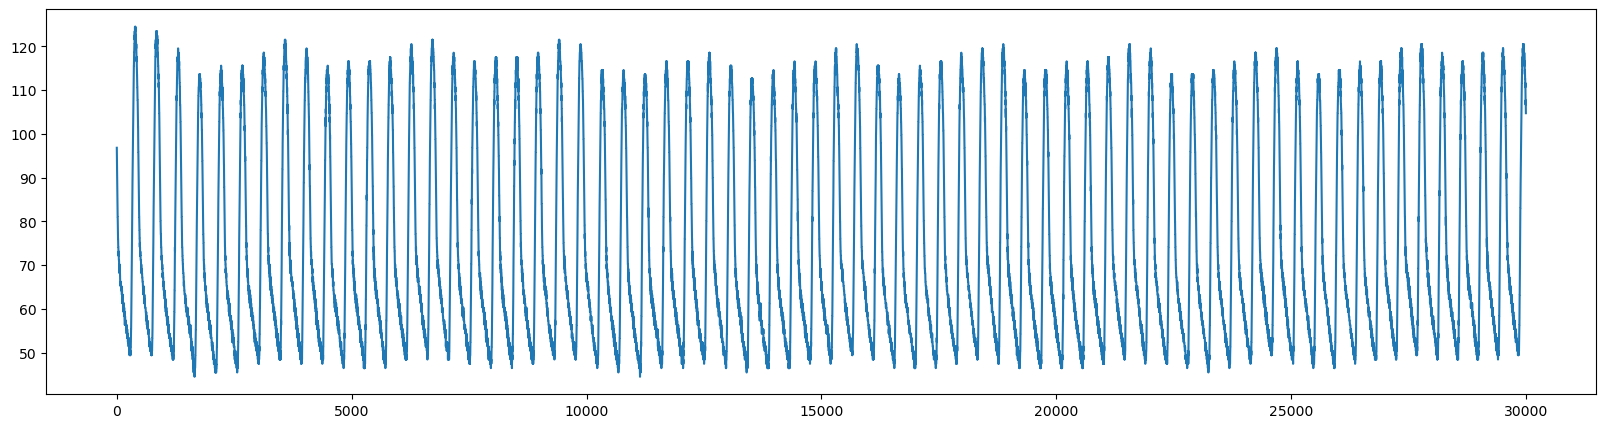


(3513, 3573, 10)
60
(30000, 1)
78.23472


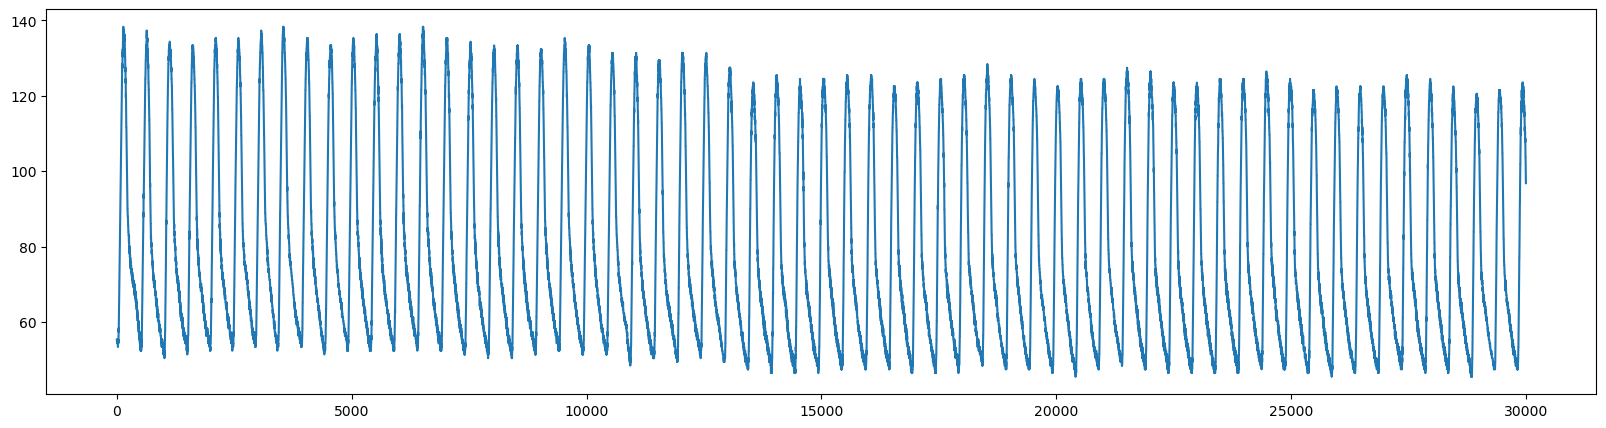


(3213, 3273, 15)
60
(30000, 1)
94.582825


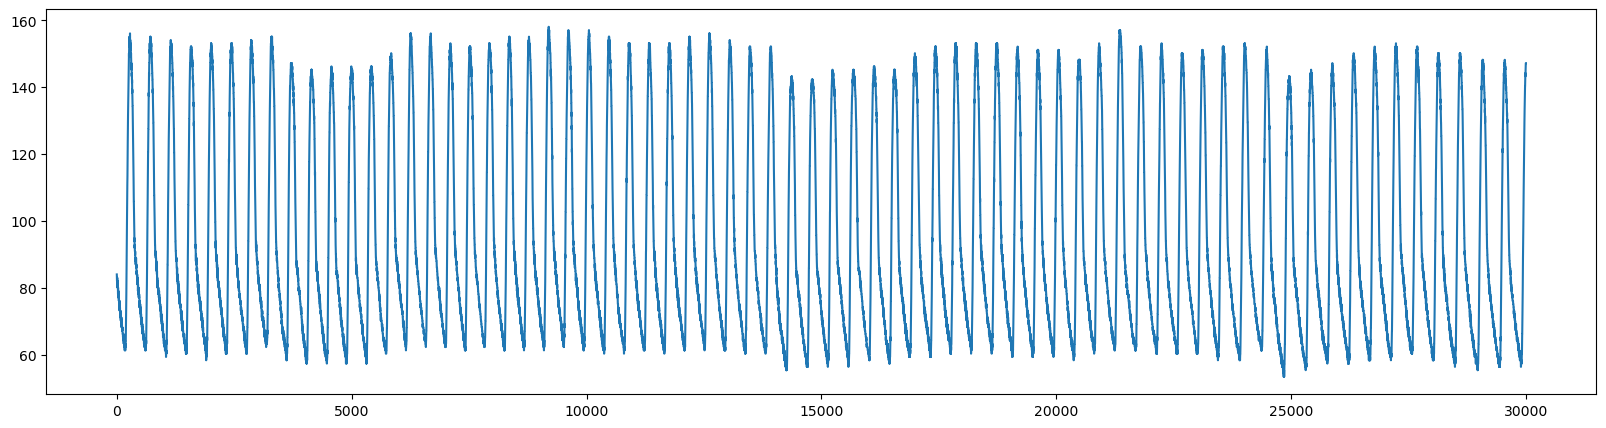


(3961, 4021, 5)
60
(30000, 1)
72.5077


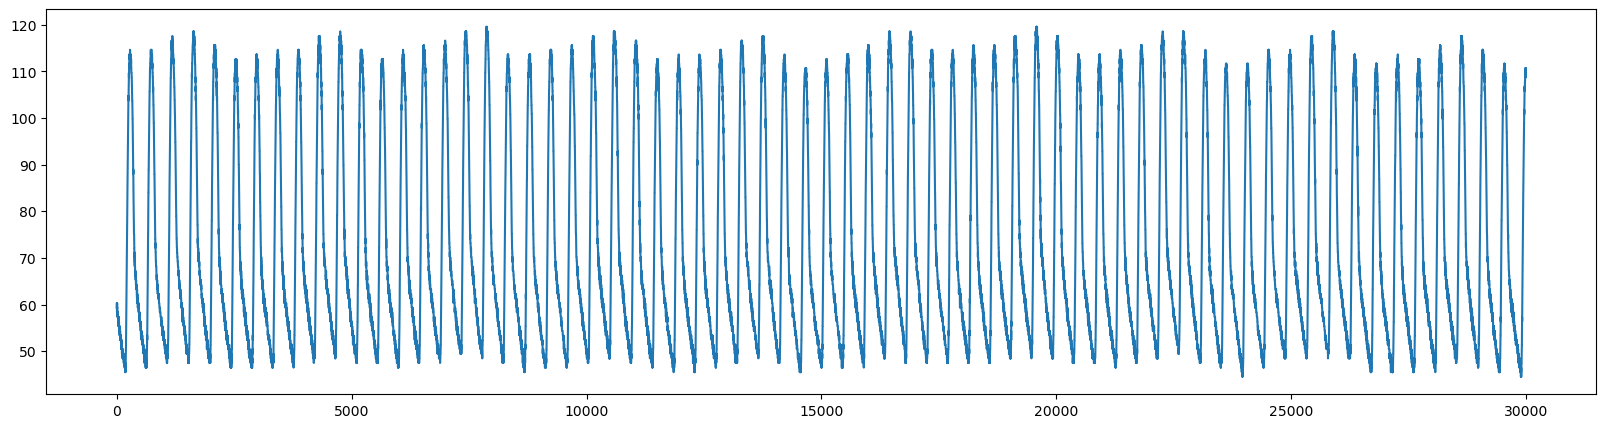


(3661, 3721, 10)
60
(30000, 1)
75.95635


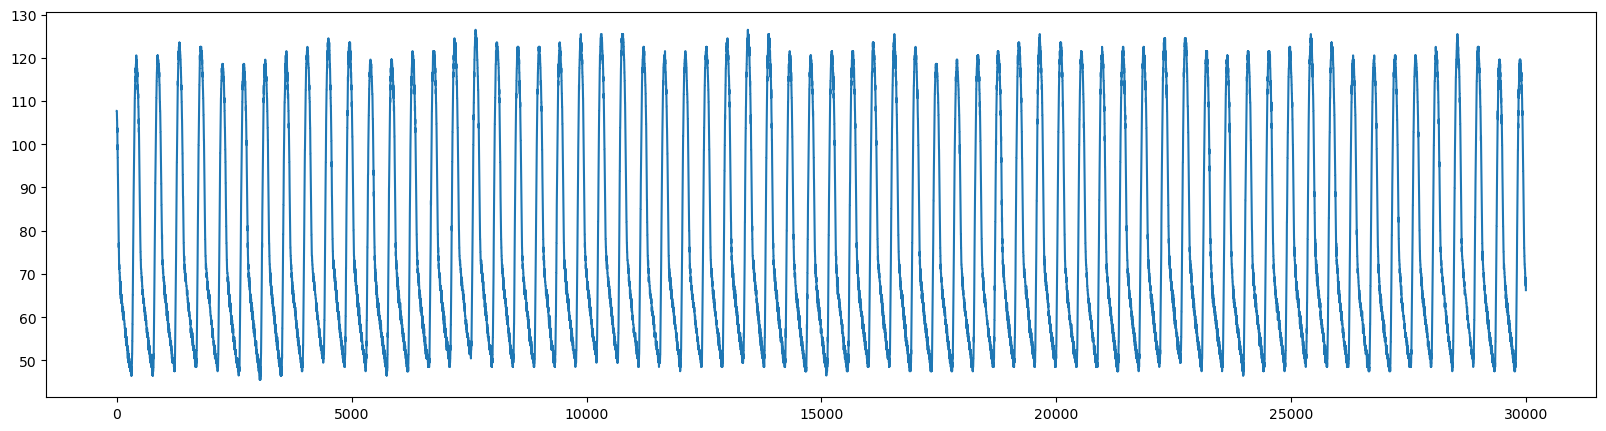


(3361, 3421, 15)
60
(30000, 1)
92.20882


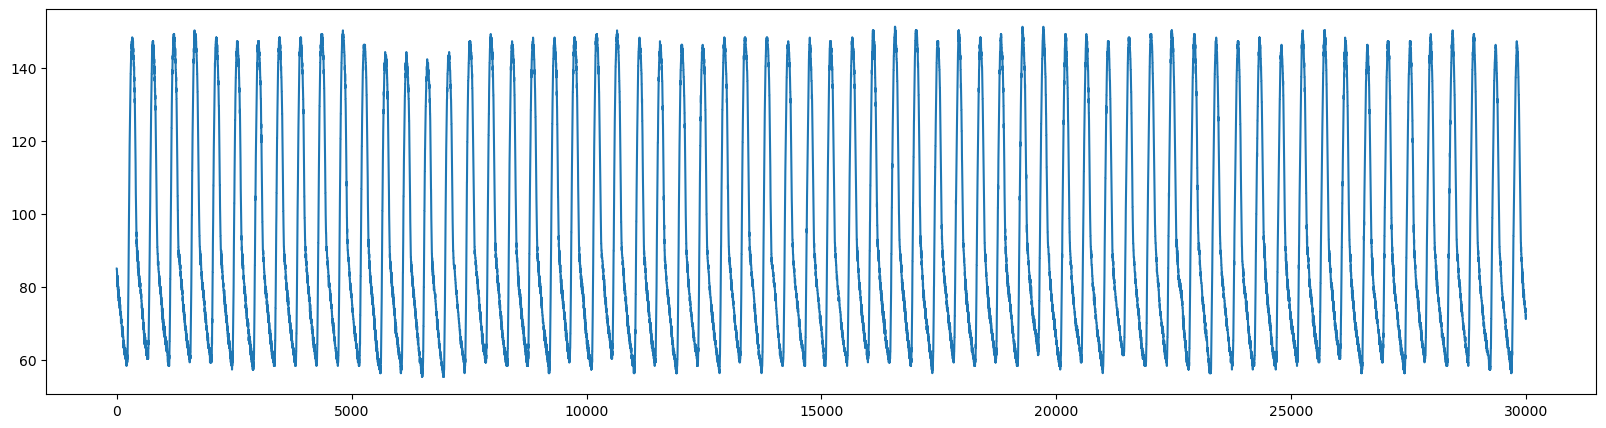


(8916, 8976, 3)
60
(30000, 1)
87.1427


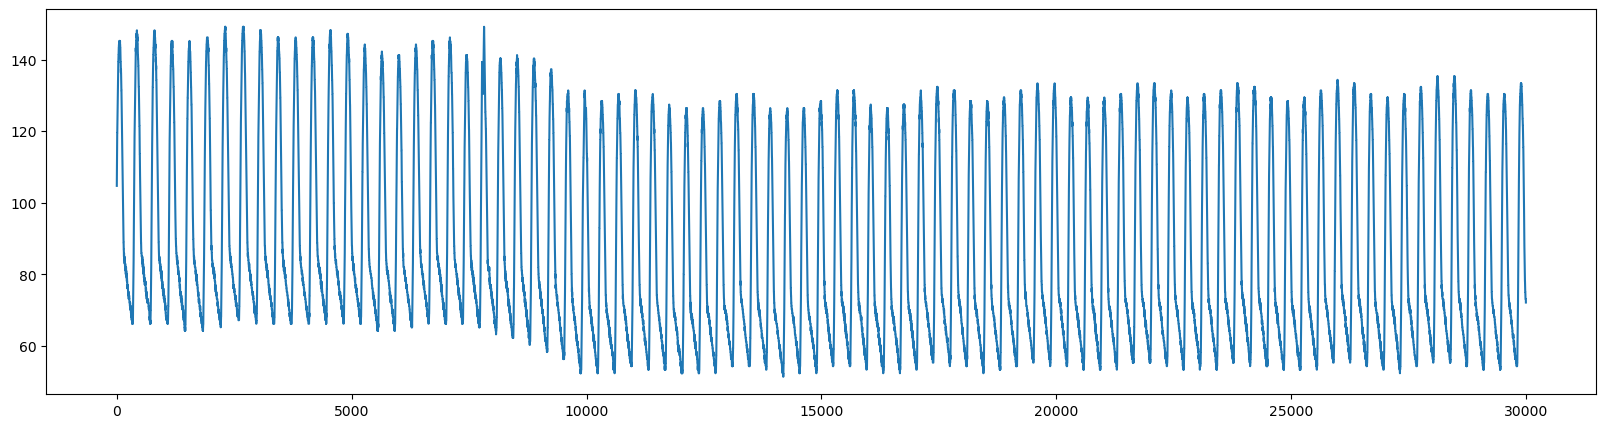


(8796, 8856, 5)
60
(30000, 1)
102.39892


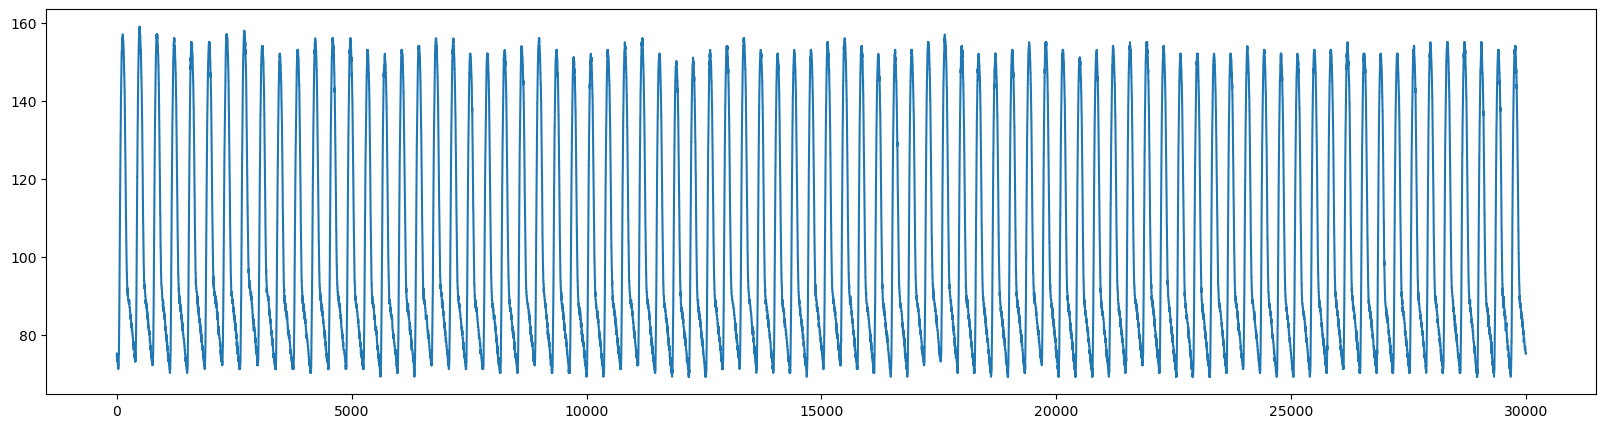


(8496, 8556, 10)
60
(30000, 1)
97.78199


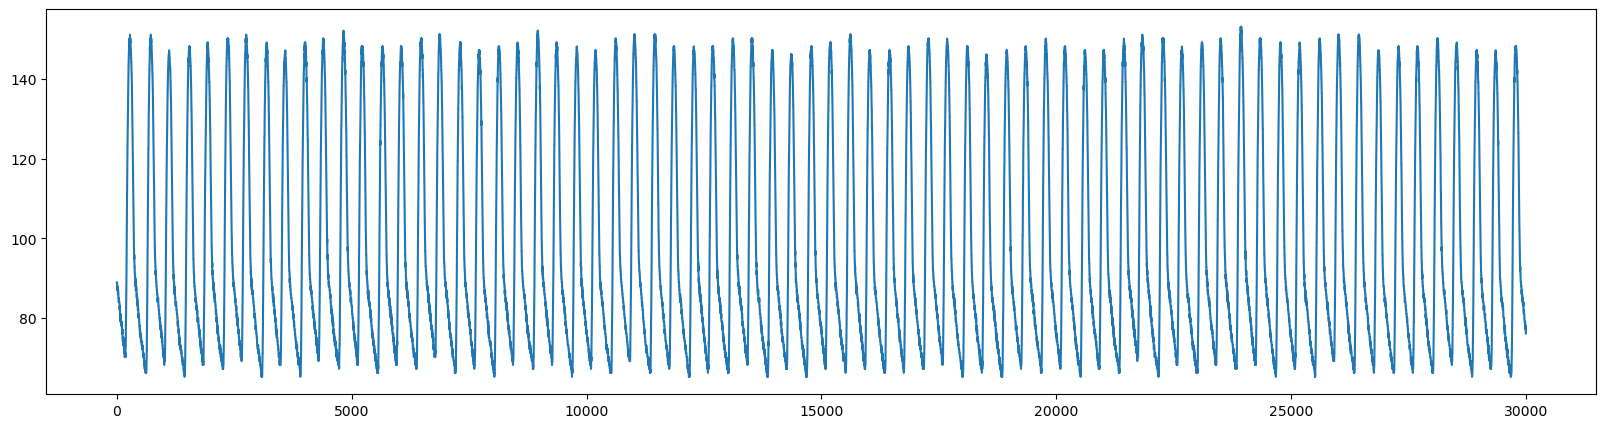


(8196, 8256, 15)
60
(30000, 1)
87.75081


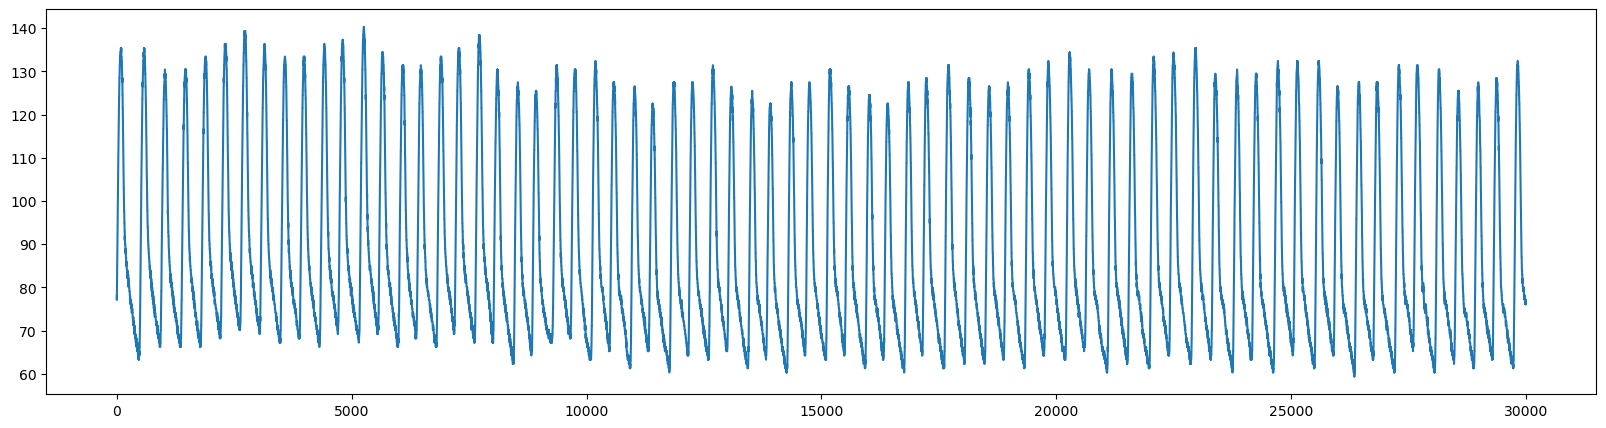


(8977, 9037, 3)
60
(30000, 1)
80.818794


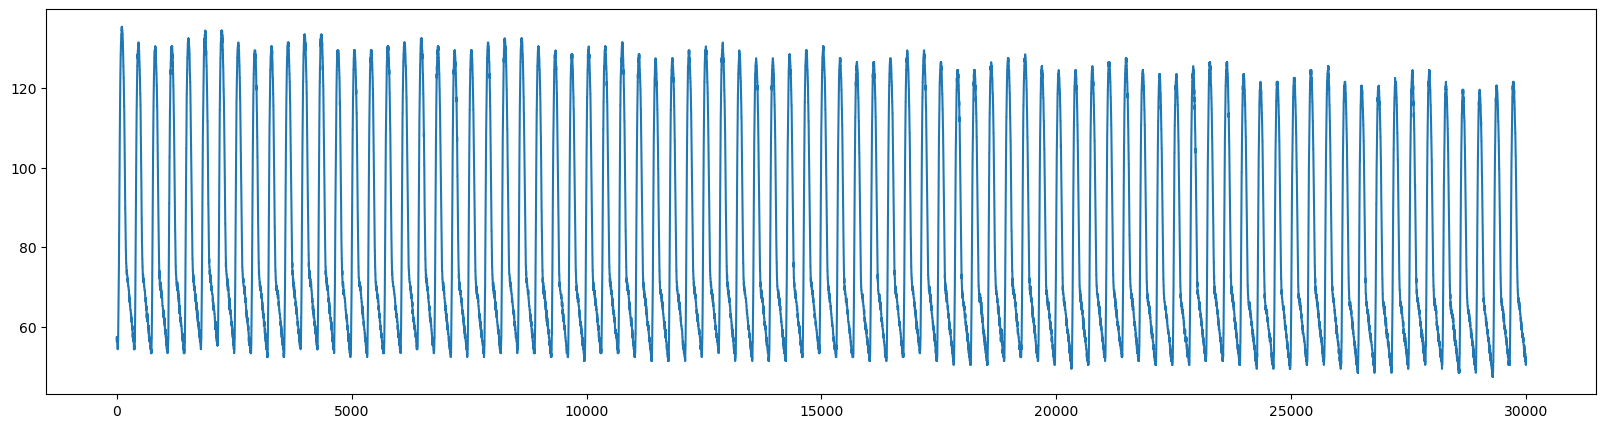


(8857, 8917, 5)
60
(30000, 1)
97.05729


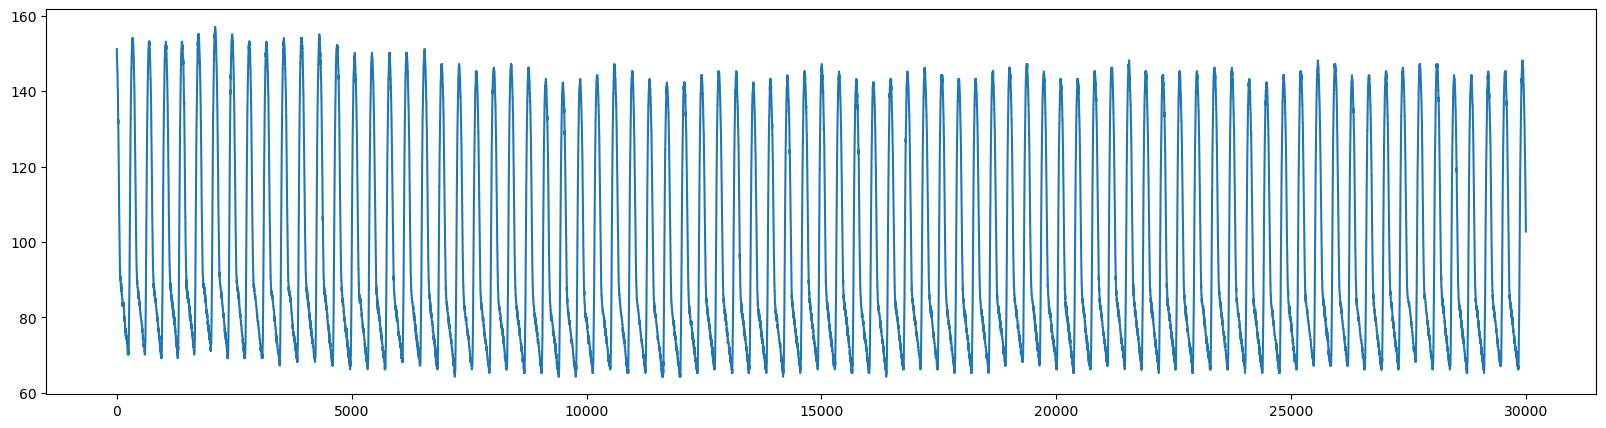


(8557, 8617, 10)
60
(30000, 1)
96.81807


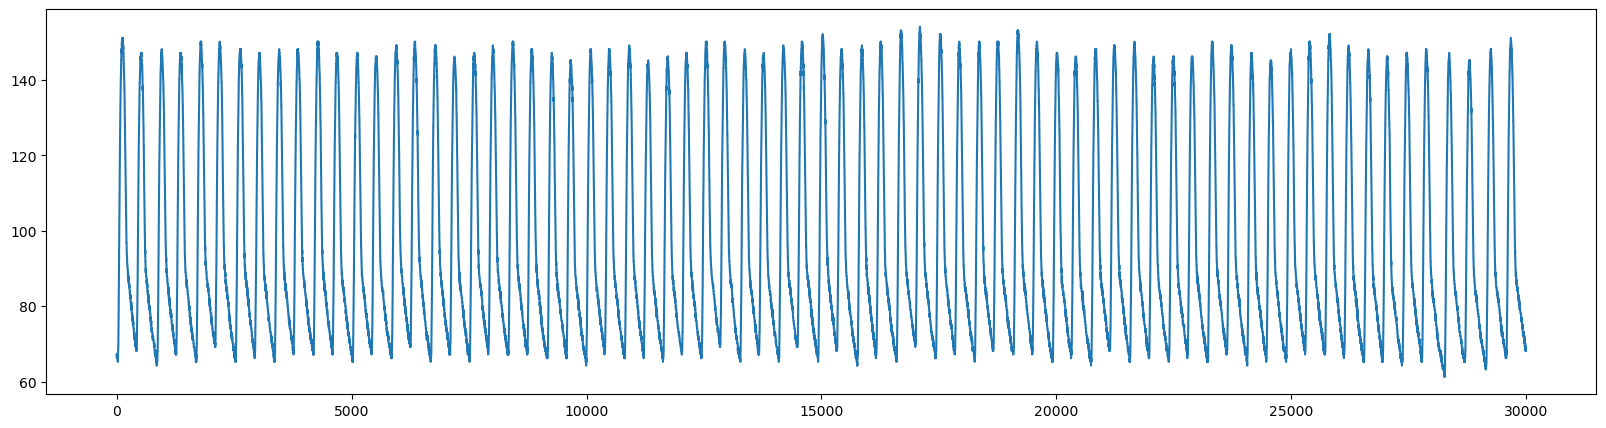


(8257, 8317, 15)
60
(30000, 1)
94.49152


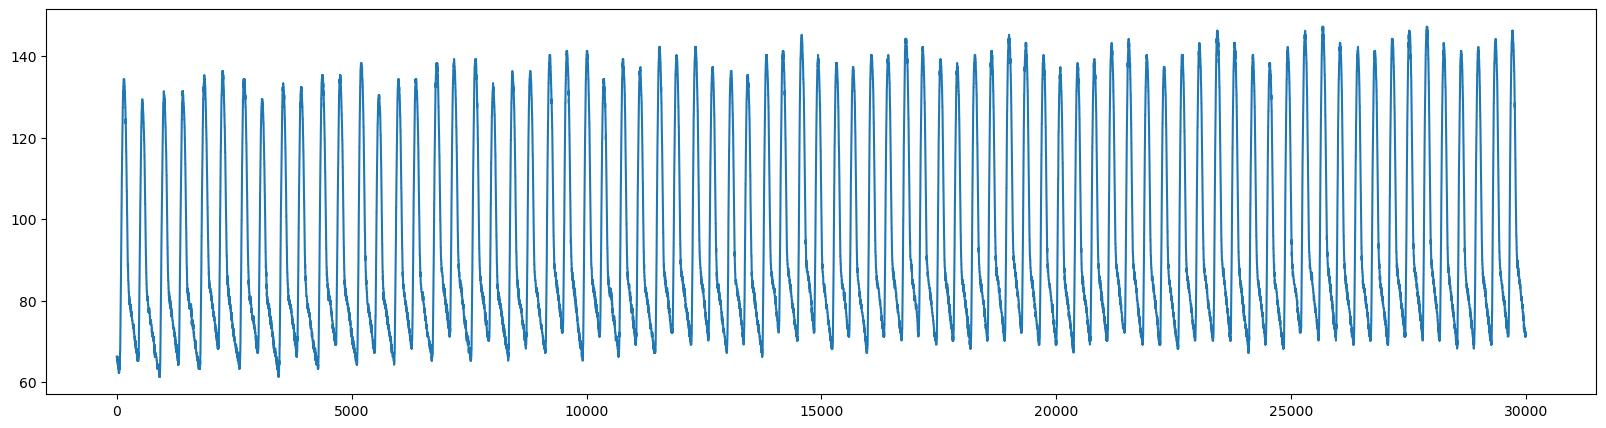

In [133]:
for (x1, x2, r) in positiveSegmentsMap[1]:
    print((x1, x2, r))
    print(x2 - x1)
    
    abp = tmp_abp_01[x1*500:x2*500]
    print(abp.shape)
    print(np.nanmean(abp))
    
    plt.figure(figsize=(20, 5))
    plt.plot(abp)
    plt.show()
    
    print()

## Negative Segments

(5951, 6011, 15)
60
(30000, 1)
76.35643


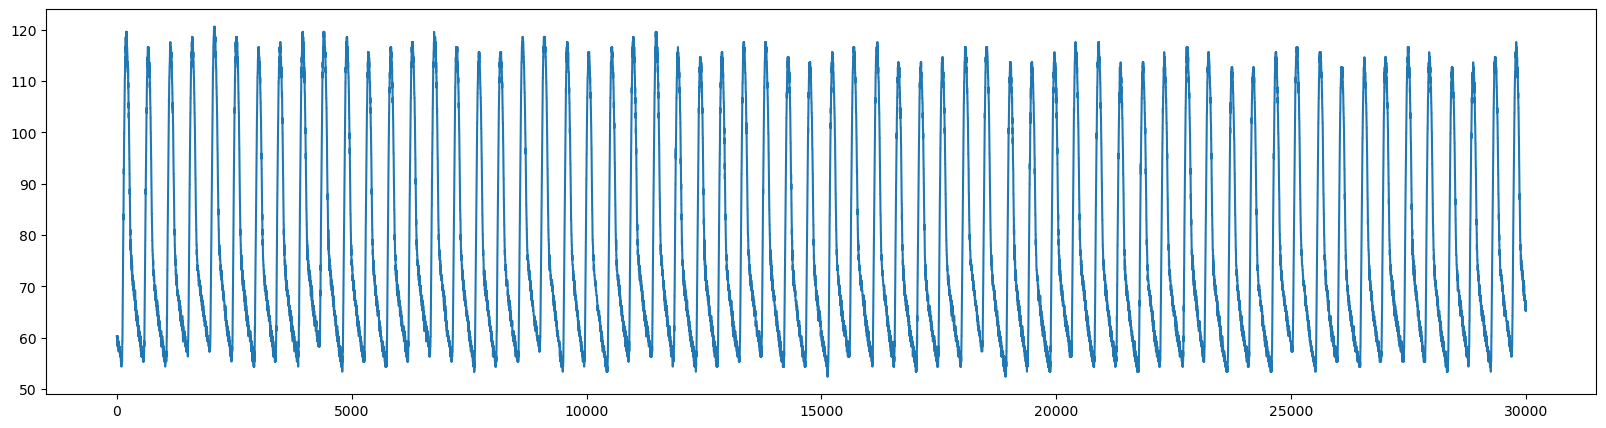


(6251, 6311, 15)
60
(30000, 1)
77.73151


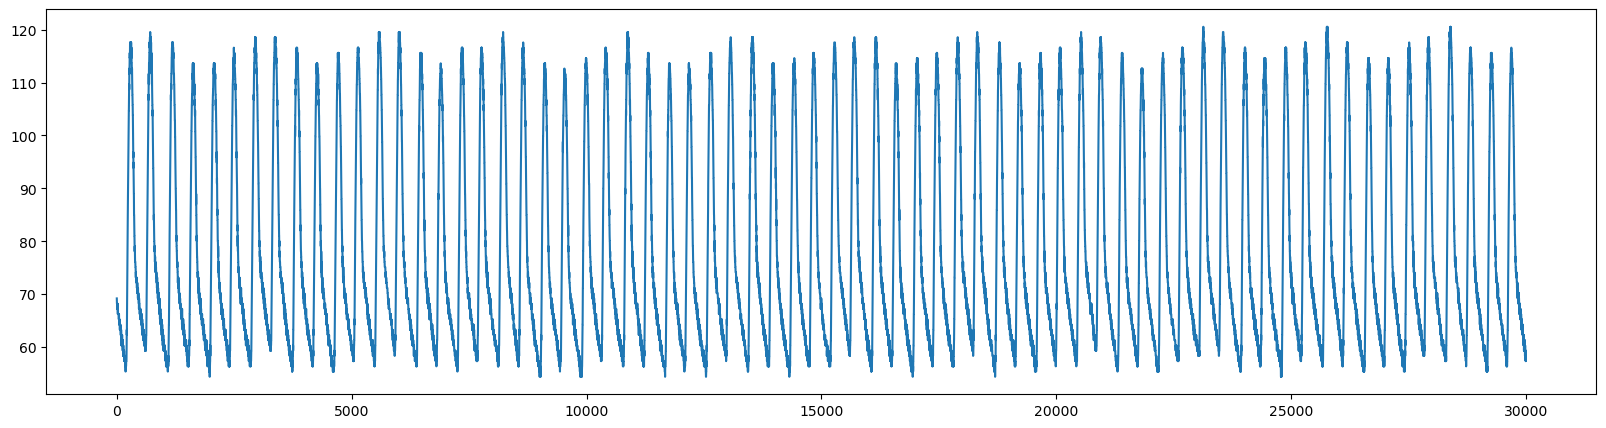


(6551, 6611, 15)
60
(30000, 1)
85.06976


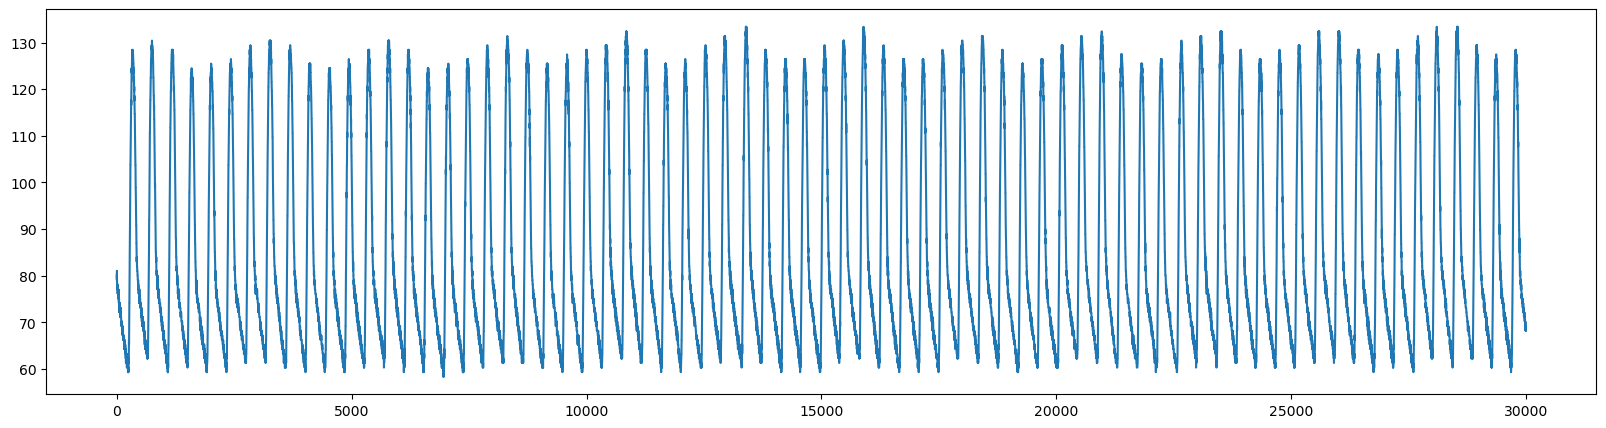


(7752, 7812, 15)
60
(30000, 1)
80.11845


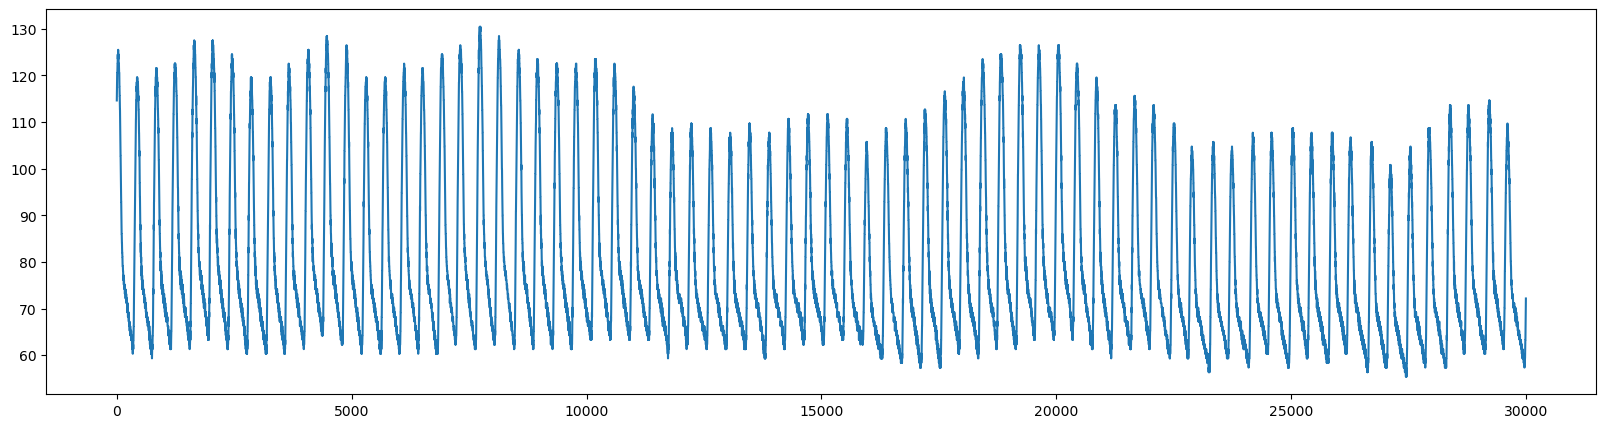


(8052, 8112, 15)
60
(30000, 1)
88.3259


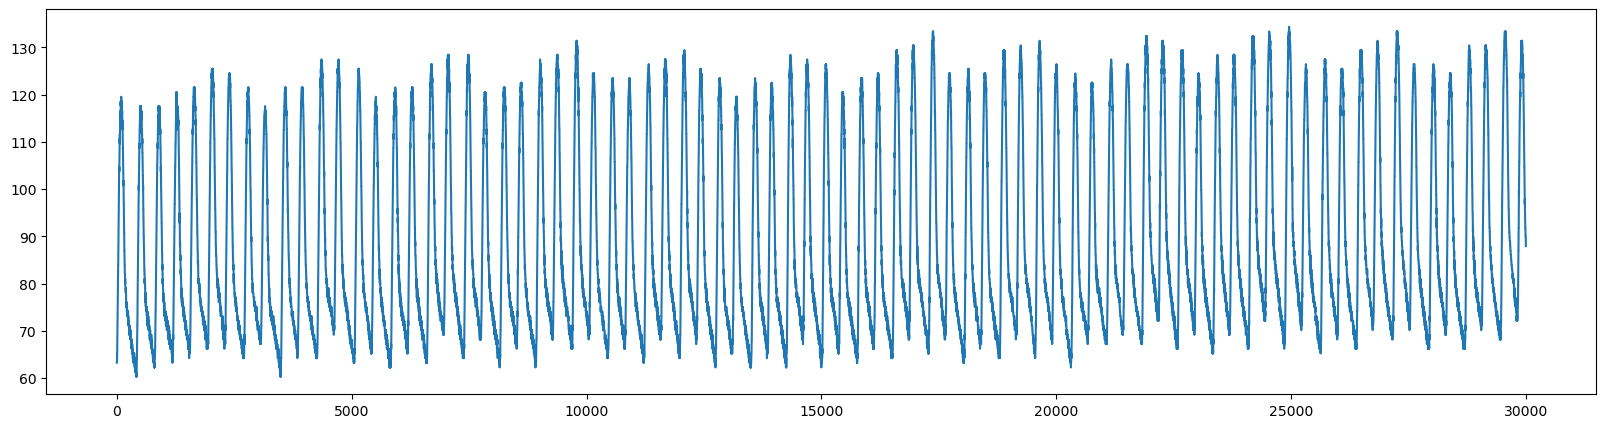


(8352, 8412, 15)
60
(30000, 1)
182.59964


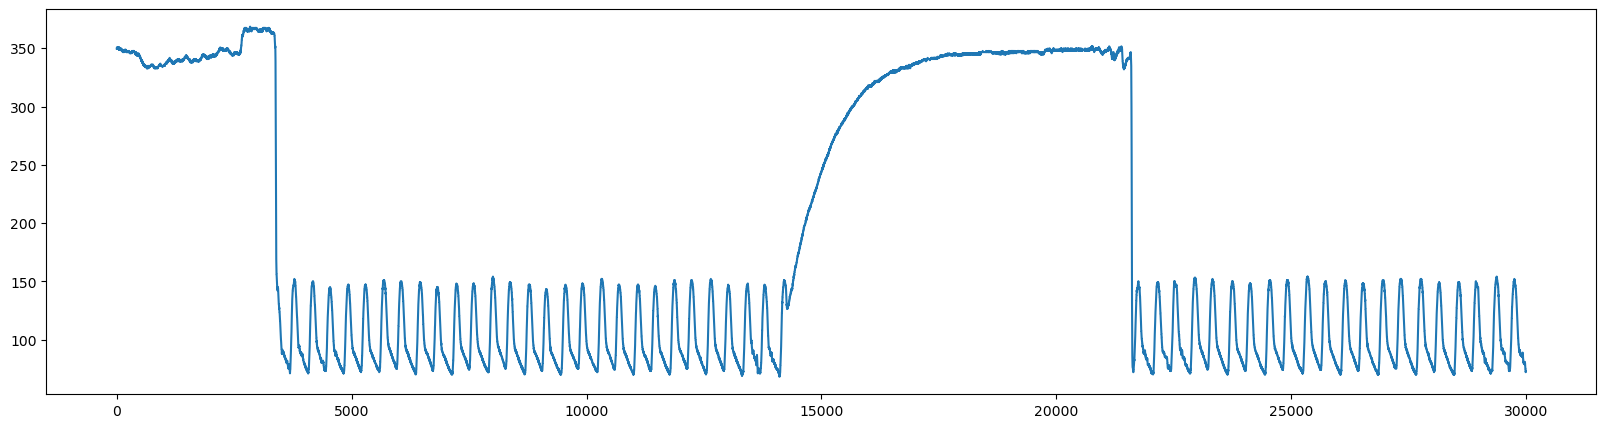


(10104, 10164, 15)
60
(30000, 1)
72.81174


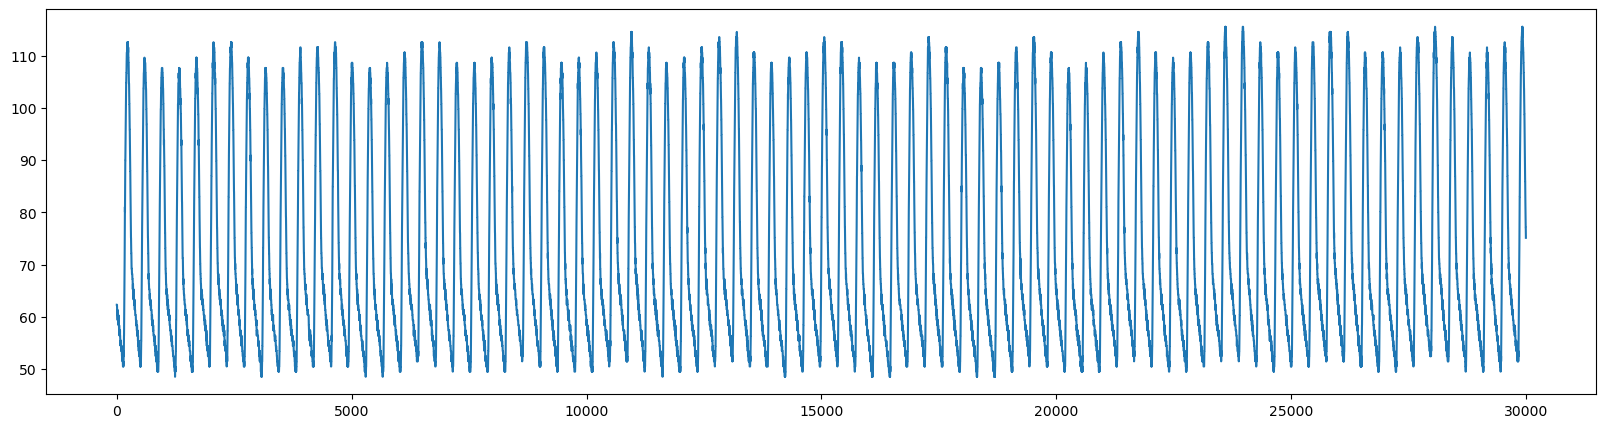


(10404, 10464, 15)
60
(30000, 1)
106.73753


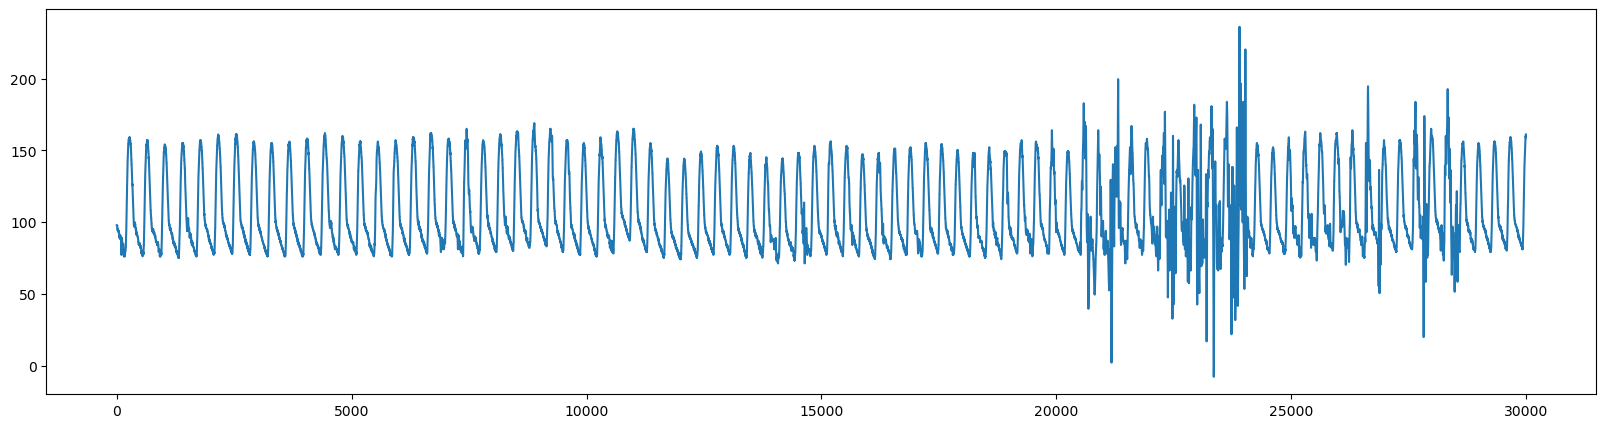


(10704, 10764, 15)
60
(30000, 1)
172.22397


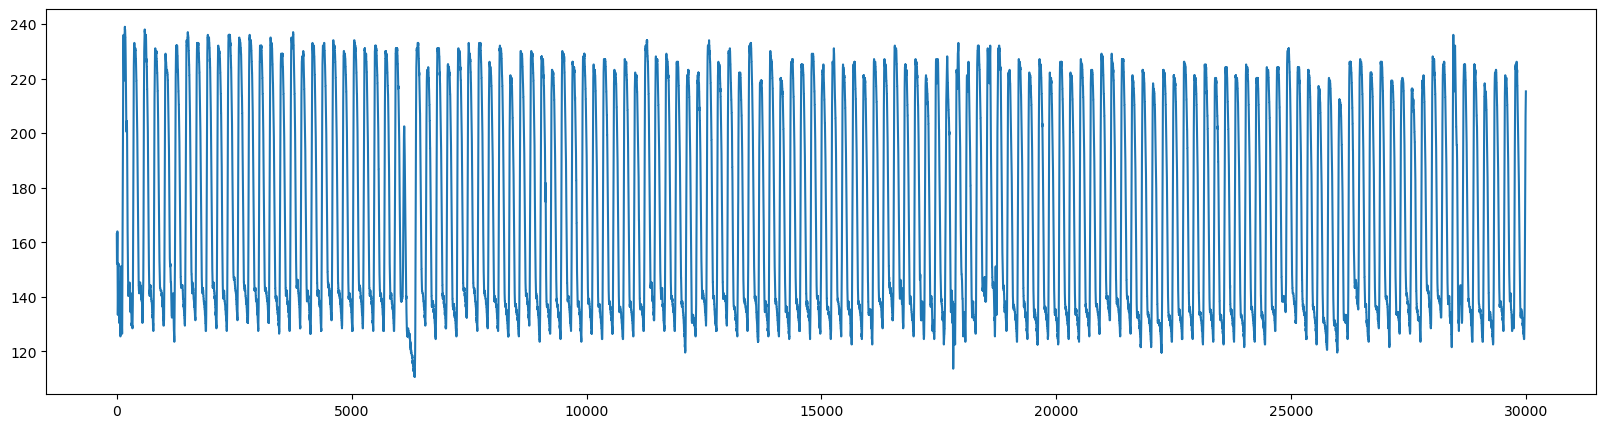

In [134]:
for (x1, x2) in negativeSegmentsMap[1]:
    print((x1, x2, r))
    print(x2 - x1)
    
    abp = tmp_abp_01[x1*500:x2*500]
    print(abp.shape)
    print(np.nanmean(abp))
    
    plt.figure(figsize=(20, 5))
    plt.plot(abp)
    plt.show()
    
    print()

## IOH Event Segments

(1788, 1849)
61
(30500, 1)
64.93988


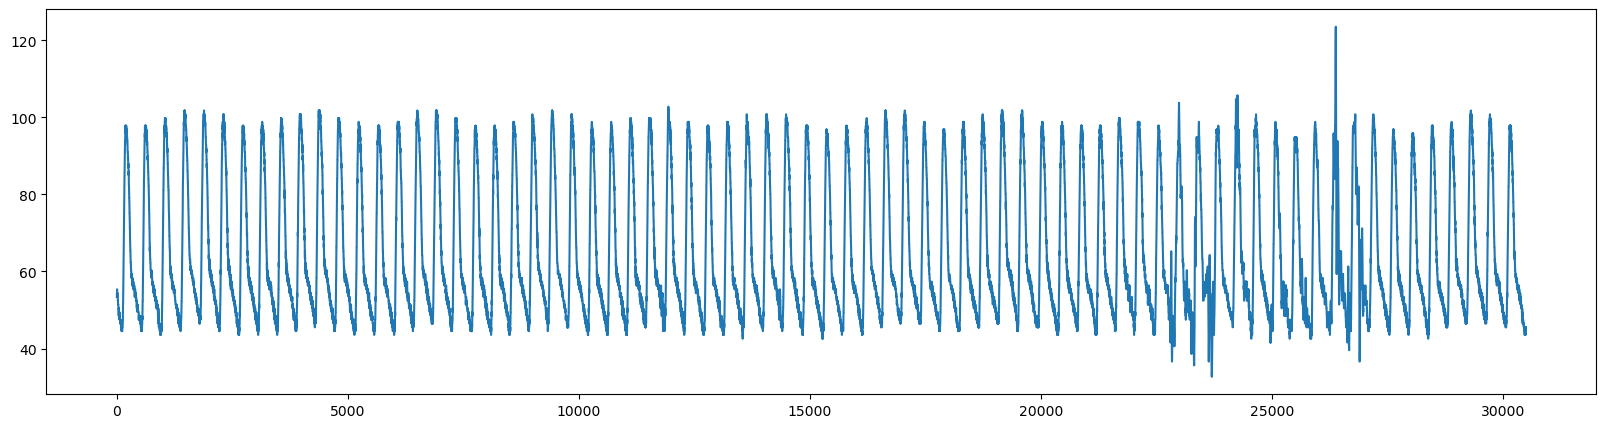


(1850, 2113)
263
(131500, 1)
63.13906


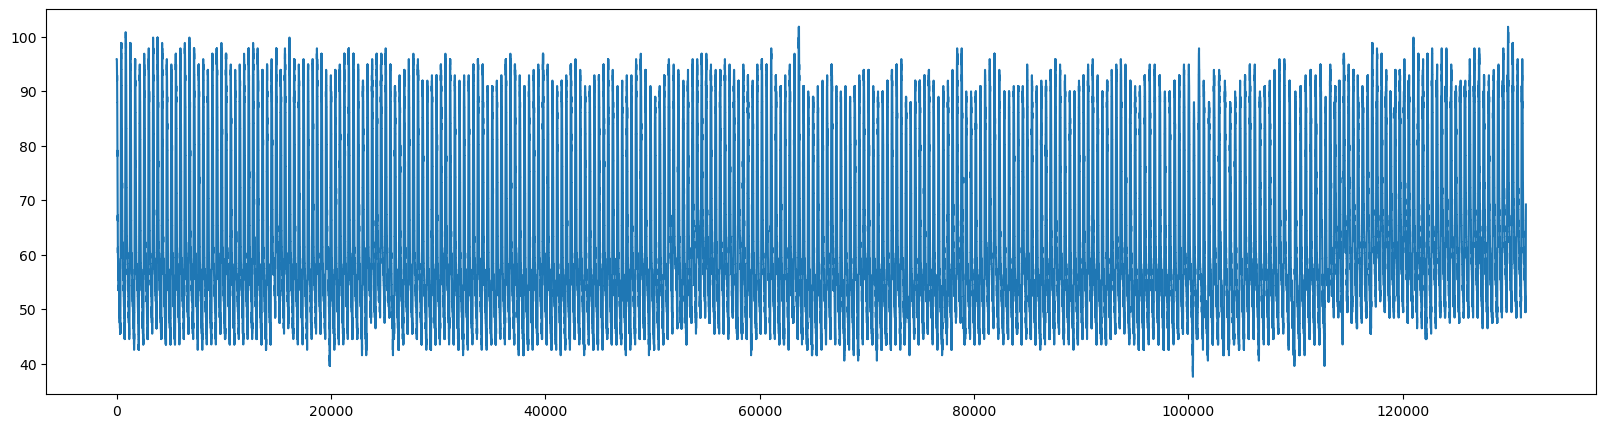


(2314, 2375)
61
(30500, 1)
65.14369


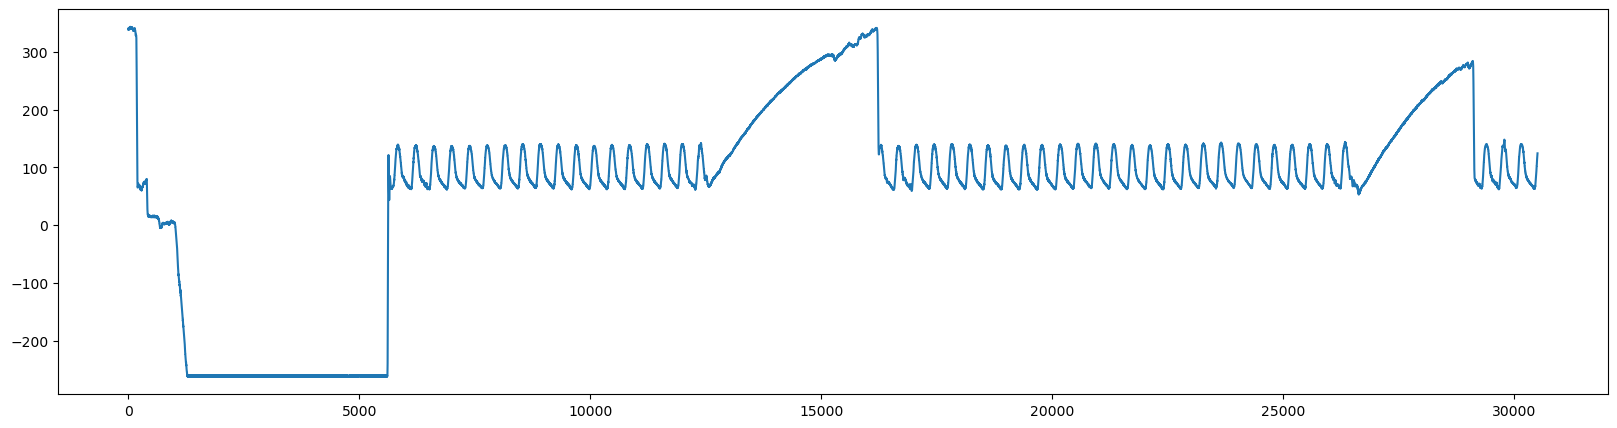


(4113, 4199)
86
(43000, 1)
65.07253


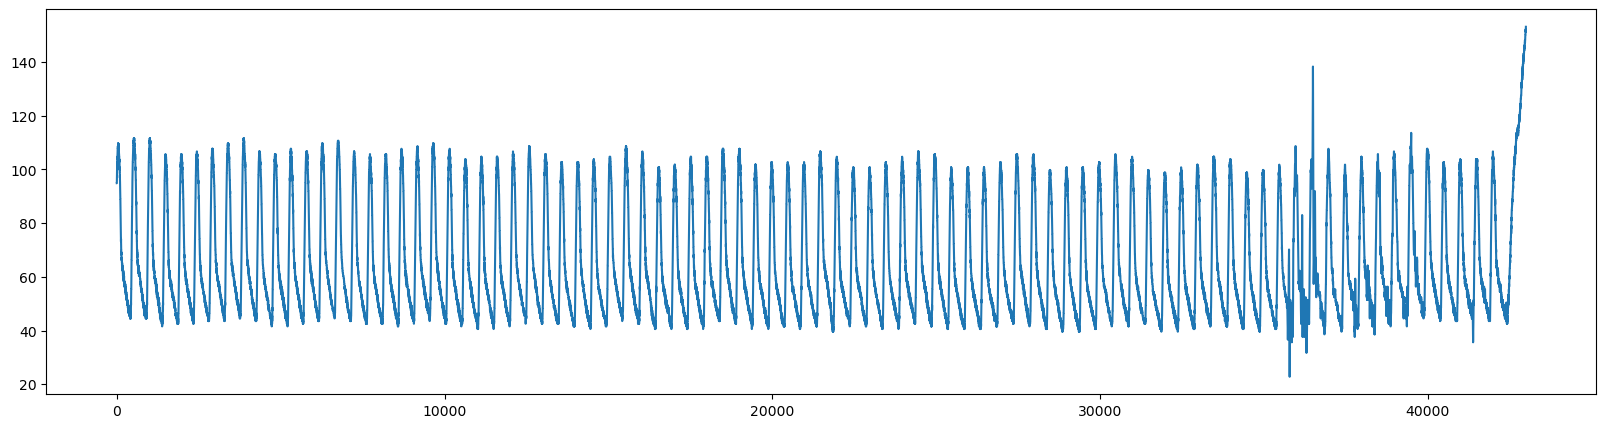


(4261, 5350)
1089
(544500, 1)
60.451027


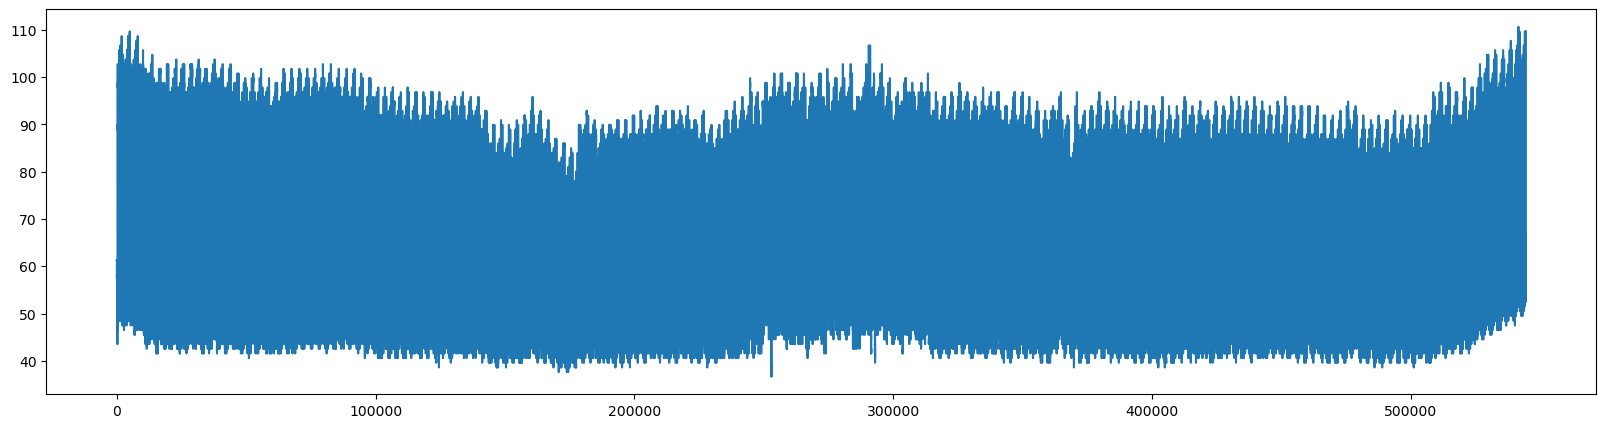


(9096, 9156)
60
(30000, 1)
64.983765


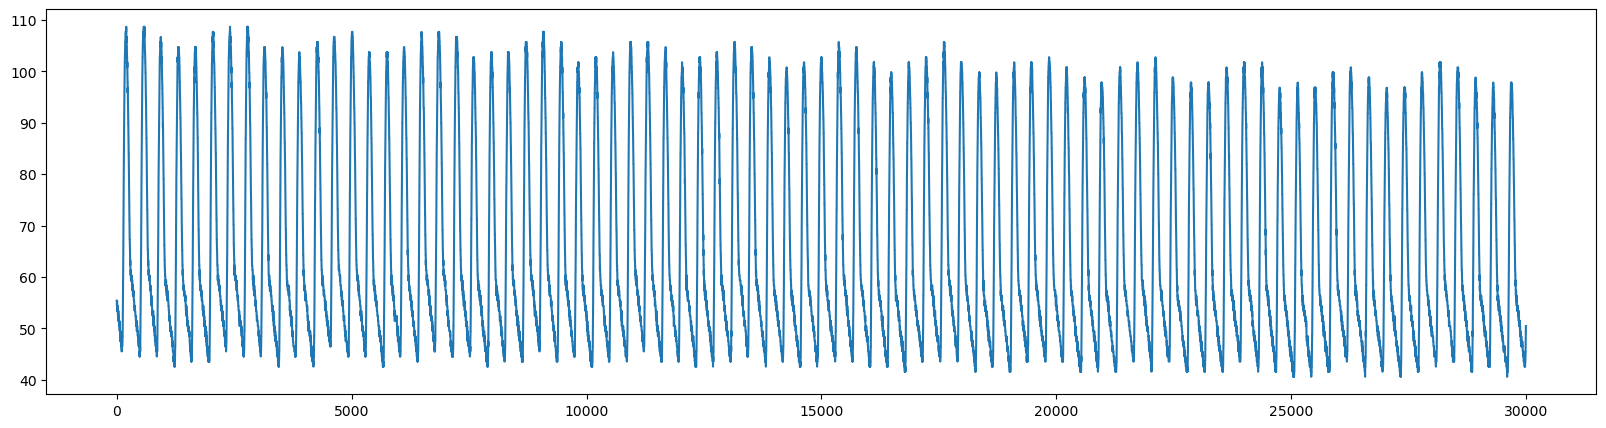


(9157, 9503)
346
(173000, 1)
62.330215


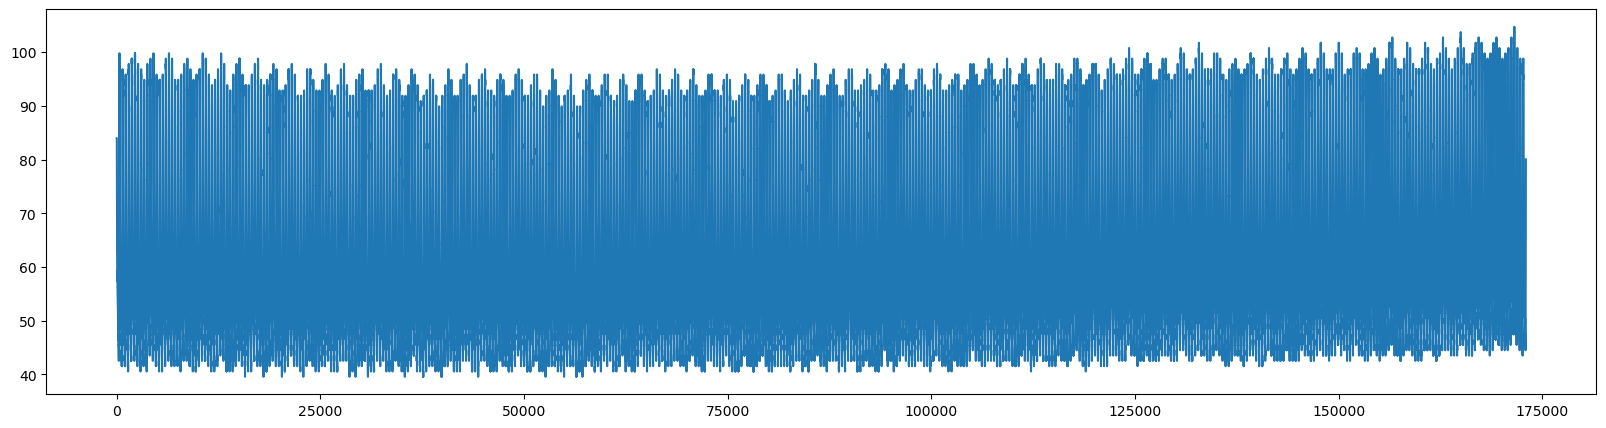

In [135]:
for (x1, x2) in iohEventsMap[1]:
    print((x1, x2))
    print(x2 - x1)
    
    abp = tmp_abp_01[x1*500:x2*500]
    print(abp.shape)
    print(np.nanmean(abp))
    
    plt.figure(figsize=(20, 5))
    plt.plot(abp)
    plt.show()
    
    print()

## Clean Event Segments

(5351, 7151)
1800
(900000, 1)
84.04819


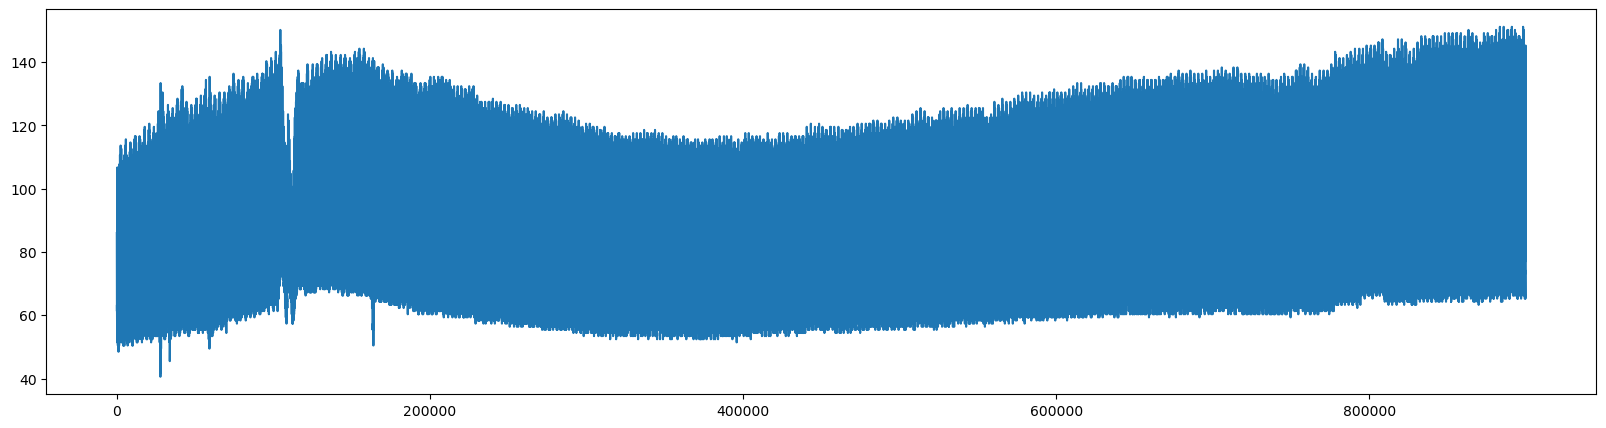


(7152, 8952)
1800
(900000, 1)
99.71124


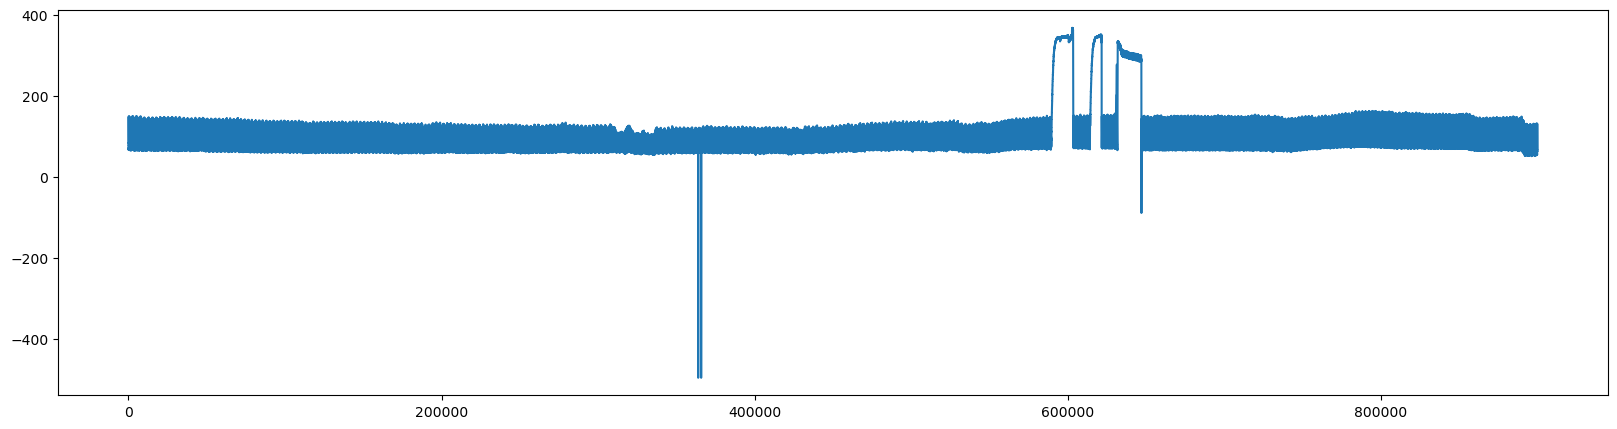


(9504, 11304)
1800
(900000, 1)
83.32017


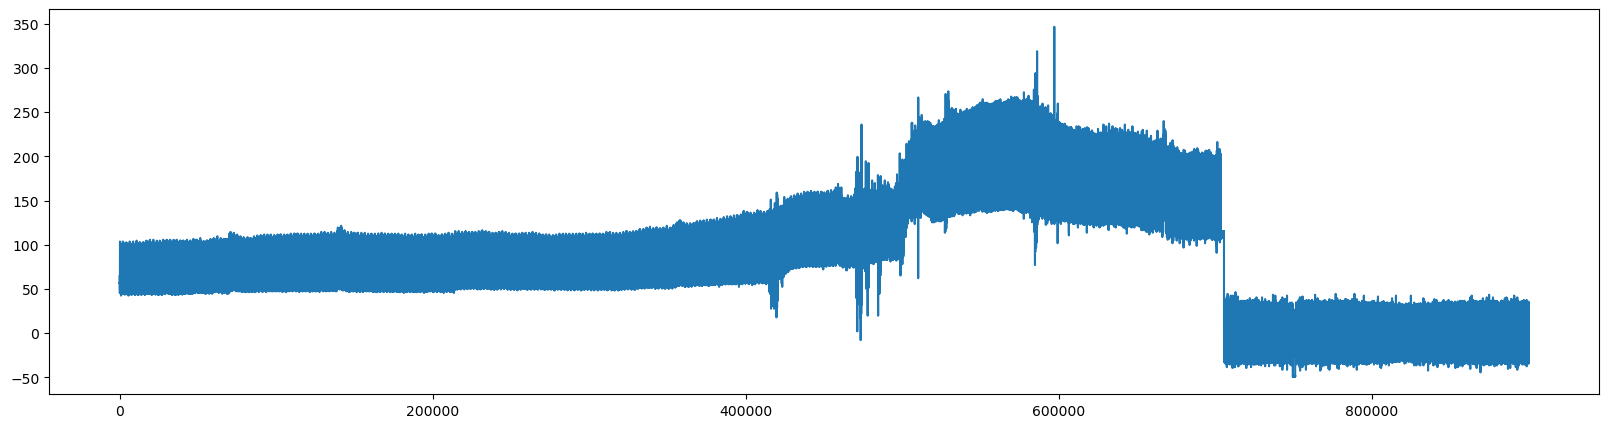

In [136]:
for (x1, x2) in cleanEventsMap[1]:
    print((x1, x2))
    print(x2 - x1)
    
    abp = tmp_abp_01[x1*500:x2*500]
    print(abp.shape)
    print(np.nanmean(abp))
    
    plt.figure(figsize=(20, 5))
    plt.plot(abp)
    plt.show()
    
    print()

# END

In [ ]:
# x_abp, x_ecg, x_eeg, y, valid_mask, case_id_per_segment = \
#     extract_segments(cases_of_interest_idx, min_before_event=3, debug=True)
if PERFORM_DATA_PREPROCESSING:
  if PRELOADING_CASES:
      # determine disk cache file label
      samples = \
          extract_segments(cases_of_interest_idx, min_before_event=PREDICTION_WINDOW, debug=False)
  else:
      samples = extract_segments(cases_of_interest_idx, min_before_event=PREDICTION_WINDOW, debug=False)


from glob import glob
seg_folder = f"{VITAL_EXTRACTED_SEGMENTS}"
filenames = [y for x in os.walk(seg_folder) for y in glob(os.path.join(x[0], '*.vital'))]

def get_segment_attributes_from_filename(file_path):
   pieces = os.path.basename(file_path).split('_')
   case = int(pieces[0])
   startX = int(pieces[1])
   predWindow = int(pieces[2])
   label = pieces[3].replace('.vital', '')
   return (case, startX, predWindow, label)

samples = []
for filename in filenames:
   (case, start_x, pred_window, label) = get_segment_attributes_from_filename(filename)
   

   if pred_window == 0 or pred_window == PREDICTION_WINDOW:
      sample = (filename, label)
      samples.append(sample)

print(f"{len(samples)} samples loaded")

if PRELOADING_SEGMENTS and USE_MEMORY_CACHING:
   for sample in tqdm(samples):
      get_segment_data(sample[0])

In [ ]:
# Split data into training, validation, and test sets
# Use 6:1:3 ratio and prevent samples from a single case from being split across different sets
# Note: number of samples at each time point is not the same, because the first event can occur before the 3/5/10/15 minute mark

# Set target sizes
train_ratio = 0.6
val_ratio = 0.1
test_ratio = 1 - train_ratio - val_ratio # ensure ratios sum to 1

# Split samples into train and other
samples_train, samples_other = train_test_split(samples, test_size=(1 - train_ratio), random_state=RANDOM_SEED)
# Split other into val and test
samples_val, samples_test = train_test_split(samples_other, test_size=(test_ratio / (1 - train_ratio)), random_state=RANDOM_SEED)

# Check how many samples are in each set
print(f"Train samples: {len(samples_train)}, ({len(samples_train) / len(samples):.2%})")
print(f"Val samples: {len(samples_val)}, ({len(samples_val) / len(samples):.2%})")
print(f"Test samples: {len(samples_test)}, ({len(samples_test) / len(samples):.2%})")

In [ ]:
# Create vitalDataset class
class vitalDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        # Get metadata for this event
        segment = self.samples[idx]

        file_path = segment[0]
        label = (segment[1] == "True" or segment[1] == "True.vital")

        (abp, eeg, ecg) = get_segment_data(file_path)

        #print(f"Before ABP: {len(abp)} ECG: {len(ecg)} EEG: {len(eeg)}")
        if len(abp) > 30000:
            abp = abp[:30000]
        elif len(ecg) < 30000:
            #abp = np.lib.pad(abp, (30000), 'constant', constant_values=(0))
            abp = np.resize(abp, (30000))

        if len(ecg) > 30000:
            ecg = ecg[:30000]
        elif len(ecg) < 30000:
            ecg = np.resize(ecg, (30000))
            #ecg = np.lib.pad(ecg, (30000), 'constant', constant_values=(0))

        if len(eeg) > 7680:
            eeg = eeg[:7680]
        elif len(eeg) < 7680:
            eeg = np.resize(eeg, (30000))
            #eeg = np.lib.pad(eeg, (7680), 'constant', constant_values=(0))

        #print(f"ABP: {len(abp)} ECG: {len(ecg)} EEG: {len(eeg)}")

        # print(f"case {idx} label {label} label original {segment[1]}")

        return abp, ecg, eeg, label

In [ ]:
sample = samples[0]
(case, start_x, pred_window, label) = get_segment_attributes_from_filename(sample[0])


(fullAbp, fullEcg, fullEeg) = get_track_data(case)
(sampleAbp, sampleEcg, sampleEeg) = get_segment_data(sample[0])


plt.plot(fullAbp.ravel())
plt.plot(fullEcg.ravel())
plt.plot(fullEeg.ravel())
plt.show()
plt.plot(sampleAbp.ravel())
plt.plot(sampleEcg.ravel())
plt.plot(sampleEeg.ravel())
plt.show()

In [ ]:
train_dataset = vitalDataset(samples_train)
val_dataset = vitalDataset(samples_val)
test_dataset = vitalDataset(samples_test)

BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Classification studies

Check if data can be easily classified using non-deep learning methods. Create a balanced sample of IOH and non-IOH events and use a simple classifier to see if the data can be easily separated. Datasets which can be easily separated by non-deep learning methods should also be easily classified by deep learning models.

In [ ]:
# Select 150 random samples where segment_label is True
positive_samples = samples[samples.segment_label].sample(150, random_state=RANDOM_SEED)
# Select 150 random samples where segment_label is False
negative_samples = samples[~samples.segment_label].sample(150, random_state=RANDOM_SEED)
# Combine the positive and negative samples
samples_balanced = pd.concat([positive_samples, negative_samples])

Define function to build data for study. Each waveform field can be enabled or disabled:

In [ ]:
def get_x_y(samples, use_abp, use_ecg, use_eeg):
    # Create X and y, using data from `samples_balanced` and the `use_abp`, `use_ecg`, and `use_eeg` variables
    X = []
    y = []
    for i in range(len(samples)):
        row = samples.iloc[i]
        sample = np.array([])
        if use_abp:
            if len(row['segment_abp']) != 30000:
                print(len(row['segment_abp']))
            sample = np.append(sample, row['segment_abp'])
        if use_ecg:
            if len(row['segment_ecg']) != 30000:
                print(len(row['segment_ecg']))
            sample = np.append(sample, row['segment_ecg'])
        if use_eeg:
            if len(row['segment_eeg']) != 7680:
                print(len(row['segment_eeg']))
            sample = np.append(sample, row['segment_eeg'])
        X.append(sample)
        # Convert the label from boolean to 0 or 1
        y.append(int(row['segment_label']))
    return X, y

#### KNN

Define KNN run. This is configurable to enable or disable different data channels so that we can study them individually or together:

In [ ]:
def run_knn(samples, use_abp, use_ecg, use_eeg):
    # Get samples
    X,y = get_x_y(samples, use_abp, use_ecg, use_eeg)

    # Split samples into train and val
    knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

    # Normalize the data
    scaler = StandardScaler()
    scaler.fit(knn_X_train)

    knn_X_train = scaler.transform(knn_X_train)
    knn_X_test = scaler.transform(knn_X_test)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=10)

    # Train the KNN classifier
    knn.fit(knn_X_train, knn_y_train)

    # Make predictions on the test set
    knn_y_pred = knn.predict(knn_X_test)

    # Evaluate the KNN classifier
    print(f"ABP: {use_abp}, ECG: {use_ecg}, EEG: {use_eeg}")
    print(f"Confusion matrix:\n{confusion_matrix(knn_y_test, knn_y_pred)}")
    print(f"Classification report:\n{classification_report(knn_y_test, knn_y_pred)}")

Study each waveform independently, then ABP+EEG (which had best results in paper), and ABP+ECG+EEG:

In [ ]:
run_knn(samples_balanced, use_abp=True, use_ecg=False, use_eeg=False)
run_knn(samples_balanced, use_abp=False, use_ecg=True, use_eeg=False)
run_knn(samples_balanced, use_abp=False, use_ecg=False, use_eeg=True)
run_knn(samples_balanced, use_abp=True, use_ecg=False, use_eeg=True)
run_knn(samples_balanced, use_abp=True, use_ecg=True, use_eeg=True)

Based on the data above, the ABP data alone is strongly predictive based on the macro average F1-score of 0.90. The ECG and EEG data are weakly predictive with F1 scores of 0.33 and 0.64, respectively. The ABP+EEG data is also strongly predictive with an F1 score of 0.88, and ABP+ECG+EEG data somewhat predictive with an F1 score of 0.79.

Models based on ABP data alone, or ABP+EEG data are expected to train easily with good performance. The other signals appear to mostly add noise and are not strongly predictive. This agrees with the results from the paper.

#### t-SNE

Define t-SNE run. This is configurable to enable or disable different data channels so that we can study them individually or together:

In [ ]:
def run_tsne(samples, use_abp, use_ecg, use_eeg):
    # Get samples
    X,y = get_x_y(samples, use_abp, use_ecg, use_eeg)
    
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Run t-SNE on the samples
    tsne = TSNE(n_components=len(np.unique(y)), random_state=RANDOM_SEED)
    X_tsne = tsne.fit_transform(X)
    
    # Create a scatter plot of the t-SNE representation
    plt.figure(figsize=(10, 8))
    plt.title(f"use_abp={use_abp}, use_ecg={use_ecg}, use_eeg={use_eeg}")
    for i, label in enumerate(set(y)):
        plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label)
    plt.legend()
    plt.show()

Study each waveform independently, then ABP+EEG (which had best results in paper), and ABP+ECG+EEG:

In [ ]:
run_tsne(samples_balanced, use_abp=True, use_ecg=False, use_eeg=False)
run_tsne(samples_balanced, use_abp=False, use_ecg=True, use_eeg=False)
run_tsne(samples_balanced, use_abp=False, use_ecg=False, use_eeg=True)
run_tsne(samples_balanced, use_abp=True, use_ecg=False, use_eeg=True)
run_tsne(samples_balanced, use_abp=True, use_ecg=True, use_eeg=True)

Based on the plots above, it appears that ABP alone, ABP+EEG and ABP+ECG+EEG are somewhat separable, though with outliers, and should be trainable by our model. The ECG and EEG data are not easily separable from the other data. This agrees with the results from the paper.

##   Model

The model implementation is based on the CNN architecture described in Jo Y-Y et al. (2022). It is designed to handle 1, 2, or 3 signal categories simultaneously, allowing for flexible model configurations based on different combinations of physiological signals:
 * ABP alone
 * EEG alone
 * ECG alone
 * ABP + EEG
 * ABP + ECG
 * EEG + ECG
 * ABP + EEG + ECG

### Model Architecture

The architecture, as depicted in Figure 2 from the original paper, utilizes a ResNet-based approach tailored for time-series data from different physiological signals. The model architecture is adapted to handle varying input signal frequencies, with specific hyperparameters for each signal type, particularly EEG, due to its distinct characteristics compared to ABP and ECG. A diagram of the model architecture is shown below:

![Architecture of the hypotension risk prediction model using multiple waveforms](https://journals.plos.org/plosone/article/figure/image?download&size=large&id=10.1371/journal.pone.0272055.g002)

Each input signal is processed through a sequence of 12 7-layer residual blocks, followed by a flattening process and a linear transformation to produce a 32-dimensional feature vector per signal type. These vectors are then concatenated (if multiple signals are used) and passed through two additional linear layers to produce a single output vector, representing the IOH index. A threshold is determined experimentally in order to minimize the differene between the sensitivity and specificity and is applied to this index to perform binary classification for predicting IOH events.

The hyperparameters for the residual blocks are specified in Supplemental Table 1 from the original paper and vary for different signal type.

A forward pass through the model passes through 85 layers before concatenation, followed by two more linear layers and finally a sigmoid activation layer to produce the prediction measure.

### Residual Block Definition

Each residual block consists of the following seven layers:
 
 * Batch normalization
 * ReLU
 * Dropout (0.5)
 * 1D convolution
 * Batch normalization
 * ReLU
 * 1D convolution

Skip connections are included to aid in gradient flow during training, with optional 1D convolution in the skip connection to align dimensions.

#### Residual Block Hyperparameters

The hyperparameters are detailed in Supplemental Table 1 of the original paper. A screenshot of these hyperparameters is provided for reference below:

![Supplemental Table 1 from original paper](<https://github.com/abarrie2/cs598-dlh-project/blob/main/img/table_1_hyperparameters.png?raw=true>)

**Note**: Please be aware of a transcription error in the original paper's Supplemental Table 1 for the ECG+ABP configuration in Residual Blocks 11 and 12, where the output size should be 469 * 6 instead of the reported 496 * 6.

### Training Objectives

Our model uses binary cross entropy as the loss function and Adam as the optimizer, consistent with the original study. The learning rate is set at 0.0001, and training is configured to run for up to 100 epochs, with early stopping implemented if no improvement in loss is observed over five consecutive epochs.

In [ ]:
# First define the residual block which is reused 12x for each data track for each sample.
# Second define the primary model.
class ResidualBlock(nn.Module):
    def __init__(self, in_features: int, out_features: int, in_channels: int, out_channels: int, kernel_size: int, stride: int = 1, size_down: bool = False, ignoreSkipConnection: bool = False) -> None:
        super(ResidualBlock, self).__init__()
        
        self.ignoreSkipConnection = ignoreSkipConnection

        # calculate the appropriate padding required to ensure expected sequence lengths out of each residual block
        padding = int((((stride-1)*in_features)-stride+kernel_size)/2)

        self.size_down = size_down
        self.bn1 = nn.BatchNorm1d(in_channels)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=False)
        
        self.residualConv = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=False)

        # unclear where in sequence this should take place. Size down expressed in Supplemental table S1
        if self.size_down:
            pool_padding = (1 if (in_features % 2 > 0) else 0)
            self.downsample = nn.MaxPool1d(kernel_size=2, stride=2, padding = pool_padding)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        identity = x
        
        out = self.bn1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.conv1(out)

        if self.size_down:
            out = self.downsample(out)

        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv2(out)
        
        if not self.ignoreSkipConnection:
          if out.shape != identity.shape:
              # run the residual through a convolution when necessary
              identity = self.residualConv(identity)
            
              outlen = np.prod(out.shape)
              idlen = np.prod(identity.shape)
              # downsample when required
              if idlen > outlen:
                  identity = self.downsample(identity)
              # match dimensions
              identity = identity.reshape(out.shape)

          # add the residual       
          out += identity

        return  out

class HypotensionCNN(nn.Module):
    def __init__(self, useAbp: bool = True, useEeg: bool = False, useEcg: bool = False, maxSixResiduals: bool = False, maxOneResiduals: bool = False, ignoreSkipConnection: bool = False) -> None:
        super(HypotensionCNN, self).__init__()

        self.useAbp = useAbp
        self.useEeg = useEeg
        self.useEcg = useEcg
        self.maxSixResiduals = maxSixResiduals
        self.maxOneResiduals= maxOneResiduals


        if useAbp:
            if not self.maxOneResiduals and not self.maxSixResiduals:
              self.abpBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True, ignoreSkipConnection)
              self.abpBlock2 = ResidualBlock(15000, 15000, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.abpBlock3 = ResidualBlock(15000, 7500, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.abpBlock4 = ResidualBlock(7500, 7500, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.abpBlock5 = ResidualBlock(7500, 3750, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.abpBlock6 = ResidualBlock(3750, 3750, 2, 4, 15, 1, False, ignoreSkipConnection)
              self.abpBlock7 = ResidualBlock(3750, 1875, 4, 4, 7, 1, True, ignoreSkipConnection)
              self.abpBlock8 = ResidualBlock(1875, 1875, 4, 4, 7, 1, False, ignoreSkipConnection)
              self.abpBlock9 = ResidualBlock(1875, 938, 4, 4, 7, 1, True, ignoreSkipConnection)
              self.abpBlock10 = ResidualBlock(938, 938, 4, 4, 7, 1, False, ignoreSkipConnection)
              self.abpBlock11 = ResidualBlock(938, 469, 4, 6, 7, 1, True, ignoreSkipConnection)
              self.abpBlock12 = ResidualBlock(469, 469, 6, 6, 7, 1, False, ignoreSkipConnection)
              self.abpFc = nn.Linear(6*469, 32)
            elif self.maxOneResiduals:
              self.abpBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True, ignoreSkipConnection)
              self.abpFc = nn.Linear(2 * 15000, 32)
            elif self.maxSixResiduals:
              self.abpBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True, ignoreSkipConnection)
              self.abpBlock2 = ResidualBlock(15000, 15000, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.abpBlock3 = ResidualBlock(15000, 7500, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.abpBlock4 = ResidualBlock(7500, 7500, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.abpBlock5 = ResidualBlock(7500, 3750, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.abpBlock6 = ResidualBlock(3750, 3750, 2, 4, 15, 1, False, ignoreSkipConnection)
              self.abpFc = nn.Linear(4 * 3750, 32)
              
            
        
        if useEcg:
            if not self.maxOneResiduals and not self.maxSixResiduals:
              self.ecgBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgBlock2 = ResidualBlock(15000, 15000, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.ecgBlock3 = ResidualBlock(15000, 7500, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgBlock4 = ResidualBlock(7500, 7500, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.ecgBlock5 = ResidualBlock(7500, 3750, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgBlock6 = ResidualBlock(3750, 3750, 2, 4, 15, 1, False, ignoreSkipConnection)
              self.ecgBlock7 = ResidualBlock(3750, 1875, 4, 4, 7, 1, True, ignoreSkipConnection)
              self.ecgBlock8 = ResidualBlock(1875, 1875, 4, 4, 7, 1, False, ignoreSkipConnection)
              self.ecgBlock9 = ResidualBlock(1875, 938, 4, 4, 7, 1, True, ignoreSkipConnection)
              self.ecgBlock10 = ResidualBlock(938, 938, 4, 4, 7, 1, False, ignoreSkipConnection)
              self.ecgBlock11 = ResidualBlock(938, 469, 4, 6, 7, 1, True, ignoreSkipConnection)
              self.ecgBlock12 = ResidualBlock(469, 469, 6, 6, 7, 1, False, ignoreSkipConnection)
              self.ecgFc = nn.Linear(6 * 469, 32)
            elif self.maxOneResiduals:
              self.ecgBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgFc = nn.Linear(2 * 15000, 32)
            elif self.maxSixResiduals:
              self.ecgBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgBlock2 = ResidualBlock(15000, 15000, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.ecgBlock3 = ResidualBlock(15000, 7500, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgBlock4 = ResidualBlock(7500, 7500, 2, 2, 15, 1, False, ignoreSkipConnection)
              self.ecgBlock5 = ResidualBlock(7500, 3750, 2, 2, 15, 1, True, ignoreSkipConnection)
              self.ecgBlock6 = ResidualBlock(3750, 3750, 2, 4, 15, 1, False, ignoreSkipConnection)
              self.ecgFc = nn.Linear(4 * 3750, 32)

        
        if useEeg:
          if not self.maxOneResiduals and not self.maxSixResiduals:
            self.eegBlock1 = ResidualBlock(7680, 3840, 1, 2, 7, 1, True, ignoreSkipConnection)
            self.eegBlock2 = ResidualBlock(3840, 3840, 2, 2, 7, 1, False, ignoreSkipConnection)
            self.eegBlock3 = ResidualBlock(3840, 1920, 2, 2, 7, 1, True, ignoreSkipConnection)
            self.eegBlock4 = ResidualBlock(1920, 1920, 2, 2, 7, 1, False, ignoreSkipConnection)
            self.eegBlock5 = ResidualBlock(1920, 960, 2, 2, 7, 1, True, ignoreSkipConnection)
            self.eegBlock6 = ResidualBlock(960, 960, 2, 4, 7, 1, False, ignoreSkipConnection)
            self.eegBlock7 = ResidualBlock(960, 480, 4, 4, 3, 1, True, ignoreSkipConnection)
            self.eegBlock8 = ResidualBlock(480, 480, 4, 4, 3, 1, False, ignoreSkipConnection)
            self.eegBlock9 = ResidualBlock(480, 240, 4, 4, 3, 1, True, ignoreSkipConnection)
            self.eegBlock10 = ResidualBlock(240, 240, 4, 4, 3, 1, False, ignoreSkipConnection)
            self.eegBlock11 = ResidualBlock(240, 120, 4, 6, 3, 1, True, ignoreSkipConnection)
            self.eegBlock12 = ResidualBlock(120, 120, 6, 6, 3, 1, False, ignoreSkipConnection)
            self.eegFc = nn.Linear(6 * 120, 32)
          elif self.maxOneResiduals:
            self.eegBlock1 = ResidualBlock(7680, 3840, 1, 2, 7, 1, True, ignoreSkipConnection)
            self.eegFc = nn.Linear(2 * 3840, 32)
          elif self.maxSixResiduals:
            self.eegBlock1 = ResidualBlock(7680, 3840, 1, 2, 7, 1, True, ignoreSkipConnection)
            self.eegBlock2 = ResidualBlock(3840, 3840, 2, 2, 7, 1, False, ignoreSkipConnection)
            self.eegBlock3 = ResidualBlock(3840, 1920, 2, 2, 7, 1, True, ignoreSkipConnection)
            self.eegBlock4 = ResidualBlock(1920, 1920, 2, 2, 7, 1, False, ignoreSkipConnection)
            self.eegBlock5 = ResidualBlock(1920, 960, 2, 2, 7, 1, True, ignoreSkipConnection)
            self.eegBlock6 = ResidualBlock(960, 960, 2, 4, 7, 1, False, ignoreSkipConnection)
            self.eegFc = nn.Linear(4 * 960, 32)


        concatSize = 0
        if useAbp:
            concatSize += 32
        if useEeg:
            concatSize += 32
        if useEcg:
            concatSize += 32

        self.fullLinear1 = nn.Linear(concatSize, 16)
        self.fullLinear2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, abp: torch.Tensor, eeg: torch.Tensor, ecg: torch.Tensor) -> torch.Tensor:

        batchSize = len(abp)

        # conditionally operate ABP, EEG, and ECG networks
        if self.useAbp:
            if self.maxOneResiduals:
              abp = self.abpBlock1(abp)
              totalLen = np.prod(abp.shape)
              abp = torch.reshape(abp, (batchSize, int(totalLen / batchSize)))
              abp = self.abpFc(abp)
            elif self.maxSixResiduals:
              abp = self.abpBlock1(abp)
              abp = self.abpBlock2(abp)
              abp = self.abpBlock3(abp)
              abp = self.abpBlock4(abp)
              abp = self.abpBlock5(abp)
              abp = self.abpBlock6(abp)
              totalLen = np.prod(abp.shape)
              abp = torch.reshape(abp, (batchSize, int(totalLen / batchSize)))
              abp = self.abpFc(abp)
            elif not self.maxOneResiduals and not self.maxSixResiduals:
              abp = self.abpBlock1(abp)
              abp = self.abpBlock2(abp)
              abp = self.abpBlock3(abp)
              abp = self.abpBlock4(abp)
              abp = self.abpBlock5(abp)
              abp = self.abpBlock6(abp)
              abp = self.abpBlock7(abp)
              abp = self.abpBlock8(abp)
              abp = self.abpBlock9(abp)
              abp = self.abpBlock10(abp)
              abp = self.abpBlock11(abp)
              abp = self.abpBlock12(abp)
              totalLen = np.prod(abp.shape)
              abp = torch.reshape(abp, (batchSize, int(totalLen / batchSize)))
              abp = self.abpFc(abp)

        if self.useEeg:
            if self.maxOneResiduals:
              eeg = self.eegBlock1(eeg)
            elif self.maxSixResiduals:
              eeg = self.eegBlock1(eeg)
              eeg = self.eegBlock2(eeg)
              eeg = self.eegBlock3(eeg)
              eeg = self.eegBlock4(eeg)
              eeg = self.eegBlock5(eeg)
              eeg = self.eegBlock6(eeg)
            elif not self.maxOneResiduals and not self.maxSixResiduals:
              eeg = self.eegBlock1(eeg)
              eeg = self.eegBlock2(eeg)
              eeg = self.eegBlock3(eeg)
              eeg = self.eegBlock4(eeg)
              eeg = self.eegBlock5(eeg)
              eeg = self.eegBlock6(eeg)
              eeg = self.eegBlock7(eeg)
              eeg = self.eegBlock8(eeg)
              eeg = self.eegBlock9(eeg)
              eeg = self.eegBlock10(eeg)
              eeg = self.eegBlock11(eeg)
              eeg = self.eegBlock12(eeg)
            
            totalLen = np.prod(eeg.shape)
            eeg = torch.reshape(eeg, (batchSize, int(totalLen / batchSize)))
            eeg = self.eegFc(eeg)
        
        if self.useEcg:
            if self.maxOneResiduals:
              ecg = self.ecgBlock1(ecg)
            elif self.maxSixResiduals:
              ecg = self.ecgBlock1(ecg)
              ecg = self.ecgBlock2(ecg)
              ecg = self.ecgBlock3(ecg)
              ecg = self.ecgBlock4(ecg)
              ecg = self.ecgBlock5(ecg)
              ecg = self.ecgBlock6(ecg)
            elif not self.maxOneResiduals and not self.maxSixResiduals:
              ecg = self.ecgBlock1(ecg)
              ecg = self.ecgBlock2(ecg)
              ecg = self.ecgBlock3(ecg)
              ecg = self.ecgBlock4(ecg)
              ecg = self.ecgBlock5(ecg)
              ecg = self.ecgBlock6(ecg)
              ecg = self.ecgBlock7(ecg)
              ecg = self.ecgBlock8(ecg)
              ecg = self.ecgBlock9(ecg)
              ecg = self.ecgBlock10(ecg)
              ecg = self.ecgBlock11(ecg)
              ecg = self.ecgBlock12(ecg)

            totalLen = np.prod(ecg.shape)
            ecg = torch.reshape(ecg, (batchSize, int(totalLen / batchSize)))
            ecg = self.ecgFc(ecg)
        
        # concatenation
        merged = None
        if self.useAbp and self.useEeg and self.useEcg:
            merged = torch.cat((abp, eeg, ecg), dim=1)
        elif self.useAbp and self.useEeg:
            merged = torch.cat((abp, eeg), dim=1)
        elif self.useAbp and self.useEcg:
            merged = torch.cat((abp, ecg), dim=1)
        elif self.useEeg and self.useEcg:
            merged = torch.cat((eeg, ecg), dim=1)
        elif self.useAbp:
            merged = abp
        elif self.useEeg:
            merged = eeg
        elif self.useEcg:
            merged = ecg

        totalLen = np.prod(merged.shape)
        merged = torch.reshape(merged, (batchSize, int(totalLen / batchSize)))
        out = self.fullLinear1(merged)
        out = self.fullLinear2(out)
        out = self.sigmoid(out)

        out = torch.nan_to_num(out)
        return out

### Training

As discussed earlier, our model uses binary cross entropy as the loss function and Adam as the optimizer, consistent with the original study. The learning rate is set at 0.0001, and training is configured to run for up to 100 epochs, with early stopping implemented if no improvement in loss is observed over five consecutive epochs.

In [ ]:
useAbp = True
useEeg = True
useEcg = False
# enable only a single ablation
useAblationSixResidualBlocks = False
useAblationOneResidualBlocks = False
useAblationIgnoreSkipConnection = False

# to be composed by checking config booleans
experimentName = "DEFAULT"

# enforce single ablation
if useAblationSixResidualBlocks and useAblationOneResidualBlocks and useAblationIgnoreSkipConnection:
   # if all 3 selected, only choose one residual block
   useAblationSixResidualBlocks = False
   useAblationIgnoreSkipConnection = False
elif useAblationSixResidualBlocks and useAblationOneResidualBlocks:
   # if 6 and 1, only choose 1
   useAblationSixResidualBlocks = False
elif useAblationSixResidualBlocks and useAblationIgnoreSkipConnection:
   # if six and skip, only choose six
   useAblationIgnoreSkipConnection = False
elif useAblationOneResidualBlocks and useAblationIgnoreSkipConnection:
   # if one and skip, only choose six
   useAblationIgnoreSkipConnection = False

if useAbp and useEeg and useEcg:
    experimentName = "ABP_EEG_ECG"
elif useAbp and useEeg:
    experimentName = "ABP_EEG"
elif useAbp and useEcg:
    experimentName = "ABP_ECG"
elif useEeg and useEcg:
    experimentName = "EEG_ECG"
elif useAbp:
    experimentName = "ABP"
elif useEeg:
    experimentName = "EEG"
elif useEcg:
    experimentName = "ECG"

if useAblationSixResidualBlocks:
  experimentName = f"{experimentName}_ABLATION_SIX_RESIDUAL_BLOCKS"
if useAblationOneResidualBlocks:
  experimentName = f"{experimentName}_ABLATION_ONE_RESIDUAL_BLOCK"
if useAblationIgnoreSkipConnection:
  experimentName = f"{experimentName}_ABLATION_IGNORE_SKIP_CONNECTION"

experimentName = f"{experimentName}_{PREDICTION_WINDOW}_MINS"

if MAX_CASES is not None:
   experimentName = f"{experimentName}_MAX_{MAX_CASES}_CASES"

print(f"Preparing to run experiment titled {experimentName}")

model = HypotensionCNN(useAbp, useEeg, useEcg, useAblationSixResidualBlocks, useAblationOneResidualBlocks, useAblationIgnoreSkipConnection)
loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if (torch.backends.mps.is_available() and torch.backends.mps.is_built()) else "cpu")
print(f"Using device: {device}")
model = model.to(device)

def train_model_one_iter(model, loss_func, optimizer, train_loader):
  model.train()
  train_losses = []
  for abp, ecg, eeg, label in tqdm(train_loader):
    batch = len(abp)
    
    abp = torch.nan_to_num(abp.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
    ecg = torch.nan_to_num(ecg.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
    eeg = torch.nan_to_num(eeg.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
    label = label.type(torch.float).reshape(batch, 1).to(device)

    optimizer.zero_grad()
    mdl = model(abp, eeg, ecg)
    loss = loss_func(torch.nan_to_num(mdl), label)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.cpu().data.numpy())
  return np.mean(train_losses)

def evaluate_model(model, loss_func, val_loader):
  model.eval()
  val_losses = []
  for abp, ecg, eeg, label in tqdm(val_loader):
    batch = len(abp)
    
    abp = torch.nan_to_num(abp.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
    ecg = torch.nan_to_num(ecg.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
    eeg = torch.nan_to_num(eeg.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
    label = label.type(torch.float).reshape(batch, 1).to(device)
   
    mdl = model(abp, eeg, ecg)
    loss = loss_func(torch.nan_to_num(mdl), label)
    val_losses.append(loss.cpu().data.numpy())
  return np.mean(val_losses)


# Training loop
max_epochs = 100
best_epoch = 0
train_losses = []
val_losses = []
best_loss = float('inf')
patience = 5
no_improve_epochs = 0
model_path = os.path.join(VITAL_MODELS, f"{experimentName}.model")

for i in range(max_epochs):
  # Train the model and get the training loss
  train_loss = train_model_one_iter(model, loss_func, optimizer, train_loader)
  train_losses.append(train_loss)
  # Calculate validate loss
  val_loss = evaluate_model(model, loss_func, val_loader)
  val_losses.append(val_loss)
  print(f"[{datetime.now()}] Completed epoch {i} with training loss {train_loss:.8f}, validation loss {val_loss:.8f}")

  # Check if validation loss has improved
  if val_loss < best_loss:
    best_epoch = i
    best_loss = val_loss
    no_improve_epochs = 0
    torch.save(model.state_dict(), model_path)
    print(f"Validation loss improved to {val_loss:.8f}. Model saved.")
  else:
    no_improve_epochs += 1
    print(f"No improvement in validation loss. {no_improve_epochs} epochs without improvement.")

  # exit early if no improvement in loss over last 'patience' epochs
  if no_improve_epochs >= patience:
    print("Early stopping due to no improvement in validation loss.")
    break

# Load best model from disk
if os.path.exists(model_path):
  model.load_state_dict(torch.load(model_path))
  print(f"Loaded best model from disk from epoch {best_epoch}.")
else:
  print("No saved model found for f{experimentName}.")

model.train(False)

Plot the training and validation losses after each epoch:

In [ ]:
# Create x-axis values for epochs
epochs = range(0, len(train_losses))

# Plot the training and validation losses
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')

# Add a vertical bar at the best_epoch
plt.axvline(x=best_epoch, color='g', linestyle='--', label='Best Epoch')

# Shade everything to the right of the best_epoch a light red
plt.axvspan(best_epoch, max(epochs), facecolor='r', alpha=0.1)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
def eval_model(model, dataloader):
    model.eval()
    model = model.to(device)
    total_loss = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for abp, ecg, eeg, label in tqdm(dataloader):
            batch = len(abp)
    
            abp = torch.nan_to_num(abp.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
            ecg = torch.nan_to_num(ecg.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
            eeg = torch.nan_to_num(eeg.reshape(batch, 1, -1)).type(torch.FloatTensor).to(device)
            label = label.type(torch.float).reshape(batch, 1).to(device)
   
            pred = model(abp, eeg, ecg)
            loss = loss_func(pred, label)
            total_loss += loss.item()

            all_predictions.append(pred.detach().cpu().numpy())
            all_labels.append(label.detach().cpu().numpy())

    # Flatten the lists
    all_predictions = np.concatenate(all_predictions).flatten()
    all_labels = np.concatenate(all_labels).flatten()

    # Calculate AUROC and AUPRC
    auroc = roc_auc_score(all_labels, all_predictions)
    precision, recall, _ = precision_recall_curve(all_labels, all_predictions)
    auprc = auc(recall, precision)

    # Determine the optimal threshold, which is argmin(abs(sensitivity - specificity)) per the paper
    thresholds = np.linspace(0, 1, 101) # 0 to 1 in 0.01 steps
    min_diff = float('inf')
    optimal_sensitivity = None
    optimal_specificity = None
    optimal_threshold = None

    for threshold in thresholds:
        all_predictions_binary = (all_predictions > threshold).astype(int)

        tn, fp, fn, tp = confusion_matrix(all_labels, all_predictions_binary).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        diff = abs(sensitivity - specificity)

        if diff < min_diff:
            min_diff = diff
            optimal_threshold = threshold
            optimal_sensitivity = sensitivity
            optimal_specificity = specificity

    avg_loss = total_loss / len(dataloader)
    return all_predictions, all_labels, avg_loss, auroc, auprc, optimal_sensitivity, optimal_specificity, optimal_threshold

# validation loop
valid_predictions, valid_labels, valid_loss, valid_auroc, valid_auprc, valid_sensitivity, valid_specificity, valid_threshold = eval_model(model, val_loader)

# test loop
test_predictions, test_labels, test_loss, test_auroc, test_auprc, test_sensitivity, test_specificity, test_threshold = eval_model(model, test_loader)

print(f"Validation predictions: {valid_predictions}")
print(f"Validation labels: {valid_labels}")
print(f"Validation loss: {valid_loss}")
print(f"Validation AUROC: {valid_auroc}")
print(f"Validation AUPRC: {valid_auprc}")
print(f"Validation Sensitivity: {valid_sensitivity}")
print(f"Validation Specificity: {valid_specificity}")
print(f"Validation Threshold: {valid_threshold}")
print()
print(f"Test predictions: {test_predictions}")
print(f"Test labels: {test_labels}")
print(f"Test loss: {test_loss}")
print(f"Test AUROC: {test_auroc}")
print(f"Test AUPRC: {test_auprc}")
print(f"Test Sensitivity: {test_sensitivity}")
print(f"Test Specificity: {test_specificity}")
print(f"Test Threshold: {test_threshold}")

# Results (Planned results for Draft submission)

When we complete our experiments, we will build comparison tables that compare a set of measures for each experiment performed. The full set of experiments and measures are listed below.

## Results from Final Rubrik
 * Table of results (no need to include additional experiments, but main reproducibility result should be included)
 * All claims should be supported by experiment results
 * Discuss with respect to the hypothesis and results from the original paper
 * Experiments beyond the original paper
   * Each experiment should include results and a discussion
 * Ablation Study.


## Experiments

 * ABP only
 * ECG only
 * EEG only
 * ABP + ECG
 * ABP + EEG
 * ECG + EEG
 * ABP + ECG + EEG

Note: each experiment will be repeated with the following time-to-IOH-event durations:
 * 3 minutes
 * 5 minutes
 * 10 minutes
 * 15 minutes

Note: the above list of experiments will be performed if there is sufficient time and gpu capability to complete that before the submission deadline. Should we experience any constraints on this front, we will reduce our experimental coverage to the following 4 core experiments that are necessary to measure the hypotheses included at the head of this report:
 * ABP only @ 3 minutes
 * ABP + ECG @ 3 minutes
 * ABP + EEG @ 3 minutes
 * ABP + ECG + EEG @ 3 minutes

For additional details please review the "Planned Actions" in the Discussion section of this report.

## Measures

 * AUROC
 * AUPRC
 * Sensitivity
 * Specificity
 * Threshold
 * Loss Shrinkage

[ TODO for final report - collect data for all measures listed above. ]

[ TODO for final report - generate ROC and PRC plots for each experiment ]

We are collecting a broad set of measures across each experiment in order to perform a comprehensive comparison of all measures listed across all comparable experiments executed in the original paper. However, our key experimental results will be focused on a subset of these results that address the main experiments defined at the beginning of this notebook.

The key experimental result measures will be as follows:

* For 3 minutes ahead of the predicted IOH event:
  * compare AUROC and AUPRC for ABP only vs ABP+ECG
  * compare AUROC and AUPRC for ABP only vs ABP+EEG
  * compare AUROC and AUPRC for ABP only vs ABP+ECG+EEG


## Model comparison

The following table is Table 3 from the original paper which presents the measured values for each signal combination across each of the four temporal predictive categories:

![Area under the Receiver-operating Characteristic Curve, Area under the Precision-Recall Curve, Sensitivity, and Specificity of the model in predicting intraoperative hypotension](https://journals.plos.org/plosone/article/figure/image?download&size=large&id=10.1371/journal.pone.0272055.t003)

We have not yet completed the execution of the experiments necessary to determine our reproduced model performance in order determine whether our results are accurately representing those of the original paper. These details are expected to be included in the final report.

As of the draft submission, the reported evaluation measures of our model are too good to be true (all measures are 1.0). We suspect that there is data leakage in the dataset splitting process and will address this in time for the final report.

# Discussion

## Discussion (10) FROM FINAL RUBRIK
 * Implications of the experimental results, whether the original paper was reproducible, and if it wasn’t, what factors made it irreproducible
 * “What was easy”
 * “What was difficult”
 * Recommendations to the original authors or others who work in this area for improving reproducibility
 * (specific to our group) "I have communicated with Maciej during OH. The draft looks good and I would expect some explanations/analysis on the final report on why you get 1.0 as AUROC."
   * discuss our bug where we were believing we were sampling dozens of different patient samples but were just training the model on the same segments extracted from the same patient sample over and over. so we were massively overfitting our training data for one patient's data, then unwittingly using the same patient data for validation and testing, thus getting perfect classification during inference.


### Feasibility of reproduction
Our assessment is that this paper will be reproducible. The outstanding risk is that each experiment can take up to 7 hours to run on hardware within the team (i.e., 7h to run ~70 epochs on a desktop with AMD Ryzen 7 3800X 8-core CPU w/ RTX 2070 SUPER GPU and 32GB RAM). There are a total of 28 experiments (7 different combinations of signal inputs, 4 different time horizons for each combination). Should our team find it not possible to complete the necessary experiments across all of the experiments represented in Table 3 of our selected paper, we will reduce the number of experiments to focus solely on the ones directly related to our hypotheses described in the beginning of this notebook (i.e., reduce the number of combinations of interest to 4: ABP alone, ABP+EEG, ABP+ECG, ABP+ECG+EEG). This will result in a new total of 16 experiments to run.

### Planned ablations
Our proposal included a collection of potential ablations to be investigated:

* Remove ResNet skip connection
* Reduce # of residual blocks from 12 to 6
* Reduce # of residual blocks from 12 to 1
* Eliminate dropout from residual block
* Max pooling configuration
  * smaller size/stride
  * eliminate max pooling

Given the amount of time required to conduct each experiment, our team intends to choose only a small number of ablations from this set. Further, we only intend to perform ablation analysis against the best performing signal combination and time horizon from the reproduction experiments. In order words, we intend to perform ablation analysis against the following training combinations, and only against the models trained with data measured 3 minutes prior to an IOH event:
  * ABP alone
  * ABP + ECG
  * ABP + EEG
  * ABP + ECG + EEG

Time and GPU resource permitting, we will complete a broader range of experiments. For additional details, please see the section below titled "Plans for next phase".

### Nature of reproduced results
Our team intends to address the manner in which the experimental results align with the published results in the paper in the final submission of this report. The amount of time required to complete model training and result analysis during the preparation of the Draft notebook was not sufficient to complete a large number of experiments.

### What was easy? What was difficult?
The difficult aspect of the preparation of this draft involved the data preprocessing.
 * First, the source data is unlabelled, so our team was responsible for implementing analysis methods for identifying positive (IOH event occurred) and negative (IOH event did not occur) by running a lookahead analysis of our input training set.
 * Second, the volume of raw data is in excess of 90GB. A non-trivial amount of compute was required to minify the input data to only include the data tracks of interest to our experiments (i.e., ABP, ECG, and EEG tracks).
 * Third, our team found it difficult to trace back to the definition of the jSQI signal quality index referenced in the paper. Multiple references through multiple papers needed to be traversed to understand which variant of the quality index 
   * The only available source code related to the signal quality index as referenced by our paper in [5]. Source code was not directly linked from the paper, but the GitHub repository for the corresponding author for reference [5] did result in the identification of MATLAB source code for the signal quality index as described in the referenced paper. That code is available here: https://github.com/cliffordlab/PhysioNet-Cardiovascular-Signal-Toolbox/tree/master/Tools/BP_Tools
   * Our team had insufficient time to port this signal quality index to Python for use in our investigation, or to setup a MATLAB environment in which to assess our source data using the above MATLAB functions, but we expect to complete this as part of our final report.

### Suggestions to paper author
The most notable suggestion would be to correct the hyperparameters published in Supplemental Table 1. Specifically, the output size for residual blocks 11 and 12 for the ECG and ABP data sets was 496x6. This is a typo, and should read 469x6. This typo became apparent when operating the size down operation within Residual Block 11 and recognizing the tensor dimensions were misaligned.

Additionally, more explicit references to the signal quality index assessment tools should be added. Our team could not find a reference to the MATLAB source code as described in reference [3], and had to manually discover the GitHub profile for the lab of the corresponding author of reference [3] in order to find MATLAB source that corresponded to the metrics described therein.

### Plans for next phase
Our team plans to accomplish the following goals in service of preparing the Final Report:
 * Implement the jSQI filter to remove any training data with aberrent signal quality per the threshold defined in our original paper.
 * Execute the following experiments:
   * Measure predictive quality of the model trained solely with ABP data at 3 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ABP+ECG data at 3 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ABP+EEG data at 3 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ABP+ECG+EEG data at 3 minutes prior to IOH events.
 * Gather our measures for these experiments and perform a comparison against the published results from our selected paper and determine whether or not we are succesfully reproducing the results outlined in the paper.
 * Ablation analysis:
   * Execute the following ablation experiments:
     * Repeat the four experiments described above while reducing the numnber of residual blocks in the model from 12 to 6.
 * Time- and/or GPU-resource permitting, we will complete the remaining 24 experiments as described in the paper:
   * Measure predictive quality of the model trained solely with ABP data at 5, 10, and 15 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ABP+ECG data at 5, 10, and 15 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ABP+EEG data at 5, 10, and 15 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ABP+ECG+EEG data at 5, 10, and 15 minutes prior to IOH events.
   * Measure predictive quality of the model trained solely with ECG data at 3, 5, 10, and 15 minutes prior to IOH events.
   * Measure predictive quality of the model trained solely with EEG data at 3, 5, 10, and 15 minutes prior to IOH events.
   * Measure predictive quality of the model trained with ECG+EEG data at 3, 5, 10, and 15 minutes prior to IOH events.
   * Additional ablation experiments:
     * For the four core experiments (ABP, ABP+ECG, ABP+EEG, ABP+ECG+EEG each trained on event data occurring 3 minutes prior to IOH events), perform the following ablations:
       * Repeat experiment while eliminating dropout from every residual block
       * Repeat experiment while removing the skip connection from every residual block
       * Repeat the four experiments described above while reducing the numnber of residual blocks in the model from 12 to 1.

# References

1. Jo Y-Y, Jang J-H, Kwon J-m, Lee H-C, Jung C-W, Byun S, et al. “Predicting intraoperative hypotension using deep learning with waveforms of arterial blood pressure, electroencephalogram, and electrocardiogram: Retrospective study.” PLoS ONE, (2022) 17(8): e0272055 https://doi.org/10.1371/journal.pone.0272055
2. Hatib, Feras, Zhongping J, Buddi S, Lee C, Settels J, Sibert K, Rhinehart J, Cannesson M “Machine-learning Algorithm to Predict Hypotension Based on High-fidelity Arterial Pressure Waveform Analysis” Anesthesiology (2018) 129:4 https://doi.org/10.1097/ALN.0000000000002300
3. Bao, X., Kumar, S.S., Shah, N.J. et al. "AcumenTM hypotension prediction index guidance for prevention and treatment of hypotension in noncardiac surgery: a prospective, single-arm, multicenter trial." Perioperative Medicine (2024) 13:13 https://doi.org/10.1186/s13741-024-00369-9
4. Lee, HC., Park, Y., Yoon, S.B. et al. VitalDB, a high-fidelity multi-parameter vital signs database in surgical patients. Sci Data 9, 279 (2022). https://doi.org/10.1038/s41597-022-01411-5
5. Li Q., Mark R.G. & Clifford G.D. "Artificial arterial blood pressure artifact models and an evaluation of a robust blood pressure and heart rate estimator." BioMed Eng OnLine. (2009) 8:13. pmid:19586547 https://doi.org/10.1186/1475-925X-8-13
6. Park H-J, "VitalDB Python Example Notebooks" GitHub Repository https://github.com/vitaldb/examples/blob/master/hypotension_art.ipynb

# Public GitHub Repo (5)
 * Publish your code in a public repository on GitHub and attach the URL in the notebook.
 * Make sure your code is documented properly. 
   * A README.md file describing the exact steps to run your code is required. 
   * Check “ML Code Completeness Checklist” (https://github.com/paperswithcode/releasing-research-code)
   * Check “Best Practices for Reproducibility” (https://www.cs.mcgill.ca/~ksinha4/practices_for_reproducibility/)

# Video Presentation (Requirements from Rubrik)

Walkthrough of the notebook, no need to make slides. We expect a well-timed, well-presented presentation. You should clearly explain what the original paper is about (what the general problem is, what the specific approach taken was, and what the results claimed were) and what you encountered when you attempted to reproduce the results. You should use the time given to you and not too much (or too little).

 * <= 4 mins
 * Explain the general problem clearly
 * Explain the specific approach taken in the paper clearly
 * Explain reproduction attempts clearly
